# Programming Assignment 5 - Support Vector Machines 
In this programming assignment, you would use Support Vector Machines and Logistic Regression
for a classification problem. We are going to compare performance of both the algorithms on the same dataset with different values of parameters like type of kernel used, type of regularization techniques used (ridge/lasso) etc.

Do the assignment carefully, by understanding the structure of the code.

# Instructions :
You have to write a small report in a pdf file. You can use bullet points to discuss your results for every function of the assignment.<br>
For example, for data1.csv dataset, write which method gave you the best accuracy using which value of the parameter.<br>
Do not write explainations, just discuss your results / observations point to point. 


In [23]:
# Importing the libraries to be used:
import numpy as np
from numpy import random as r
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import PolynomialFeatures, StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, r2_score

In [24]:
def transform_and_split_data(data):
    X = data[:, :-1]
    y = data[:, -1]
    print(f'Original y hist: {np.histogram(y, range(int(y.max()) + 1))}')
    y = y - data[:, -1].min()
    y[y<=2] = -1.0
    y[y==3] = 0.0
    y[y>3] = 1.0
    print(f'Current y hist: {np.histogram(y, [-1.5, -0.5, 0.5, 1.5])}')
    print(f'y min: {y.min()}, y max: {y.max()}')
    y_out_len = 3

    print(f'The shape of the wines dataset: {data.shape}')
    print(f'y[:10]:\n{y[:10]}')
    print(f'X[:10, :]:\n{X[:10, :]}')

    # Scale the dataset
    X_scale = StandardScaler()
    X = X_scale.fit_transform(X)
    print(f'ScaledX[:10, :]:\n{X[:10, :]}') # Looking the new features after scaling

    # Split the data into training and test set.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    return X_train, y_train, X_test, y_test

### Confusion Matrix and Classification Analysis

In [25]:
def confusion_and_classification(y, y_hat, title):
    cm = confusion_matrix(y, y_hat, normalize='true')

    # Plot non-normalized confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='winter')
    plt.title(title)
    plt.show()

    cr = classification_report(y, y_hat, zero_division=0, labels=range(3))
    # accuracy
    print(cr[: cr.find('micro') - 5])
    print(f'\t\t R2 Score: {r2_score(y, y_hat)}\n')

# Support Vector Machines (SVM)
Now we will use the same dataset and try to find a classifier using SVM.
For more information about svm classifier, check the given link.
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# SVM using Linear Kernel.

In [26]:
# Complete the function below:
# In this function and next 2 functions, we are not passing the data matrices as parameters 
# because we can use global variables inside the functions.
def svm_linear(c, X_train, y_train, X_test, y_test, acc_train_svm_linear, acc_test_svm_linear):
    # TODO - Create an object of svm.SVC(probability = False, kernel = 'linear', C = c)
    svc_linear = svm.SVC(probability=False, kernel='linear', C=c)
    
    # Fit the classifier on the training set
    svc_linear.fit(X_train, y_train)

    acc_train = svc_linear.score(X_train, y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_linear.append(acc_train)
    print(f'SVM - Linear, Train Accuracy = {acc_train}, C={c}')

    # Find the prediction and accuracy on the training set
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    # confusion_and_classification(y_train, Yhat_svc_linear_train)

    acc_test = svc_linear.score(X_test, y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_linear.append(acc_test)
    print(f'Test Accuracy = {acc_test}')

    # Find the prediction and accuracy on the test set
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    confusion_and_classification(y_test, Yhat_svc_linear_test, f'C={c}')

# SVM using Radial Basis Function(RBF) Kernel.

In [27]:
# Complete the function below:
# In this function and next 2 functions, we are not passing the data matrices as parameters 
# because we can use global variables inside the functions.
def svm_rbf(c, X_train, y_train, X_test, y_test, acc_train_svm_rbf, acc_test_svm_rbf):
    # Create an object of svm.SVC(probability = False, kernel = 'rbf', C = c)
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c, random_state=24)
    
    # Fit the classifier on the training set
    svc_rbf.fit(X_train, y_train)

    acc_train = svc_rbf.score(X_train, y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_rbf.append(acc_train)
    print(f'SVM - RBF, Train Accuracy = {acc_train}, C={c}')

    # Find the prediction and accuracy on the training set
    Yhat_svc_rbf_train = svc_rbf.predict(X_train)
    # confusion_and_classification(y_train, Yhat_svc_rbf_train)

    acc_test = svc_rbf.score(X_test, y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_rbf.append(acc_test)
    print(f'Test Accuracy = {acc_test}')

    # Find the prediction and accuracy on the test set
    Yhat_svc_rbf_test = svc_rbf.predict(X_test)
    confusion_and_classification(y_test, Yhat_svc_rbf_test, f'C={c}')

# SVM using Polynomial Kernel.
Note: SVM with polynomial kernel can be sometimes very slow. If that is the case, use smaller size of training set. Instead of all 600 training examples, use less (say 300).

In [28]:
def svm_polynomial(c, X_train, y_train, X_test, y_test, acc_train_svm_poly, acc_test_svm_poly):
    # Create an object of svm.SVC(probability = False, kernel = 'poly', C = c)
    svc_polynomial = svm.SVC(probability = False, kernel = 'poly', C = c)
    
    # Fit the classifier on the training set
    # Use A and B to train and C and D to test.
    svc_polynomial.fit(X_train, y_train)

    acc_train = svc_polynomial.score(X_train, y_train)
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_poly.append(acc_train)
    print(f'SVM - Poly, Train Accuracy = {acc_train}, C={c}')

    # Find the prediction and accuracy on the training set
    Yhat_svc_poly_train = svc_polynomial.predict(X_train)
    # confusion_and_classification(y_train, Yhat_svc_poly_train)

    acc_test = svc_polynomial.score(X_test, y_test)
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_poly.append(acc_test)
    print(f'Test Accuracy = {acc_test}')

    # Find the prediction and accuracy on the test set
    Yhat_svc_poly_test = svc_polynomial.predict(X_test)
    confusion_and_classification(y_test, Yhat_svc_poly_test, f'C={c}')

In [29]:
def train_and_plot(X_train, y_train, X_test, y_test, c_svm_linear, c_svm_rbf, c_svm_poly):
    # Linear
    acc_train_svm_linear = []
    acc_test_svm_linear = []
    # Call the above function i.e. logreg_model with different values of parameter 'c'.
    # c_svm_linear = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    for c in c_svm_linear:
        svm_linear(c, X_train, y_train, X_test, y_test, acc_train_svm_linear, acc_test_svm_linear)

    # Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
    # Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
    plt.plot(c_svm_linear, acc_train_svm_linear, color='red', label='Training Accuracy')
    plt.plot(c_svm_linear, acc_test_svm_linear, color='green', label='Test Accuracy')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.title('Linear - Training and Test accuracy v/s c')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Radial Basis Function
    acc_train_svm_rbf = []
    acc_test_svm_rbf = []
    # c_svm_rbf = [0.1, 1, 10, 100, 1000]
    for c in c_svm_rbf:
        svm_rbf(c, X_train, y_train, X_test, y_test, acc_train_svm_rbf, acc_test_svm_rbf)

    # Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
    # Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
    plt.plot(c_svm_rbf, acc_train_svm_rbf, color='red', label='Training Accuracy')
    plt.plot(c_svm_rbf, acc_test_svm_rbf, color='green', label='Test Accuracy')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.title('RBF - Training and Test accuracy v/s c')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()



    # # Poly
    acc_train_svm_poly = []
    acc_test_svm_poly = []
    # c_svm_poly = [0.1, 1, 10, 100, 1000]
    for c in c_svm_poly:
        svm_polynomial(c, X_train, y_train, X_test, y_test, acc_train_svm_poly, acc_test_svm_poly)

    # Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
    # Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
    plt.plot(c_svm_poly, acc_train_svm_poly, color='red', label='Training Accuracy')
    plt.plot(c_svm_poly, acc_test_svm_poly, color='green', label='Test Accuracy')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.title('Poly - Training and Test accuracy v/s c')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

In [30]:
df_red = pd.read_csv('winequality-red.csv', sep=';')
data_red = df_red.to_numpy()

df_white = pd.read_csv('winequality-white.csv', sep=';')
data_white = df_white.to_numpy()

data_all = np.vstack((data_red, data_white))

rs = r.RandomState(42)
r.shuffle(data_red)
r.shuffle(data_white)
r.shuffle(data_all)

# Train Red Wines Data

In [31]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_red)

Original y hist: (array([  0,   0,   0,  10,  53, 681, 638, 217]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
Current y hist: (array([744, 638, 217]), array([-1.5, -0.5,  0.5,  1.5]))
y min: -1.0, y max: 1.0
The shape of the wines dataset: (1599, 12)
y[:10]:
[-1.  0.  1. -1.  0.  0.  0.  0.  0. -1.]
X[:10, :]:
[[7.6000e+00 4.9000e-01 2.6000e-01 1.6000e+00 2.3600e-01 1.0000e+01
  8.8000e+01 9.9680e-01 3.1100e+00 8.0000e-01 9.3000e+00]
 [7.2000e+00 6.0500e-01 2.0000e-02 1.9000e+00 9.6000e-02 1.0000e+01
  3.1000e+01 9.9500e-01 3.4600e+00 5.3000e-01 1.1800e+01]
 [9.8000e+00 3.0000e-01 3.9000e-01 1.7000e+00 6.2000e-02 3.0000e+00
  9.0000e+00 9.9480e-01 3.1400e+00 5.7000e-01 1.1500e+01]
 [7.5000e+00 7.7000e-01 2.0000e-01 8.1000e+00 9.8000e-02 3.0000e+01
  9.2000e+01 9.9892e-01 3.2000e+00 5.8000e-01 9.2000e+00]
 [7.0000e+00 3.8000e-01 4.9000e-01 2.5000e+00 9.7000e-02 3.3000e+01
  8.5000e+01 9.9620e-01 3.3900e+00 7.7000e-01 1.1400e+01]
 [7.9000e+00 3.2000e-01 5.1000e-01 1.8000e+00 3.4100e-01 1.7000e+

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.06
Test Accuracy = 0.60625


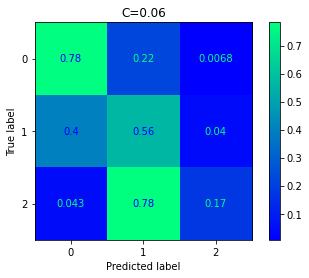

              precision    recall  f1-score   support

           0       0.51      0.56      0.54       126
           1       0.57      0.17      0.27        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.16402198312562888

SVM - Linear, Train Accuracy = 0.6348709929632526, C=0.26285714285714284
Test Accuracy = 0.609375


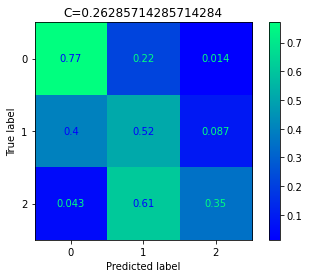

              precision    recall  f1-score   support

           0       0.52      0.52      0.52       126
           1       0.55      0.35      0.43        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6356528537920251, C=0.4657142857142857
Test Accuracy = 0.603125


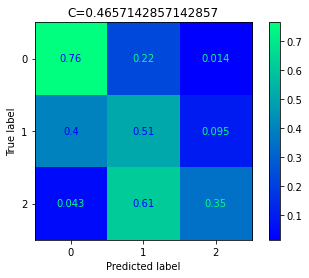

              precision    recall  f1-score   support

           0       0.51      0.51      0.51       126
           1       0.53      0.35      0.42        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.139252264107129

SVM - Linear, Train Accuracy = 0.6356528537920251, C=0.6685714285714286
Test Accuracy = 0.603125


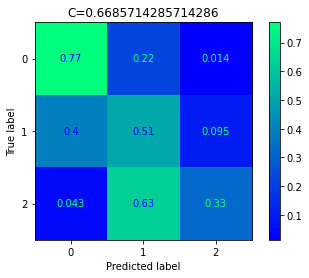

              precision    recall  f1-score   support

           0       0.51      0.51      0.51       126
           1       0.52      0.33      0.40        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.139252264107129

SVM - Linear, Train Accuracy = 0.6348709929632526, C=0.8714285714285714
Test Accuracy = 0.60625


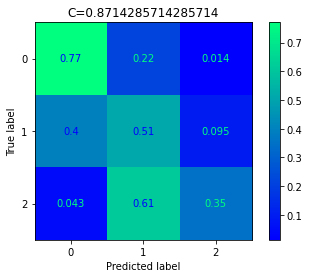

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.53      0.35      0.42        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14544469386175396

SVM - Linear, Train Accuracy = 0.6333072713057076, C=1.0742857142857143
Test Accuracy = 0.60625


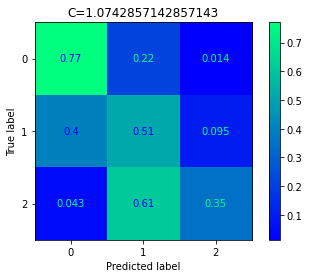

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.53      0.35      0.42        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14544469386175396

SVM - Linear, Train Accuracy = 0.6317435496481626, C=1.2771428571428571
Test Accuracy = 0.60625


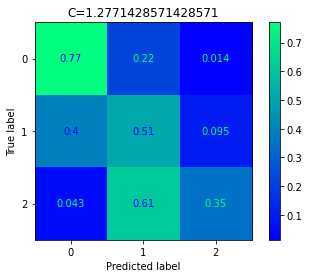

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.53      0.35      0.42        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14544469386175396

SVM - Linear, Train Accuracy = 0.63408913213448, C=1.48
Test Accuracy = 0.60625


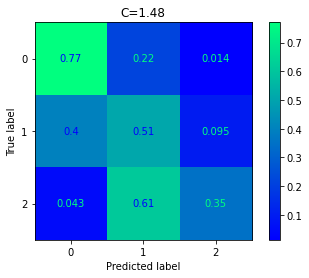

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.53      0.35      0.42        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14544469386175396

SVM - Linear, Train Accuracy = 0.63408913213448, C=1.6828571428571428
Test Accuracy = 0.603125


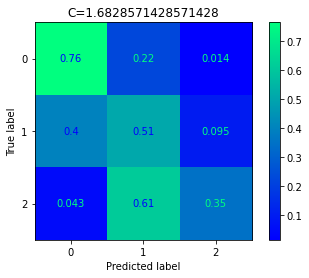

              precision    recall  f1-score   support

           0       0.51      0.51      0.51       126
           1       0.53      0.35      0.42        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.139252264107129

SVM - Linear, Train Accuracy = 0.63408913213448, C=1.8857142857142857
Test Accuracy = 0.603125


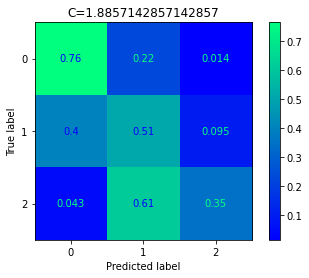

              precision    recall  f1-score   support

           0       0.51      0.51      0.51       126
           1       0.53      0.35      0.42        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.139252264107129

SVM - Linear, Train Accuracy = 0.6348709929632526, C=2.0885714285714285
Test Accuracy = 0.60625


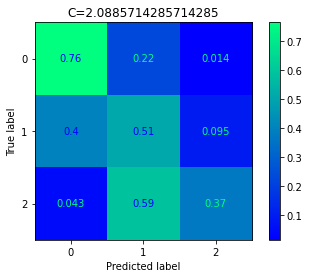

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14544469386175396

SVM - Linear, Train Accuracy = 0.6348709929632526, C=2.2914285714285714
Test Accuracy = 0.609375


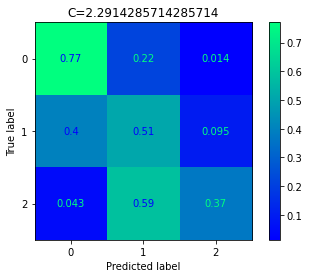

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6356528537920251, C=2.494285714285714
Test Accuracy = 0.609375


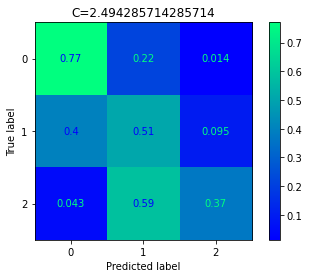

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6348709929632526, C=2.697142857142857
Test Accuracy = 0.609375


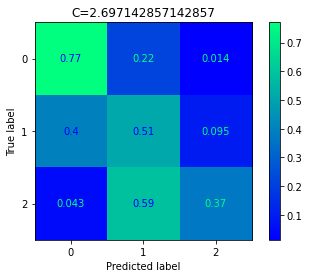

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6348709929632526, C=2.9
Test Accuracy = 0.60625


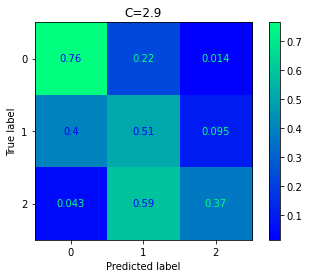

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14544469386175396

SVM - Linear, Train Accuracy = 0.6348709929632526, C=3.1028571428571428
Test Accuracy = 0.609375


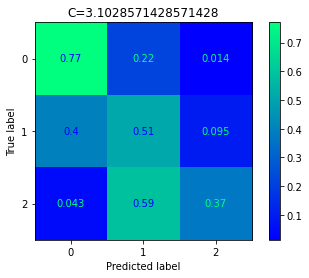

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6356528537920251, C=3.3057142857142856
Test Accuracy = 0.609375


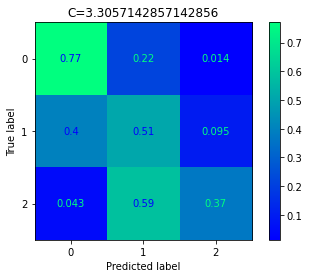

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6348709929632526, C=3.5085714285714285
Test Accuracy = 0.609375


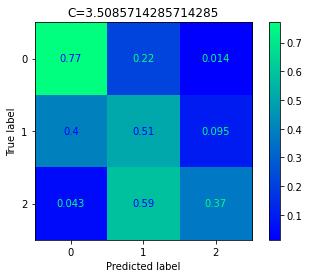

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6348709929632526, C=3.7114285714285713
Test Accuracy = 0.609375


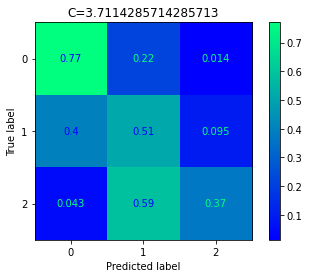

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6348709929632526, C=3.914285714285714
Test Accuracy = 0.609375


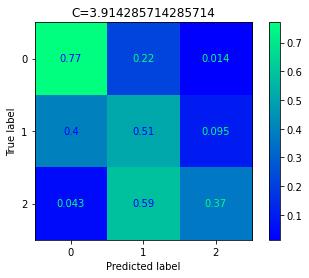

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6348709929632526, C=4.1171428571428565
Test Accuracy = 0.609375


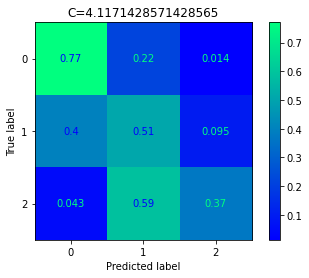

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6348709929632526, C=4.319999999999999
Test Accuracy = 0.609375


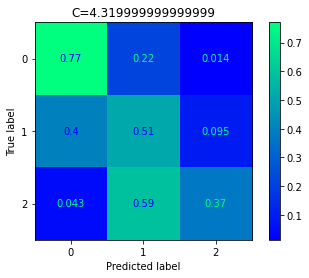

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6348709929632526, C=4.522857142857142
Test Accuracy = 0.609375


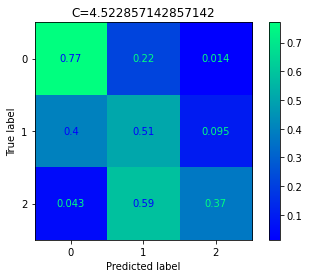

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6348709929632526, C=4.725714285714285
Test Accuracy = 0.60625


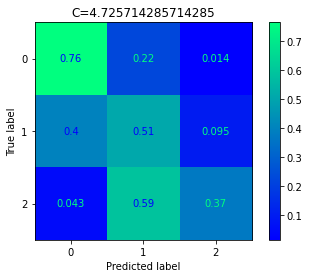

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14544469386175396

SVM - Linear, Train Accuracy = 0.6348709929632526, C=4.928571428571428
Test Accuracy = 0.609375


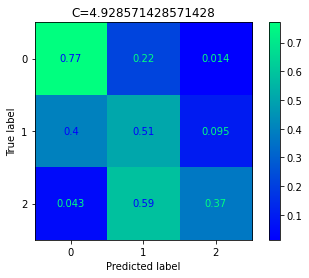

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6348709929632526, C=5.131428571428571
Test Accuracy = 0.609375


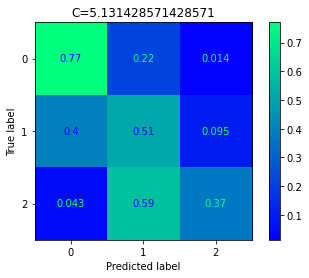

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6348709929632526, C=5.334285714285714
Test Accuracy = 0.609375


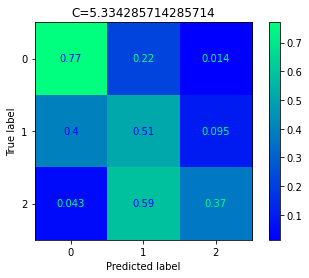

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6348709929632526, C=5.5371428571428565
Test Accuracy = 0.609375


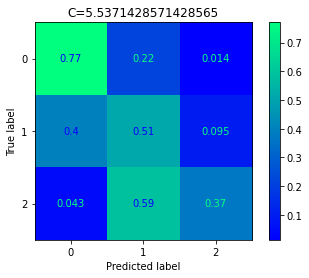

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6348709929632526, C=5.739999999999999
Test Accuracy = 0.609375


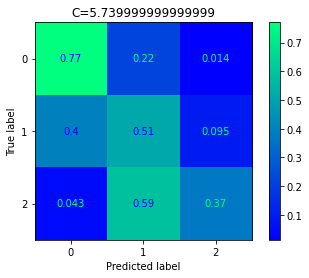

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6348709929632526, C=5.942857142857142
Test Accuracy = 0.609375


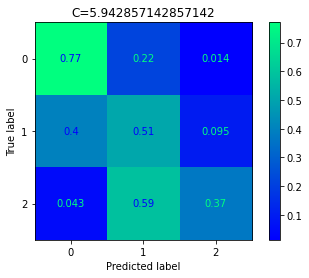

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6348709929632526, C=6.145714285714285
Test Accuracy = 0.609375


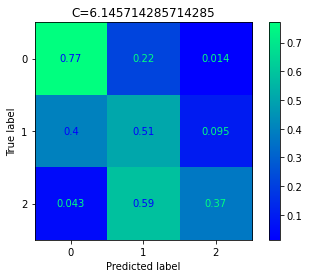

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6348709929632526, C=6.348571428571428
Test Accuracy = 0.609375


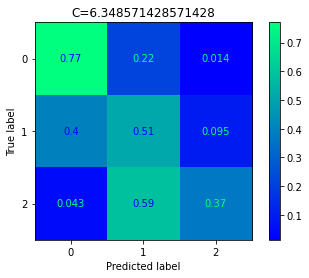

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6348709929632526, C=6.551428571428571
Test Accuracy = 0.609375


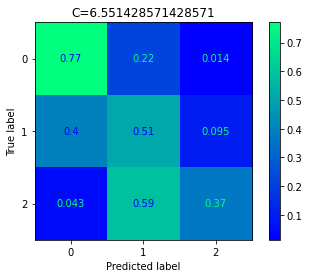

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6348709929632526, C=6.754285714285714
Test Accuracy = 0.60625


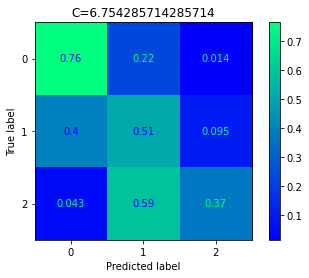

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14544469386175396

SVM - Linear, Train Accuracy = 0.6348709929632526, C=6.957142857142856
Test Accuracy = 0.609375


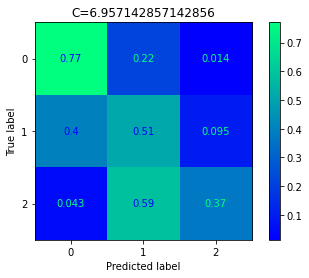

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6348709929632526, C=7.159999999999999
Test Accuracy = 0.609375


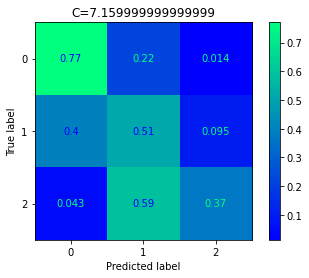

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6348709929632526, C=7.362857142857142
Test Accuracy = 0.609375


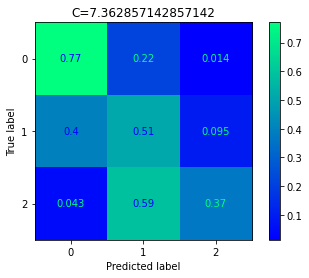

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6348709929632526, C=7.565714285714285
Test Accuracy = 0.609375


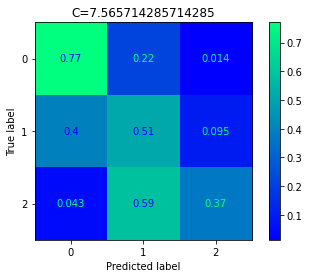

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6348709929632526, C=7.768571428571428
Test Accuracy = 0.609375


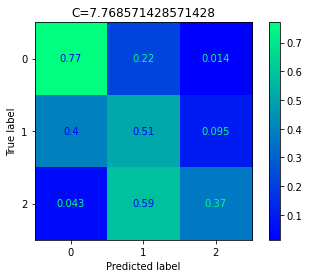

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6348709929632526, C=7.971428571428571
Test Accuracy = 0.609375


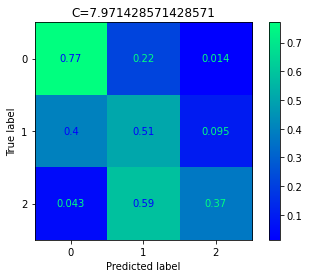

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6348709929632526, C=8.174285714285714
Test Accuracy = 0.609375


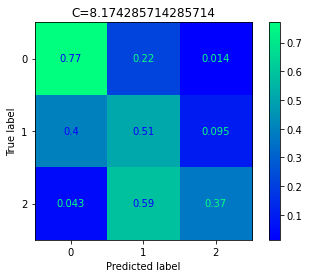

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6348709929632526, C=8.377142857142857
Test Accuracy = 0.609375


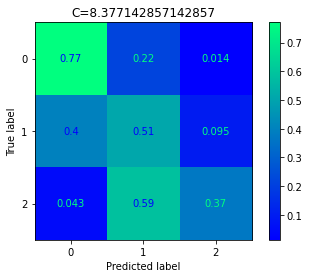

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6348709929632526, C=8.58
Test Accuracy = 0.609375


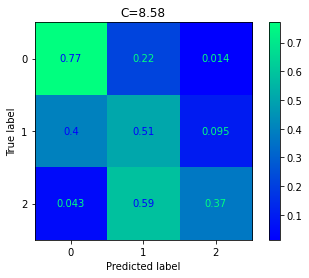

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6348709929632526, C=8.782857142857143
Test Accuracy = 0.60625


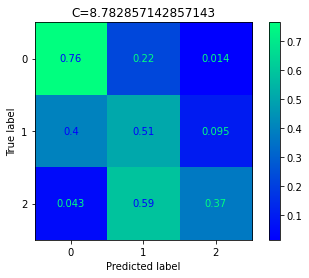

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14544469386175396

SVM - Linear, Train Accuracy = 0.6348709929632526, C=8.985714285714286
Test Accuracy = 0.609375


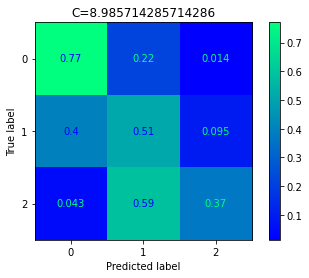

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6348709929632526, C=9.188571428571429
Test Accuracy = 0.609375


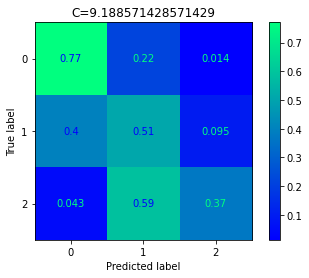

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6348709929632526, C=9.391428571428571
Test Accuracy = 0.609375


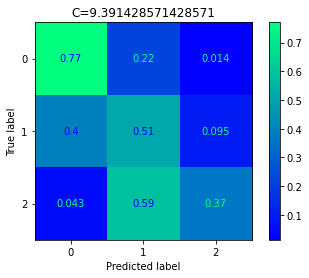

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6348709929632526, C=9.594285714285714
Test Accuracy = 0.609375


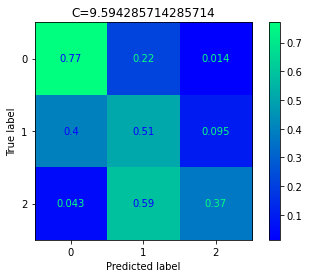

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6348709929632526, C=9.797142857142857
Test Accuracy = 0.609375


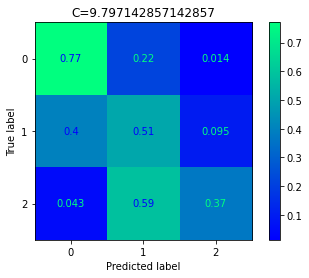

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - Linear, Train Accuracy = 0.6348709929632526, C=10.0
Test Accuracy = 0.609375


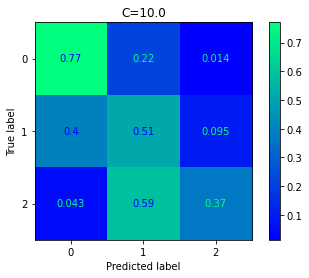

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       126
           1       0.55      0.37      0.44        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893



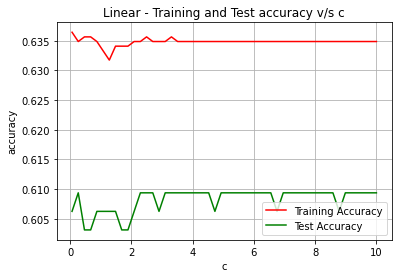

SVM - RBF, Train Accuracy = 0.706020328381548, C=1.0
Test Accuracy = 0.640625


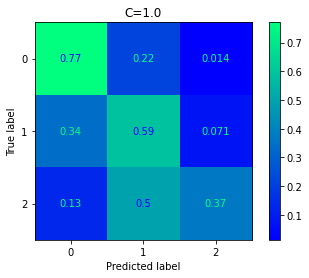

              precision    recall  f1-score   support

           0       0.57      0.59      0.58       126
           1       0.61      0.37      0.46        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.139252264107129

SVM - RBF, Train Accuracy = 0.7881157154026583, C=7.1020408163265305
Test Accuracy = 0.678125


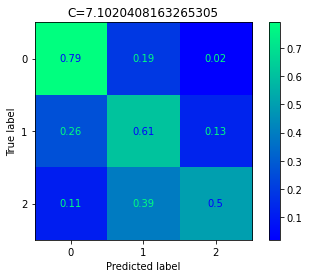

              precision    recall  f1-score   support

           0       0.63      0.61      0.62       126
           1       0.55      0.50      0.52        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.21356142116262855

SVM - RBF, Train Accuracy = 0.8170445660672401, C=13.204081632653061
Test Accuracy = 0.675


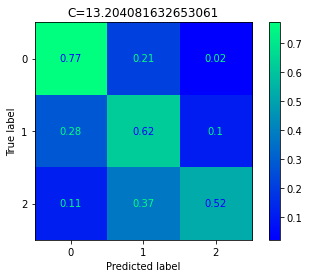

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       126
           1       0.60      0.52      0.56        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.20736899140800358

SVM - RBF, Train Accuracy = 0.8342455043002346, C=19.306122448979593
Test Accuracy = 0.665625


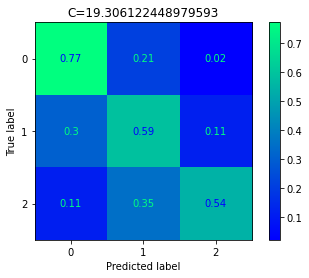

              precision    recall  f1-score   support

           0       0.61      0.59      0.60       126
           1       0.60      0.54      0.57        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18879170214412877

SVM - RBF, Train Accuracy = 0.8498827208756842, C=25.408163265306122
Test Accuracy = 0.66875


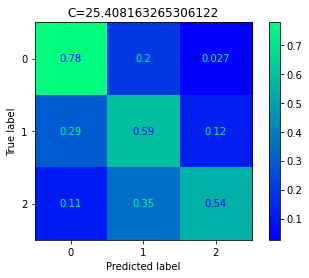

              precision    recall  f1-score   support

           0       0.62      0.59      0.60       126
           1       0.57      0.54      0.56        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.17640684263487882

SVM - RBF, Train Accuracy = 0.8608287724784989, C=31.51020408163265
Test Accuracy = 0.6625


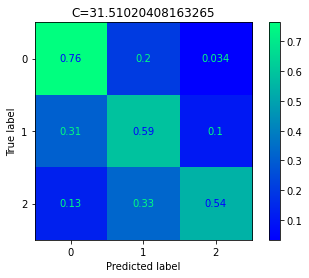

              precision    recall  f1-score   support

           0       0.62      0.59      0.60       126
           1       0.58      0.54      0.56        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12686740459787904

SVM - RBF, Train Accuracy = 0.8694292415949961, C=37.61224489795919
Test Accuracy = 0.646875


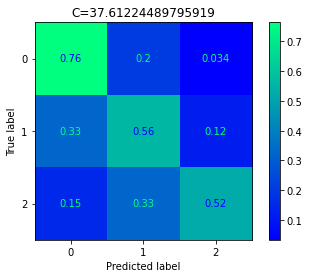

              precision    recall  f1-score   support

           0       0.61      0.56      0.58       126
           1       0.55      0.52      0.53        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07732796656087926

SVM - RBF, Train Accuracy = 0.8788115715402658, C=43.714285714285715
Test Accuracy = 0.65625


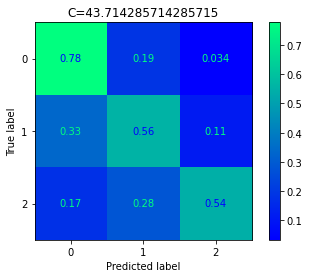

              precision    recall  f1-score   support

           0       0.63      0.56      0.59       126
           1       0.57      0.54      0.56        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07732796656087926

SVM - RBF, Train Accuracy = 0.8842845973416732, C=49.816326530612244
Test Accuracy = 0.6625


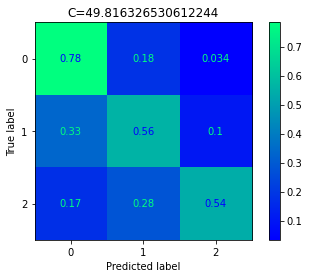

              precision    recall  f1-score   support

           0       0.64      0.56      0.60       126
           1       0.58      0.54      0.56        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0897128260701292

SVM - RBF, Train Accuracy = 0.887412040656763, C=55.91836734693877
Test Accuracy = 0.6625


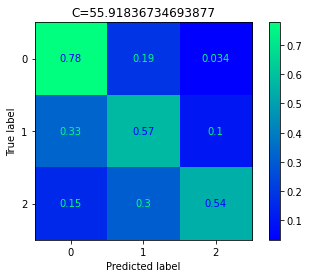

              precision    recall  f1-score   support

           0       0.63      0.57      0.60       126
           1       0.58      0.54      0.56        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.10829011533400412

SVM - RBF, Train Accuracy = 0.893666927286943, C=62.0204081632653
Test Accuracy = 0.68125


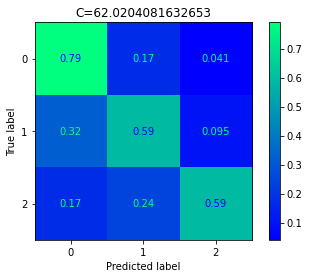

              precision    recall  f1-score   support

           0       0.67      0.59      0.63       126
           1       0.60      0.59      0.59        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.10829011533400412

SVM - RBF, Train Accuracy = 0.893666927286943, C=68.12244897959184
Test Accuracy = 0.678125


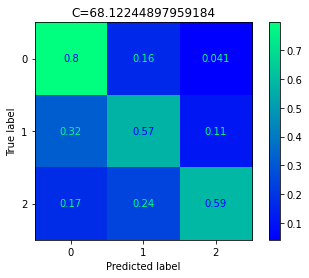

              precision    recall  f1-score   support

           0       0.67      0.57      0.62       126
           1       0.57      0.59      0.58        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.10209768557937915

SVM - RBF, Train Accuracy = 0.9007036747458952, C=74.22448979591837
Test Accuracy = 0.684375


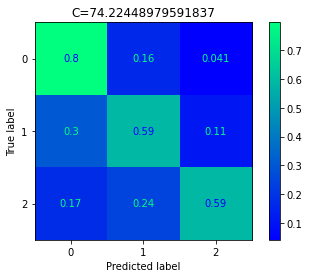

              precision    recall  f1-score   support

           0       0.68      0.59      0.63       126
           1       0.57      0.59      0.58        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1144825450886291

SVM - RBF, Train Accuracy = 0.9030492572322126, C=80.3265306122449
Test Accuracy = 0.684375


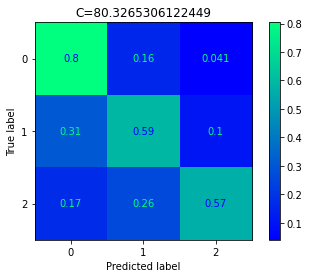

              precision    recall  f1-score   support

           0       0.68      0.59      0.63       126
           1       0.58      0.57      0.57        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1144825450886291

SVM - RBF, Train Accuracy = 0.9038311180609852, C=86.42857142857143
Test Accuracy = 0.678125


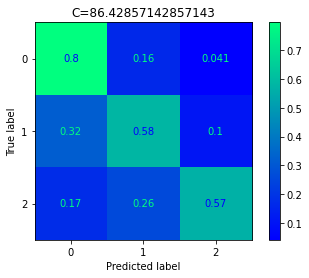

              precision    recall  f1-score   support

           0       0.67      0.58      0.62       126
           1       0.58      0.57      0.57        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.10209768557937915

SVM - RBF, Train Accuracy = 0.9069585613760751, C=92.53061224489795
Test Accuracy = 0.68125


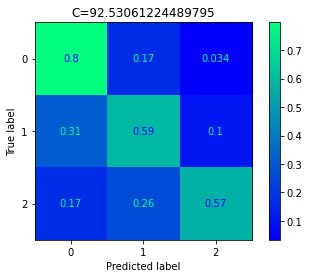

              precision    recall  f1-score   support

           0       0.67      0.59      0.62       126
           1       0.59      0.57      0.58        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12686740459787904

SVM - RBF, Train Accuracy = 0.90852228303362, C=98.63265306122449
Test Accuracy = 0.68125


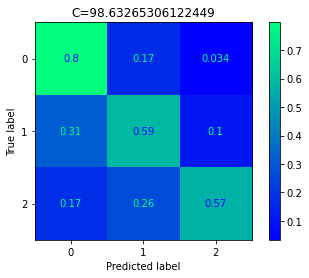

              precision    recall  f1-score   support

           0       0.67      0.59      0.62       126
           1       0.59      0.57      0.58        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12686740459787904

SVM - RBF, Train Accuracy = 0.90852228303362, C=104.73469387755102
Test Accuracy = 0.678125


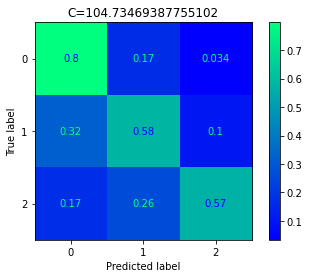

              precision    recall  f1-score   support

           0       0.66      0.58      0.62       126
           1       0.59      0.57      0.58        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12067497484325407

SVM - RBF, Train Accuracy = 0.9132134480062549, C=110.83673469387755
Test Accuracy = 0.68125


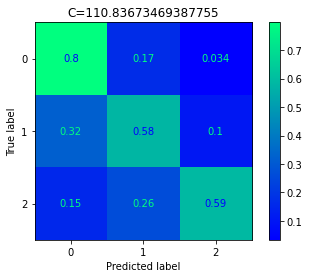

              precision    recall  f1-score   support

           0       0.66      0.58      0.62       126
           1       0.60      0.59      0.59        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14544469386175396

SVM - RBF, Train Accuracy = 0.9147771696637998, C=116.93877551020408
Test Accuracy = 0.684375


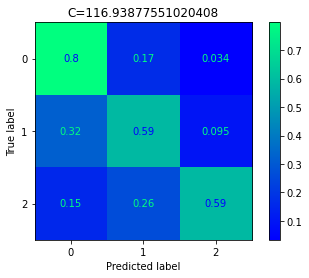

              precision    recall  f1-score   support

           0       0.67      0.59      0.62       126
           1       0.61      0.59      0.60        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - RBF, Train Accuracy = 0.9155590304925724, C=123.0408163265306
Test Accuracy = 0.68125


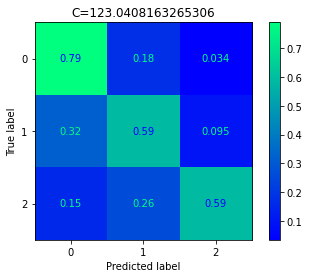

              precision    recall  f1-score   support

           0       0.66      0.59      0.62       126
           1       0.61      0.59      0.60        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14544469386175396

SVM - RBF, Train Accuracy = 0.9202501954652071, C=129.14285714285714
Test Accuracy = 0.671875


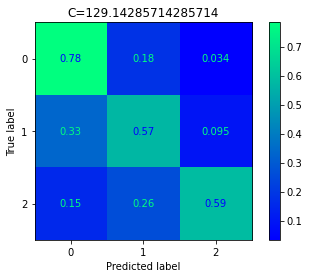

              precision    recall  f1-score   support

           0       0.65      0.57      0.61       126
           1       0.61      0.59      0.60        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12686740459787904

SVM - RBF, Train Accuracy = 0.9225957779515246, C=135.24489795918367
Test Accuracy = 0.671875


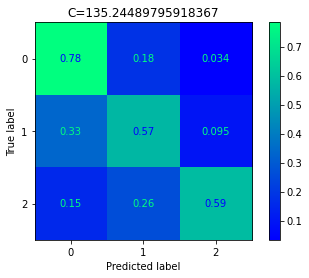

              precision    recall  f1-score   support

           0       0.65      0.57      0.61       126
           1       0.61      0.59      0.60        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12686740459787904

SVM - RBF, Train Accuracy = 0.924941360437842, C=141.3469387755102
Test Accuracy = 0.671875


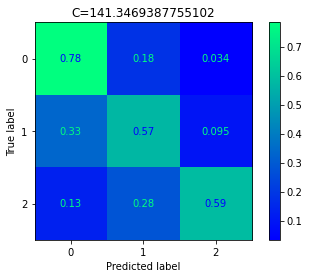

              precision    recall  f1-score   support

           0       0.64      0.57      0.61       126
           1       0.61      0.59      0.60        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14544469386175396

SVM - RBF, Train Accuracy = 0.9241594996090696, C=147.44897959183675
Test Accuracy = 0.665625


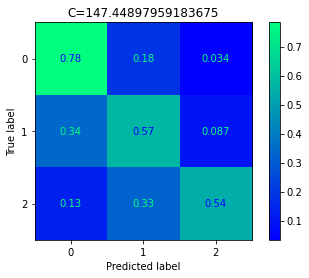

              precision    recall  f1-score   support

           0       0.63      0.57      0.60       126
           1       0.61      0.54      0.57        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13305983435250401

SVM - RBF, Train Accuracy = 0.9257232212666145, C=153.55102040816325
Test Accuracy = 0.665625


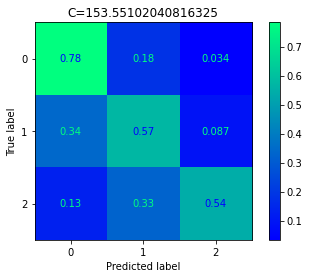

              precision    recall  f1-score   support

           0       0.63      0.57      0.60       126
           1       0.61      0.54      0.57        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13305983435250401

SVM - RBF, Train Accuracy = 0.9272869429241595, C=159.6530612244898
Test Accuracy = 0.66875


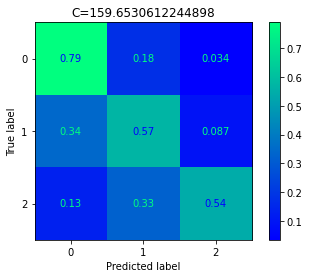

              precision    recall  f1-score   support

           0       0.64      0.57      0.60       126
           1       0.61      0.54      0.57        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.139252264107129

SVM - RBF, Train Accuracy = 0.9272869429241595, C=165.75510204081633
Test Accuracy = 0.671875


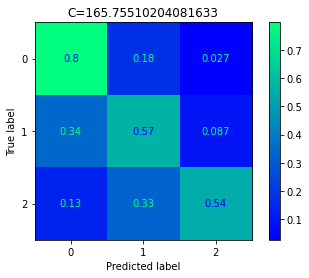

              precision    recall  f1-score   support

           0       0.64      0.57      0.60       126
           1       0.62      0.54      0.58        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.16402198312562888

SVM - RBF, Train Accuracy = 0.9288506645817045, C=171.85714285714286
Test Accuracy = 0.671875


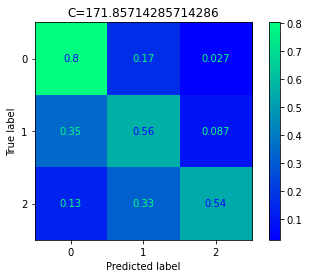

              precision    recall  f1-score   support

           0       0.64      0.56      0.60       126
           1       0.62      0.54      0.58        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.16402198312562888

SVM - RBF, Train Accuracy = 0.9304143862392494, C=177.9591836734694
Test Accuracy = 0.66875


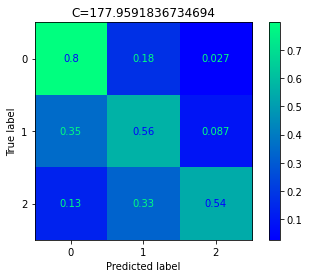

              precision    recall  f1-score   support

           0       0.63      0.56      0.60       126
           1       0.62      0.54      0.58        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1578295533710039

SVM - RBF, Train Accuracy = 0.9311962470680218, C=184.0612244897959
Test Accuracy = 0.671875


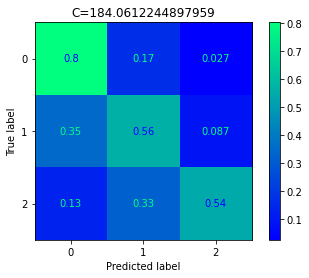

              precision    recall  f1-score   support

           0       0.64      0.56      0.60       126
           1       0.62      0.54      0.58        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.16402198312562888

SVM - RBF, Train Accuracy = 0.9327599687255669, C=190.16326530612244
Test Accuracy = 0.671875


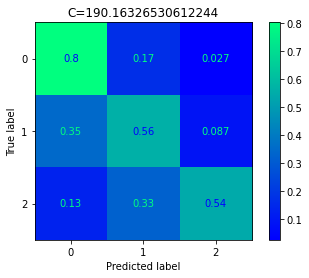

              precision    recall  f1-score   support

           0       0.64      0.56      0.60       126
           1       0.62      0.54      0.58        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.16402198312562888

SVM - RBF, Train Accuracy = 0.9366692728694292, C=196.26530612244898
Test Accuracy = 0.675


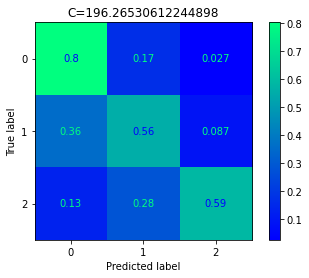

              precision    recall  f1-score   support

           0       0.65      0.56      0.60       126
           1       0.64      0.59      0.61        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.17021441288025385

SVM - RBF, Train Accuracy = 0.9366692728694292, C=202.3673469387755
Test Accuracy = 0.665625


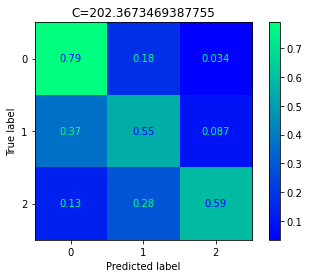

              precision    recall  f1-score   support

           0       0.64      0.55      0.59       126
           1       0.63      0.59      0.61        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13305983435250401

SVM - RBF, Train Accuracy = 0.9397967161845192, C=208.46938775510205
Test Accuracy = 0.66875


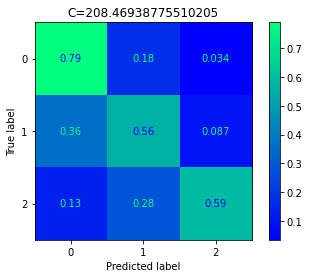

              precision    recall  f1-score   support

           0       0.64      0.56      0.60       126
           1       0.63      0.59      0.61        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.139252264107129

SVM - RBF, Train Accuracy = 0.9413604378420641, C=214.57142857142856
Test Accuracy = 0.671875


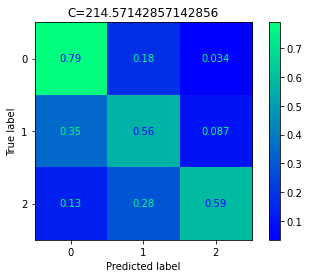

              precision    recall  f1-score   support

           0       0.65      0.56      0.60       126
           1       0.63      0.59      0.61        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14544469386175396

SVM - RBF, Train Accuracy = 0.9437060203283816, C=220.6734693877551
Test Accuracy = 0.675


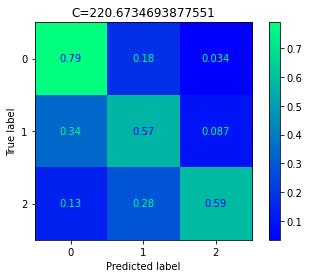

              precision    recall  f1-score   support

           0       0.65      0.57      0.61       126
           1       0.63      0.59      0.61        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - RBF, Train Accuracy = 0.9452697419859265, C=226.77551020408163
Test Accuracy = 0.675


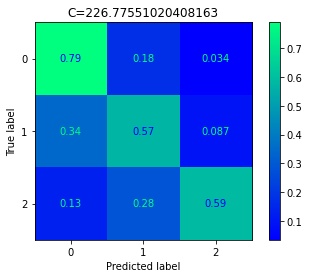

              precision    recall  f1-score   support

           0       0.65      0.57      0.61       126
           1       0.63      0.59      0.61        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15163712361637893

SVM - RBF, Train Accuracy = 0.946051602814699, C=232.87755102040816
Test Accuracy = 0.678125


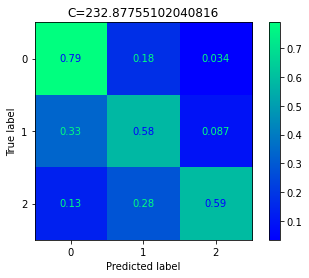

              precision    recall  f1-score   support

           0       0.65      0.58      0.61       126
           1       0.63      0.59      0.61        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1578295533710039

SVM - RBF, Train Accuracy = 0.9491790461297889, C=238.9795918367347
Test Accuracy = 0.68125


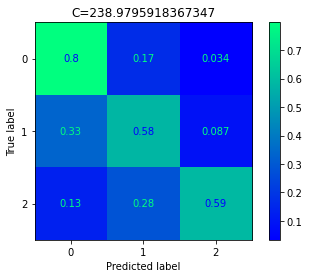

              precision    recall  f1-score   support

           0       0.66      0.58      0.62       126
           1       0.63      0.59      0.61        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.16402198312562888

SVM - RBF, Train Accuracy = 0.9515246286161063, C=245.0816326530612
Test Accuracy = 0.678125


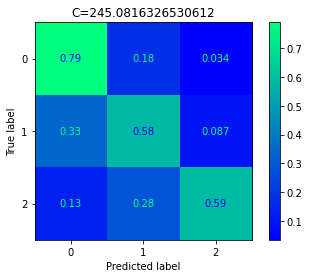

              precision    recall  f1-score   support

           0       0.65      0.58      0.61       126
           1       0.63      0.59      0.61        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1578295533710039

SVM - RBF, Train Accuracy = 0.9515246286161063, C=251.18367346938774
Test Accuracy = 0.678125


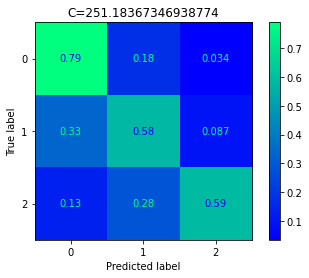

              precision    recall  f1-score   support

           0       0.65      0.58      0.61       126
           1       0.63      0.59      0.61        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1578295533710039

SVM - RBF, Train Accuracy = 0.9546520719311963, C=257.2857142857143
Test Accuracy = 0.68125


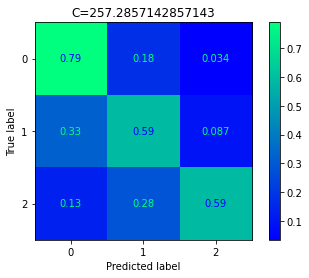

              precision    recall  f1-score   support

           0       0.65      0.59      0.62       126
           1       0.63      0.59      0.61        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.16402198312562888

SVM - RBF, Train Accuracy = 0.9554339327599687, C=263.3877551020408
Test Accuracy = 0.68125


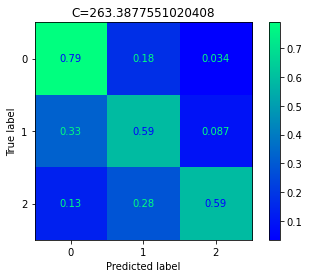

              precision    recall  f1-score   support

           0       0.65      0.59      0.62       126
           1       0.63      0.59      0.61        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.16402198312562888

SVM - RBF, Train Accuracy = 0.9569976544175137, C=269.48979591836735
Test Accuracy = 0.68125


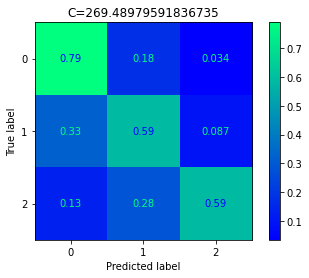

              precision    recall  f1-score   support

           0       0.65      0.59      0.62       126
           1       0.63      0.59      0.61        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.16402198312562888

SVM - RBF, Train Accuracy = 0.9569976544175137, C=275.59183673469386
Test Accuracy = 0.68125


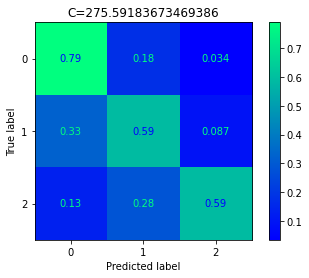

              precision    recall  f1-score   support

           0       0.65      0.59      0.62       126
           1       0.63      0.59      0.61        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.16402198312562888

SVM - RBF, Train Accuracy = 0.9585613760750586, C=281.6938775510204
Test Accuracy = 0.68125


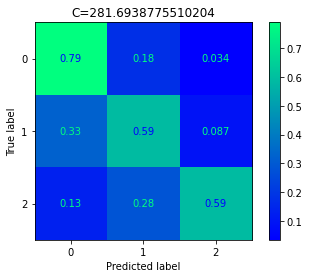

              precision    recall  f1-score   support

           0       0.65      0.59      0.62       126
           1       0.63      0.59      0.61        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.16402198312562888

SVM - RBF, Train Accuracy = 0.9601250977326036, C=287.7959183673469
Test Accuracy = 0.68125


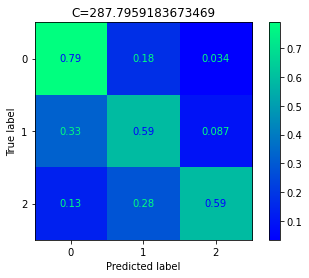

              precision    recall  f1-score   support

           0       0.65      0.59      0.62       126
           1       0.63      0.59      0.61        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.16402198312562888

SVM - RBF, Train Accuracy = 0.9601250977326036, C=293.8979591836735
Test Accuracy = 0.68125


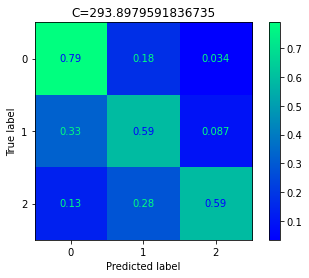

              precision    recall  f1-score   support

           0       0.65      0.59      0.62       126
           1       0.63      0.59      0.61        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.16402198312562888

SVM - RBF, Train Accuracy = 0.9616888193901486, C=300.0
Test Accuracy = 0.68125


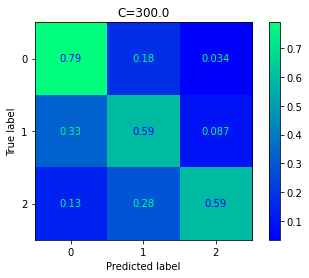

              precision    recall  f1-score   support

           0       0.65      0.59      0.62       126
           1       0.63      0.59      0.61        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.16402198312562888



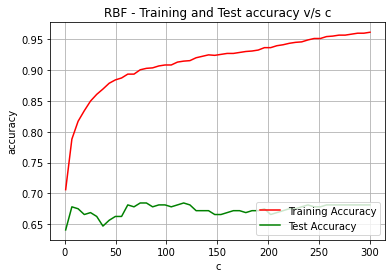

SVM - Poly, Train Accuracy = 0.5942142298670836, C=0.1
Test Accuracy = 0.578125


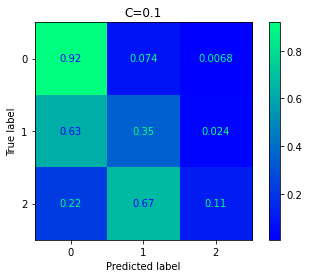

              precision    recall  f1-score   support

           0       0.51      0.35      0.42       126
           1       0.56      0.11      0.18        46
           2       0.00      0.00      0.00         0
		 R2 Score: -0.04032819877699523

SVM - Poly, Train Accuracy = 0.7568412822517592, C=6.220408163265305
Test Accuracy = 0.646875


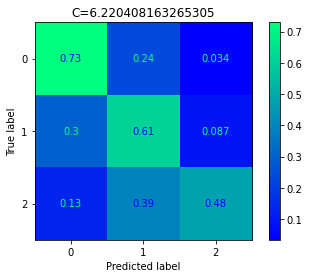

              precision    recall  f1-score   support

           0       0.59      0.61      0.60       126
           1       0.58      0.48      0.52        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09590525582475418

SVM - Poly, Train Accuracy = 0.7677873338545739, C=12.34081632653061
Test Accuracy = 0.628125


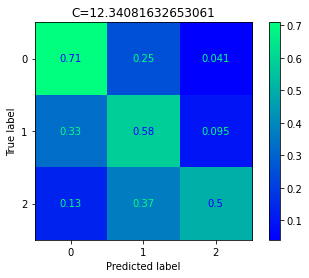

              precision    recall  f1-score   support

           0       0.57      0.58      0.58       126
           1       0.56      0.50      0.53        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.04017338803312942

SVM - Poly, Train Accuracy = 0.777951524628616, C=18.461224489795917
Test Accuracy = 0.64375


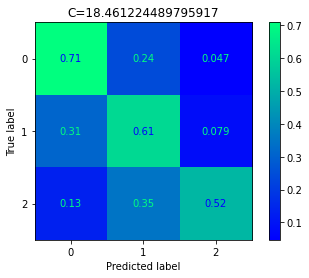

              precision    recall  f1-score   support

           0       0.60      0.61      0.60       126
           1       0.59      0.52      0.55        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.052558247542379366

SVM - Poly, Train Accuracy = 0.7818608287724785, C=24.581632653061224
Test Accuracy = 0.64375


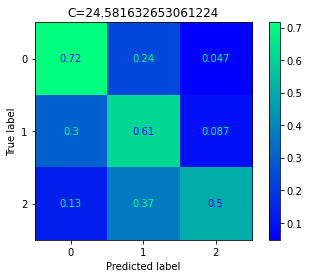

              precision    recall  f1-score   support

           0       0.60      0.61      0.60       126
           1       0.56      0.50      0.53        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.052558247542379366

SVM - Poly, Train Accuracy = 0.7849882720875684, C=30.70204081632653
Test Accuracy = 0.646875


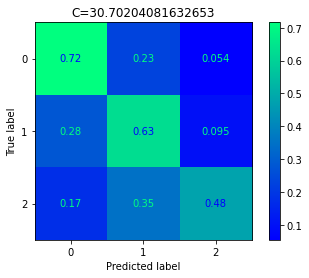

              precision    recall  f1-score   support

           0       0.61      0.63      0.62       126
           1       0.52      0.48      0.50        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0030188095053795827

SVM - Poly, Train Accuracy = 0.7920250195465207, C=36.82244897959183
Test Accuracy = 0.6625


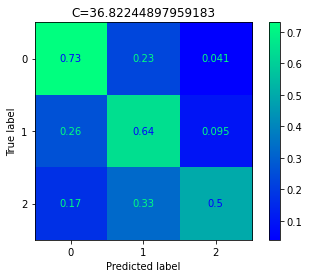

              precision    recall  f1-score   support

           0       0.62      0.64      0.63       126
           1       0.56      0.50      0.53        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07113553680625428

SVM - Poly, Train Accuracy = 0.7912431587177482, C=42.94285714285714
Test Accuracy = 0.659375


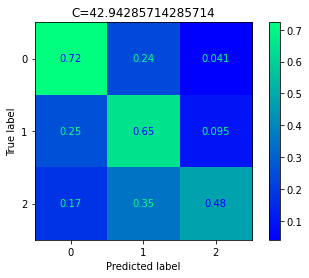

              precision    recall  f1-score   support

           0       0.62      0.65      0.63       126
           1       0.55      0.48      0.51        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06494310705162931

SVM - Poly, Train Accuracy = 0.7951524628616107, C=49.063265306122446
Test Accuracy = 0.65625


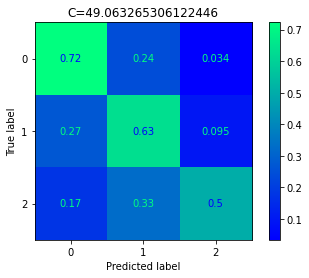

              precision    recall  f1-score   support

           0       0.61      0.63      0.62       126
           1       0.57      0.50      0.53        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07732796656087926

SVM - Poly, Train Accuracy = 0.8014073494917905, C=55.18367346938775
Test Accuracy = 0.65625


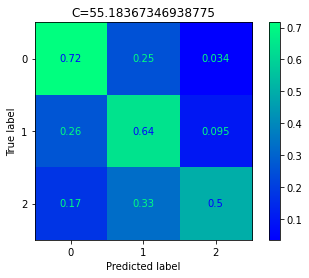

              precision    recall  f1-score   support

           0       0.61      0.64      0.63       126
           1       0.57      0.50      0.53        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07732796656087926

SVM - Poly, Train Accuracy = 0.800625488663018, C=61.30408163265306
Test Accuracy = 0.65


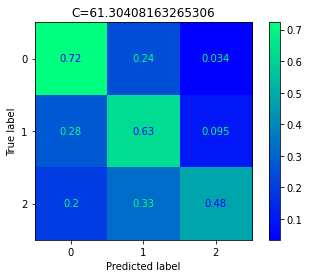

              precision    recall  f1-score   support

           0       0.61      0.63      0.62       126
           1       0.56      0.48      0.52        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.04636581778775439

SVM - Poly, Train Accuracy = 0.8021892103205629, C=67.42448979591836
Test Accuracy = 0.65


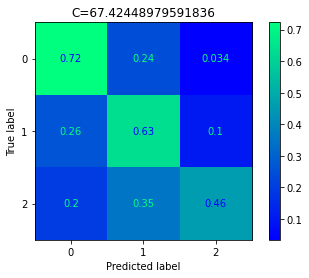

              precision    recall  f1-score   support

           0       0.61      0.63      0.62       126
           1       0.54      0.46      0.49        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.04636581778775439

SVM - Poly, Train Accuracy = 0.8014073494917905, C=73.54489795918366
Test Accuracy = 0.646875


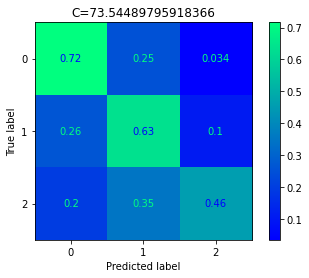

              precision    recall  f1-score   support

           0       0.60      0.63      0.62       126
           1       0.54      0.46      0.49        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.04017338803312942

SVM - Poly, Train Accuracy = 0.8092259577795152, C=79.66530612244897
Test Accuracy = 0.64375


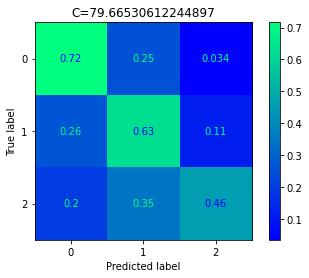

              precision    recall  f1-score   support

           0       0.60      0.63      0.61       126
           1       0.53      0.46      0.49        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.03398095827850445

SVM - Poly, Train Accuracy = 0.8123534010946052, C=85.78571428571428
Test Accuracy = 0.64375


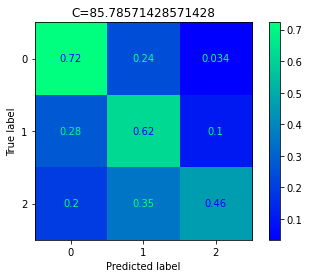

              precision    recall  f1-score   support

           0       0.60      0.62      0.61       126
           1       0.54      0.46      0.49        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.03398095827850445

SVM - Poly, Train Accuracy = 0.8131352619233776, C=91.90612244897957
Test Accuracy = 0.64375


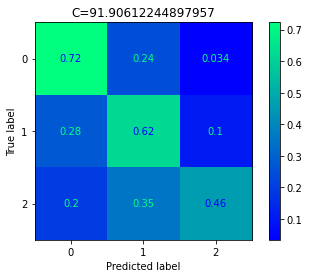

              precision    recall  f1-score   support

           0       0.60      0.62      0.61       126
           1       0.54      0.46      0.49        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.03398095827850445

SVM - Poly, Train Accuracy = 0.8131352619233776, C=98.02653061224488
Test Accuracy = 0.64375


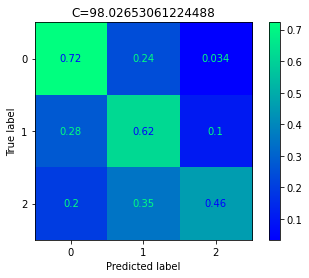

              precision    recall  f1-score   support

           0       0.60      0.62      0.61       126
           1       0.54      0.46      0.49        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.03398095827850445

SVM - Poly, Train Accuracy = 0.8139171227521501, C=104.1469387755102
Test Accuracy = 0.640625


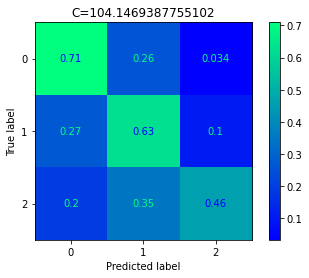

              precision    recall  f1-score   support

           0       0.59      0.63      0.61       126
           1       0.54      0.46      0.49        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.027788528523879474

SVM - Poly, Train Accuracy = 0.8146989835809226, C=110.26734693877549
Test Accuracy = 0.640625


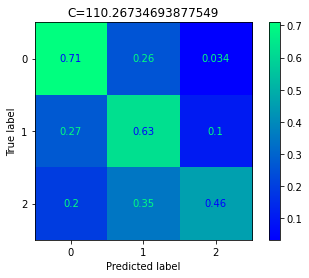

              precision    recall  f1-score   support

           0       0.59      0.63      0.61       126
           1       0.54      0.46      0.49        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.027788528523879474

SVM - Poly, Train Accuracy = 0.818608287724785, C=116.3877551020408
Test Accuracy = 0.64375


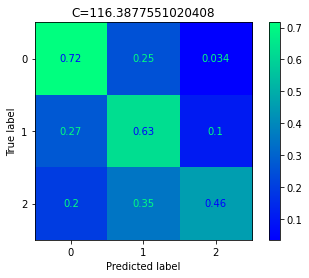

              precision    recall  f1-score   support

           0       0.60      0.63      0.61       126
           1       0.54      0.46      0.49        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.03398095827850445

SVM - Poly, Train Accuracy = 0.8193901485535575, C=122.50816326530611
Test Accuracy = 0.64375


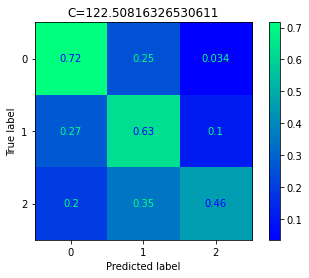

              precision    recall  f1-score   support

           0       0.60      0.63      0.61       126
           1       0.54      0.46      0.49        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.03398095827850445

SVM - Poly, Train Accuracy = 0.8217357310398749, C=128.6285714285714
Test Accuracy = 0.653125


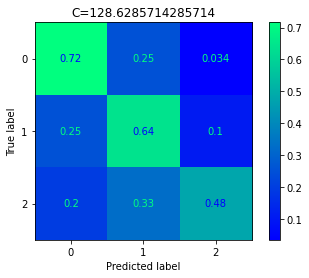

              precision    recall  f1-score   support

           0       0.61      0.64      0.63       126
           1       0.55      0.48      0.51        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.052558247542379366

SVM - Poly, Train Accuracy = 0.8240813135261923, C=134.74897959183673
Test Accuracy = 0.65625


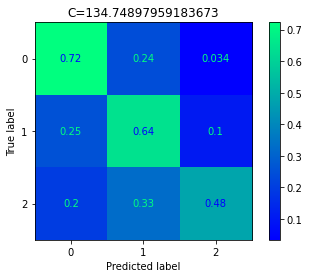

              precision    recall  f1-score   support

           0       0.61      0.64      0.63       126
           1       0.55      0.48      0.51        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05875067729700434

SVM - Poly, Train Accuracy = 0.8232994526974199, C=140.86938775510203
Test Accuracy = 0.65625


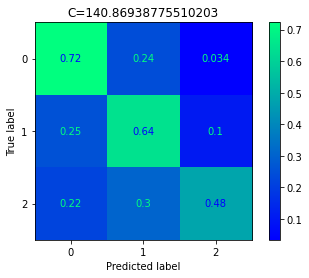

              precision    recall  f1-score   support

           0       0.62      0.64      0.63       126
           1       0.55      0.48      0.51        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.04017338803312942

SVM - Poly, Train Accuracy = 0.8248631743549648, C=146.98979591836732
Test Accuracy = 0.65625


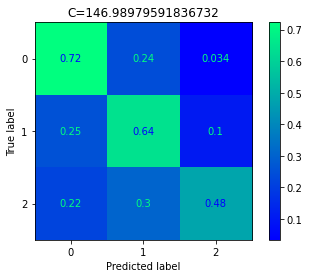

              precision    recall  f1-score   support

           0       0.62      0.64      0.63       126
           1       0.55      0.48      0.51        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.04017338803312942

SVM - Poly, Train Accuracy = 0.8279906176700548, C=153.11020408163265
Test Accuracy = 0.65625


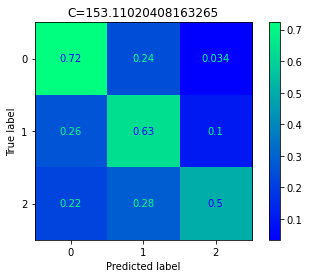

              precision    recall  f1-score   support

           0       0.62      0.63      0.63       126
           1       0.56      0.50      0.53        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.04017338803312942

SVM - Poly, Train Accuracy = 0.8295543393275997, C=159.23061224489794
Test Accuracy = 0.65625


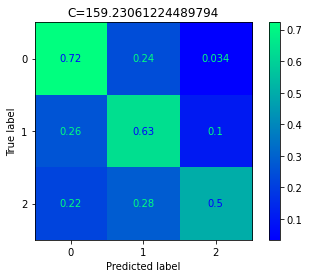

              precision    recall  f1-score   support

           0       0.62      0.63      0.63       126
           1       0.56      0.50      0.53        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.04017338803312942

SVM - Poly, Train Accuracy = 0.8272087568412823, C=165.35102040816324
Test Accuracy = 0.653125


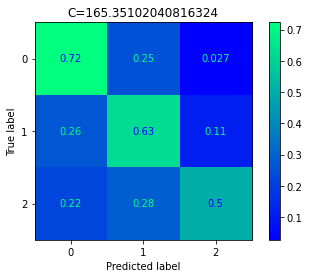

              precision    recall  f1-score   support

           0       0.61      0.63      0.62       126
           1       0.56      0.50      0.53        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.052558247542379366

SVM - Poly, Train Accuracy = 0.8272087568412823, C=171.47142857142856
Test Accuracy = 0.653125


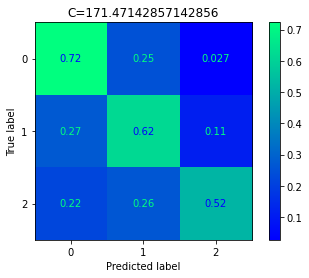

              precision    recall  f1-score   support

           0       0.61      0.62      0.62       126
           1       0.57      0.52      0.55        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.052558247542379366

SVM - Poly, Train Accuracy = 0.8248631743549648, C=177.59183673469386
Test Accuracy = 0.653125


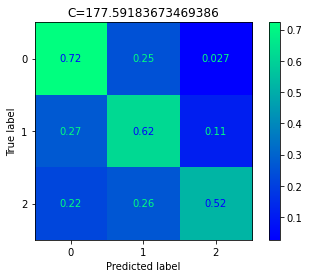

              precision    recall  f1-score   support

           0       0.61      0.62      0.62       126
           1       0.57      0.52      0.55        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.052558247542379366

SVM - Poly, Train Accuracy = 0.8256450351837373, C=183.71224489795915
Test Accuracy = 0.659375


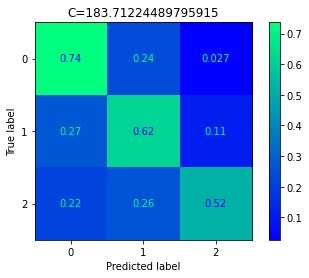

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       126
           1       0.57      0.52      0.55        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06494310705162931

SVM - Poly, Train Accuracy = 0.8303362001563722, C=189.83265306122448
Test Accuracy = 0.659375


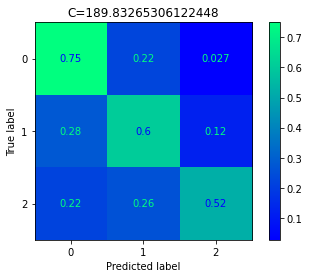

              precision    recall  f1-score   support

           0       0.63      0.60      0.62       126
           1       0.56      0.52      0.54        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06494310705162931

SVM - Poly, Train Accuracy = 0.8311180609851446, C=195.95306122448977
Test Accuracy = 0.65625


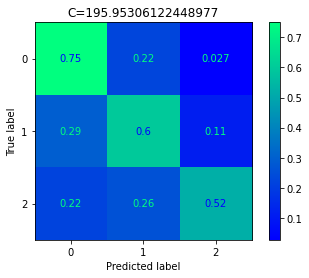

              precision    recall  f1-score   support

           0       0.62      0.60      0.61       126
           1       0.57      0.52      0.55        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05875067729700434

SVM - Poly, Train Accuracy = 0.8334636434714621, C=202.07346938775507
Test Accuracy = 0.653125


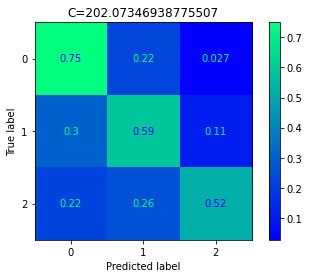

              precision    recall  f1-score   support

           0       0.62      0.59      0.60       126
           1       0.57      0.52      0.55        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.052558247542379366

SVM - Poly, Train Accuracy = 0.8342455043002346, C=208.1938775510204
Test Accuracy = 0.65625


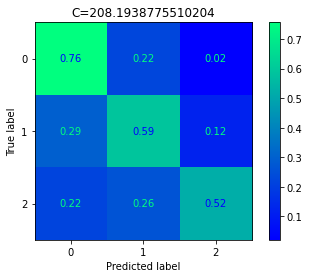

              precision    recall  f1-score   support

           0       0.62      0.59      0.60       126
           1       0.57      0.52      0.55        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07732796656087926

SVM - Poly, Train Accuracy = 0.8358092259577795, C=214.3142857142857
Test Accuracy = 0.65625


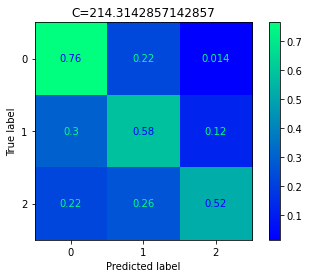

              precision    recall  f1-score   support

           0       0.62      0.58      0.60       126
           1       0.59      0.52      0.55        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09590525582475418

SVM - Poly, Train Accuracy = 0.836591086786552, C=220.43469387755098
Test Accuracy = 0.65625


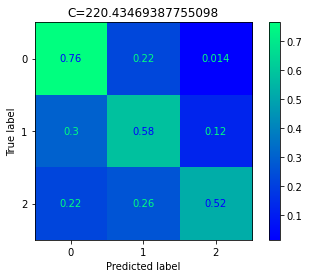

              precision    recall  f1-score   support

           0       0.62      0.58      0.60       126
           1       0.59      0.52      0.55        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09590525582475418

SVM - Poly, Train Accuracy = 0.8373729476153244, C=226.5551020408163
Test Accuracy = 0.6625


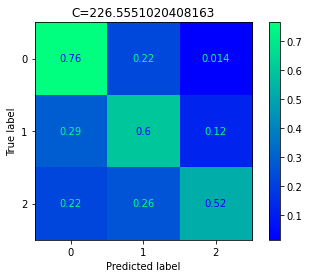

              precision    recall  f1-score   support

           0       0.62      0.60      0.61       126
           1       0.59      0.52      0.55        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.10829011533400412

SVM - Poly, Train Accuracy = 0.8389366692728695, C=232.6755102040816
Test Accuracy = 0.6625


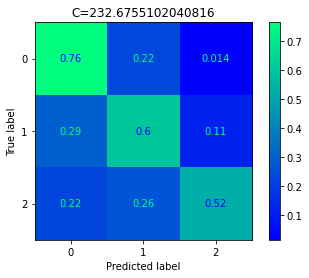

              precision    recall  f1-score   support

           0       0.62      0.60      0.61       126
           1       0.60      0.52      0.56        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.10829011533400412

SVM - Poly, Train Accuracy = 0.8397185301016419, C=238.7959183673469
Test Accuracy = 0.65625


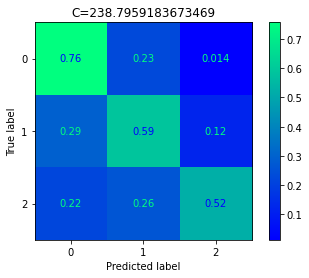

              precision    recall  f1-score   support

           0       0.62      0.59      0.60       126
           1       0.59      0.52      0.55        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09590525582475418

SVM - Poly, Train Accuracy = 0.8397185301016419, C=244.91632653061222
Test Accuracy = 0.659375


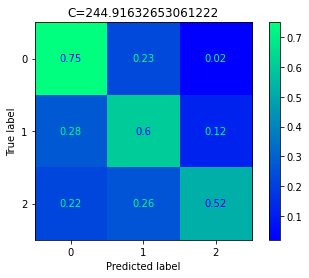

              precision    recall  f1-score   support

           0       0.62      0.60      0.61       126
           1       0.57      0.52      0.55        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.08352039631550423

SVM - Poly, Train Accuracy = 0.8405003909304144, C=251.03673469387752
Test Accuracy = 0.65625


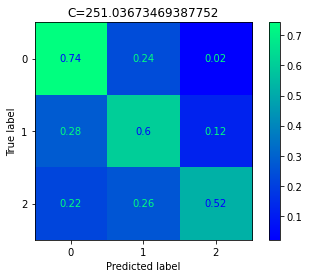

              precision    recall  f1-score   support

           0       0.62      0.60      0.61       126
           1       0.57      0.52      0.55        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07732796656087926

SVM - Poly, Train Accuracy = 0.8405003909304144, C=257.15714285714284
Test Accuracy = 0.653125


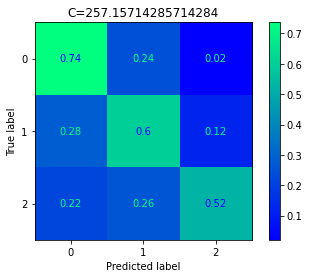

              precision    recall  f1-score   support

           0       0.61      0.60      0.61       126
           1       0.57      0.52      0.55        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07113553680625428

SVM - Poly, Train Accuracy = 0.8412822517591869, C=263.27755102040817
Test Accuracy = 0.65


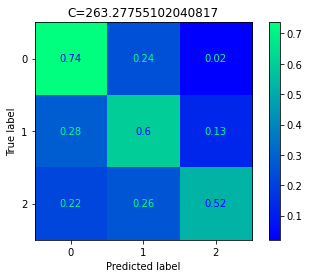

              precision    recall  f1-score   support

           0       0.61      0.60      0.60       126
           1       0.56      0.52      0.54        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06494310705162931

SVM - Poly, Train Accuracy = 0.8412822517591869, C=269.3979591836735
Test Accuracy = 0.653125


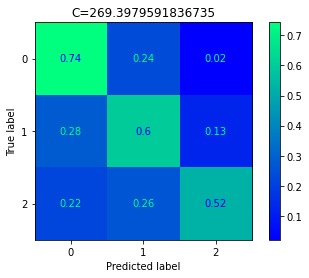

              precision    recall  f1-score   support

           0       0.61      0.60      0.60       126
           1       0.56      0.52      0.54        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07113553680625428

SVM - Poly, Train Accuracy = 0.8420641125879593, C=275.51836734693876
Test Accuracy = 0.65625


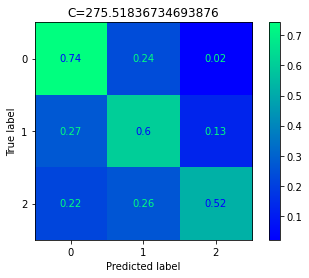

              precision    recall  f1-score   support

           0       0.62      0.60      0.61       126
           1       0.56      0.52      0.54        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07732796656087926

SVM - Poly, Train Accuracy = 0.8397185301016419, C=281.6387755102041
Test Accuracy = 0.65625


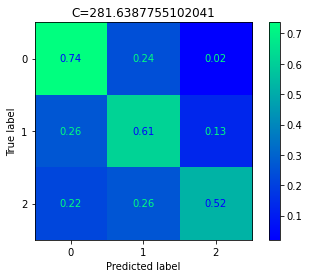

              precision    recall  f1-score   support

           0       0.62      0.61      0.61       126
           1       0.56      0.52      0.54        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07732796656087926

SVM - Poly, Train Accuracy = 0.8405003909304144, C=287.7591836734694
Test Accuracy = 0.659375


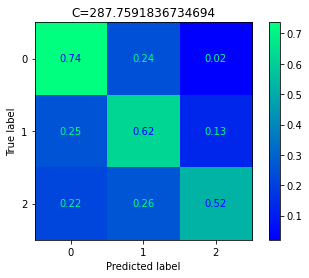

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       126
           1       0.56      0.52      0.54        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.08352039631550423

SVM - Poly, Train Accuracy = 0.8436278342455042, C=293.8795918367347
Test Accuracy = 0.659375


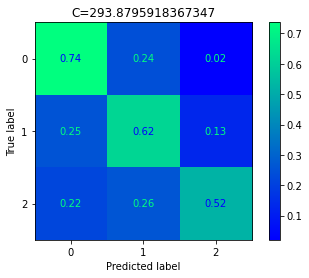

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       126
           1       0.56      0.52      0.54        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.08352039631550423

SVM - Poly, Train Accuracy = 0.8451915559030493, C=300.0
Test Accuracy = 0.659375


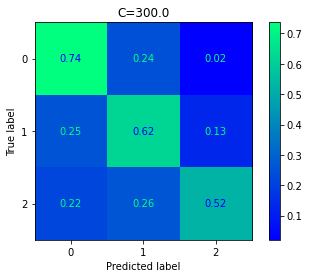

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       126
           1       0.56      0.52      0.54        46
           2       0.00      0.00      0.00         0
		 R2 Score: 0.08352039631550423



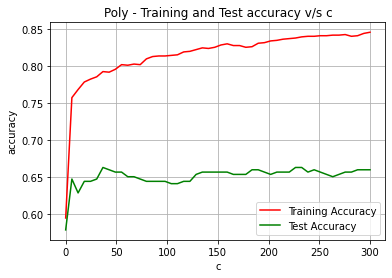

In [32]:
c_svm_linear = np.linspace(0.06, 10)
c_svm_rbf = np.linspace(1, 300)
c_svm_poly = np.linspace(0.1, 300)

train_and_plot(X_train, y_train, X_test, y_test, c_svm_linear, c_svm_rbf, c_svm_poly)

# Train White Wines Data

In [33]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_white)

Original y hist: (array([   0,    0,    0,   20,  163, 1457, 2198,  880,  180]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
Current y hist: (array([1640, 2198, 1060]), array([-1.5, -0.5,  0.5,  1.5]))
y min: -1.0, y max: 1.0
The shape of the wines dataset: (4898, 12)
y[:10]:
[-1.  0.  0.  1.  0.  0.  1.  1.  0.  0.]
X[:10, :]:
[[9.2000e+00 2.2000e-01 4.0000e-01 2.4000e+00 5.4000e-02 1.8000e+01
  1.5100e+02 9.9520e-01 3.0400e+00 4.6000e-01 9.3000e+00]
 [5.7000e+00 2.2000e-01 2.2000e-01 1.6650e+01 4.4000e-02 3.9000e+01
  1.1000e+02 9.9855e-01 3.2400e+00 4.8000e-01 9.0000e+00]
 [6.9000e+00 1.6000e-01 3.0000e-01 9.6000e+00 5.7000e-02 5.0000e+01
  1.8500e+02 9.9780e-01 3.3900e+00 3.8000e-01 9.6000e+00]
 [6.9000e+00 1.8000e-01 3.6000e-01 1.3000e+00 3.6000e-02 4.0000e+01
  1.1700e+02 9.9340e-01 3.2700e+00 9.5000e-01 9.5000e+00]
 [7.4000e+00 4.0000e-01 4.1000e-01 1.4100e+01 5.3000e-02 3.7000e+01
  1.9400e+02 9.9886e-01 3.2000e+00 6.3000e-01 9.4000e+00]
 [8.3000e+00 2.5000e-01 4.9000e-01 1.6800e+01

SVM - Linear, Train Accuracy = 0.5594691168963757, C=0.06
Test Accuracy = 0.5704081632653061


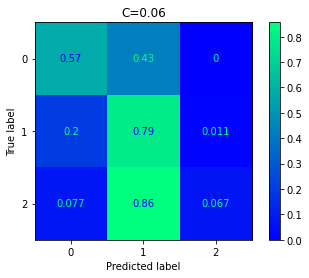

              precision    recall  f1-score   support

           0       0.53      0.79      0.63       446
           1       0.72      0.07      0.12       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09133597567769758

SVM - Linear, Train Accuracy = 0.5742725880551302, C=0.26285714285714284
Test Accuracy = 0.576530612244898


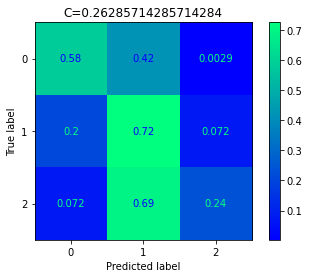

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.58      0.24      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.10303551247154696

SVM - Linear, Train Accuracy = 0.5719754977029097, C=0.4657142857142857
Test Accuracy = 0.5755102040816327


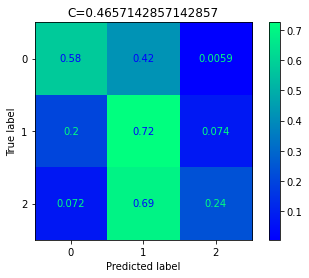

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.57      0.24      0.33       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09523582127564734

SVM - Linear, Train Accuracy = 0.5722307299642675, C=0.6685714285714286
Test Accuracy = 0.5755102040816327


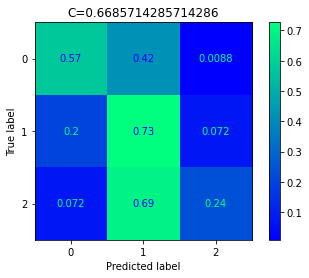

              precision    recall  f1-score   support

           0       0.54      0.73      0.62       446
           1       0.57      0.24      0.33       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0893860528787227

SVM - Linear, Train Accuracy = 0.5724859622256253, C=0.8714285714285714
Test Accuracy = 0.5744897959183674


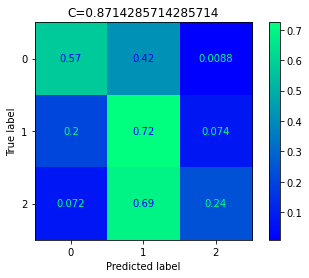

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.56      0.24      0.33       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.08743613007974782

SVM - Linear, Train Accuracy = 0.572996426748341, C=1.0742857142857143
Test Accuracy = 0.5806122448979592


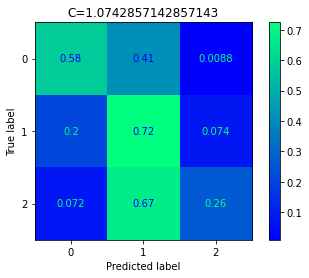

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.58      0.26      0.36       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0991356668735972

SVM - Linear, Train Accuracy = 0.5742725880551302, C=1.2771428571428571
Test Accuracy = 0.5795918367346938


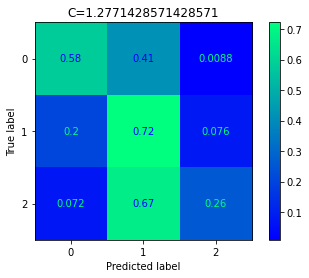

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.57      0.26      0.35       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09718574407462222

SVM - Linear, Train Accuracy = 0.5737621235324145, C=1.48
Test Accuracy = 0.5785714285714286


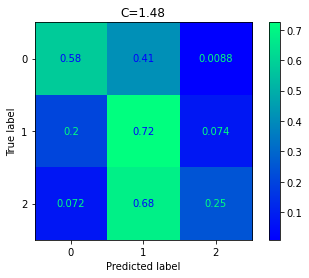

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.57      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09523582127564734

SVM - Linear, Train Accuracy = 0.5727411944869831, C=1.6828571428571428
Test Accuracy = 0.5775510204081633


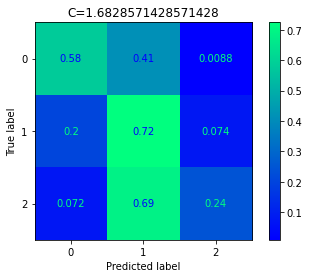

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.57      0.24      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09328589847667246

SVM - Linear, Train Accuracy = 0.5724859622256253, C=1.8857142857142857
Test Accuracy = 0.5775510204081633


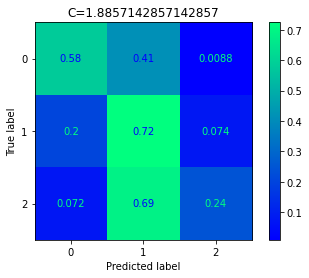

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.57      0.24      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09328589847667246

SVM - Linear, Train Accuracy = 0.5732516590096989, C=2.0885714285714285
Test Accuracy = 0.576530612244898


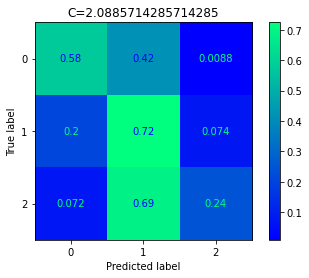

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.57      0.24      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09133597567769758

SVM - Linear, Train Accuracy = 0.5740173557937723, C=2.2914285714285714
Test Accuracy = 0.576530612244898


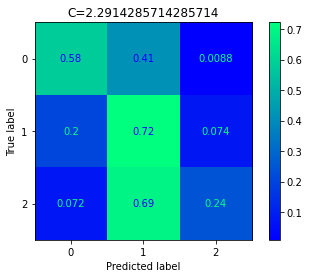

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.57      0.24      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09133597567769758

SVM - Linear, Train Accuracy = 0.5740173557937723, C=2.494285714285714
Test Accuracy = 0.576530612244898


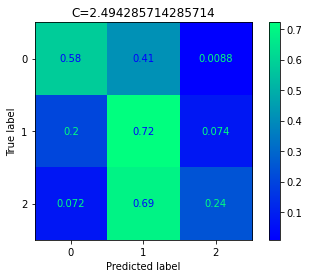

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.57      0.24      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09133597567769758

SVM - Linear, Train Accuracy = 0.5740173557937723, C=2.697142857142857
Test Accuracy = 0.576530612244898


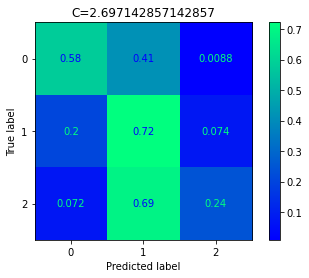

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.57      0.24      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09133597567769758

SVM - Linear, Train Accuracy = 0.5732516590096989, C=2.9
Test Accuracy = 0.5775510204081633


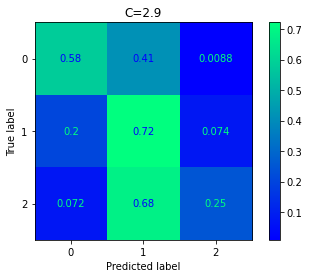

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.57      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09328589847667246

SVM - Linear, Train Accuracy = 0.5737621235324145, C=3.1028571428571428
Test Accuracy = 0.576530612244898


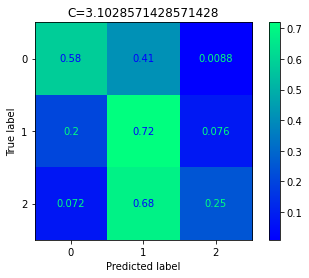

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.56      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09133597567769758

SVM - Linear, Train Accuracy = 0.5735068912710567, C=3.3057142857142856
Test Accuracy = 0.5775510204081633


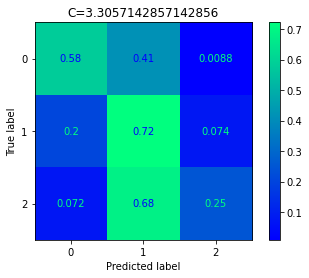

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.57      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09328589847667246

SVM - Linear, Train Accuracy = 0.5735068912710567, C=3.5085714285714285
Test Accuracy = 0.5775510204081633


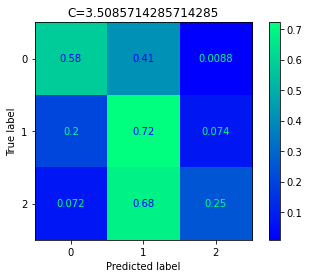

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.57      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09328589847667246

SVM - Linear, Train Accuracy = 0.5735068912710567, C=3.7114285714285713
Test Accuracy = 0.5775510204081633


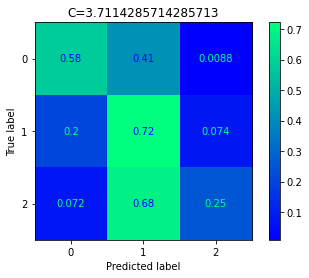

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.57      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09328589847667246

SVM - Linear, Train Accuracy = 0.5742725880551302, C=3.914285714285714
Test Accuracy = 0.5755102040816327


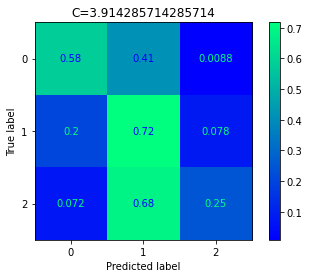

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.56      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0893860528787227

SVM - Linear, Train Accuracy = 0.5750382848392037, C=4.1171428571428565
Test Accuracy = 0.5755102040816327


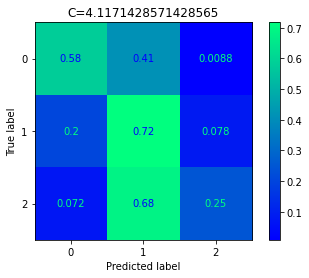

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.56      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0893860528787227

SVM - Linear, Train Accuracy = 0.5742725880551302, C=4.319999999999999
Test Accuracy = 0.5755102040816327


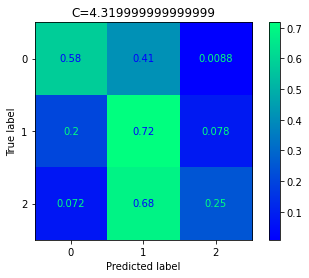

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.56      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0893860528787227

SVM - Linear, Train Accuracy = 0.5737621235324145, C=4.522857142857142
Test Accuracy = 0.576530612244898


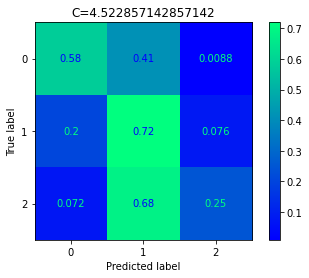

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.56      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09133597567769758

SVM - Linear, Train Accuracy = 0.5737621235324145, C=4.725714285714285
Test Accuracy = 0.5775510204081633


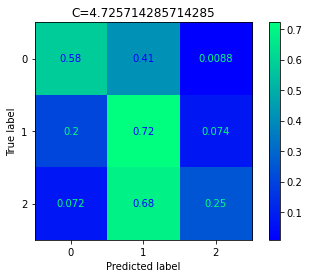

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.57      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09328589847667246

SVM - Linear, Train Accuracy = 0.5735068912710567, C=4.928571428571428
Test Accuracy = 0.5775510204081633


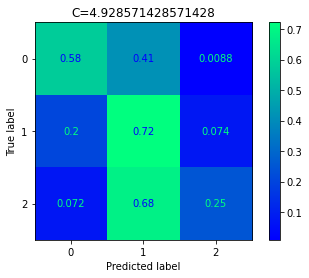

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.57      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09328589847667246

SVM - Linear, Train Accuracy = 0.5735068912710567, C=5.131428571428571
Test Accuracy = 0.5775510204081633


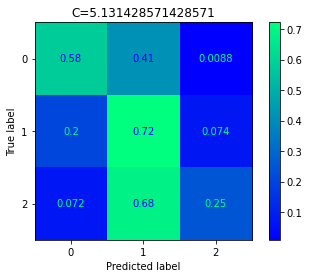

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.57      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09328589847667246

SVM - Linear, Train Accuracy = 0.5735068912710567, C=5.334285714285714
Test Accuracy = 0.576530612244898


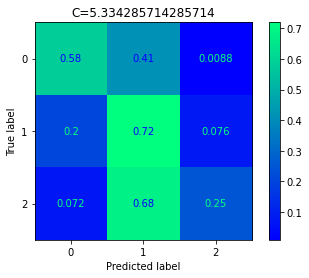

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.56      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09133597567769758

SVM - Linear, Train Accuracy = 0.5742725880551302, C=5.5371428571428565
Test Accuracy = 0.5755102040816327


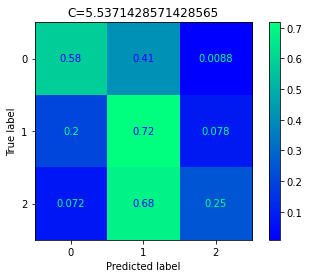

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.56      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0893860528787227

SVM - Linear, Train Accuracy = 0.5737621235324145, C=5.739999999999999
Test Accuracy = 0.576530612244898


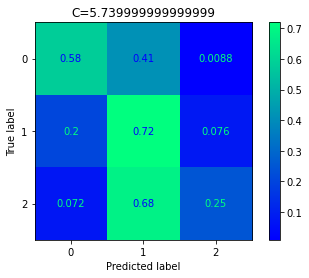

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.56      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09133597567769758

SVM - Linear, Train Accuracy = 0.5735068912710567, C=5.942857142857142
Test Accuracy = 0.576530612244898


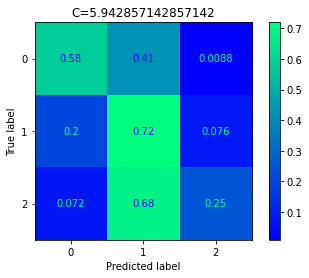

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.56      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09133597567769758

SVM - Linear, Train Accuracy = 0.5735068912710567, C=6.145714285714285
Test Accuracy = 0.5775510204081633


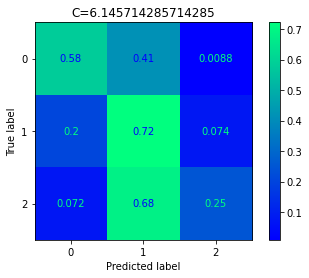

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.57      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09328589847667246

SVM - Linear, Train Accuracy = 0.5732516590096989, C=6.348571428571428
Test Accuracy = 0.5775510204081633


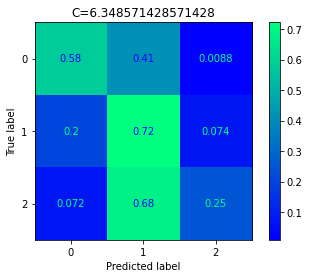

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.57      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09328589847667246

SVM - Linear, Train Accuracy = 0.5737621235324145, C=6.551428571428571
Test Accuracy = 0.5755102040816327


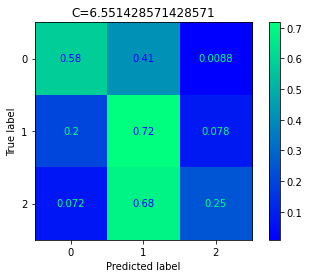

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.56      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0893860528787227

SVM - Linear, Train Accuracy = 0.5742725880551302, C=6.754285714285714
Test Accuracy = 0.5755102040816327


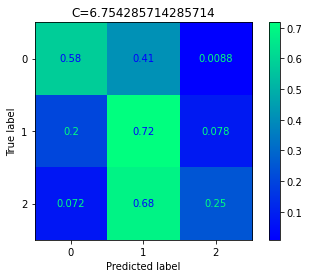

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.56      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0893860528787227

SVM - Linear, Train Accuracy = 0.5737621235324145, C=6.957142857142856
Test Accuracy = 0.5755102040816327


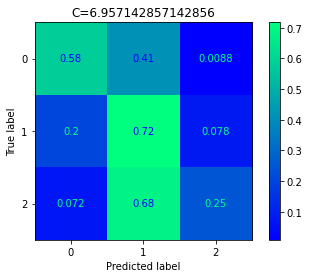

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.56      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0893860528787227

SVM - Linear, Train Accuracy = 0.5737621235324145, C=7.159999999999999
Test Accuracy = 0.576530612244898


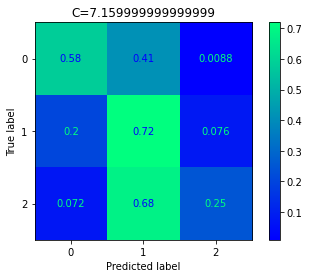

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.56      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09133597567769758

SVM - Linear, Train Accuracy = 0.5742725880551302, C=7.362857142857142
Test Accuracy = 0.5755102040816327


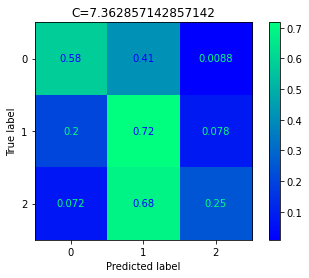

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.56      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0893860528787227

SVM - Linear, Train Accuracy = 0.5747830525778458, C=7.565714285714285
Test Accuracy = 0.5755102040816327


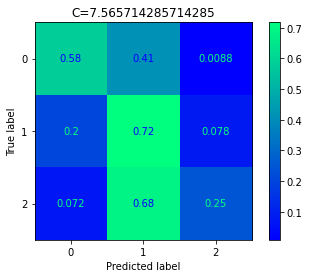

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.56      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0893860528787227

SVM - Linear, Train Accuracy = 0.5742725880551302, C=7.768571428571428
Test Accuracy = 0.5755102040816327


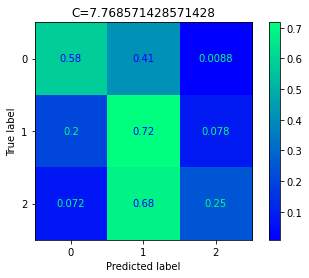

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.56      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0893860528787227

SVM - Linear, Train Accuracy = 0.574527820316488, C=7.971428571428571
Test Accuracy = 0.5755102040816327


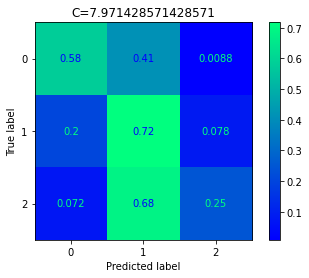

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.56      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0893860528787227

SVM - Linear, Train Accuracy = 0.5747830525778458, C=8.174285714285714
Test Accuracy = 0.5755102040816327


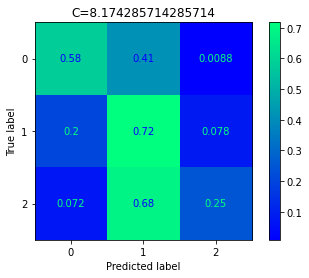

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.56      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0893860528787227

SVM - Linear, Train Accuracy = 0.5737621235324145, C=8.377142857142857
Test Accuracy = 0.5755102040816327


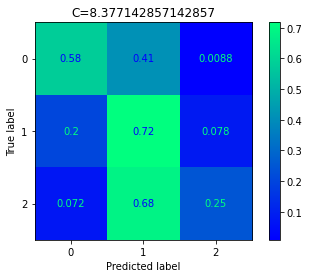

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.56      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0893860528787227

SVM - Linear, Train Accuracy = 0.5742725880551302, C=8.58
Test Accuracy = 0.5755102040816327


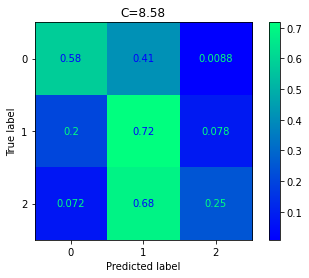

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.56      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0893860528787227

SVM - Linear, Train Accuracy = 0.574527820316488, C=8.782857142857143
Test Accuracy = 0.5755102040816327


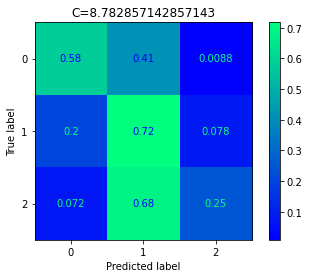

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.56      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0893860528787227

SVM - Linear, Train Accuracy = 0.574527820316488, C=8.985714285714286
Test Accuracy = 0.5755102040816327


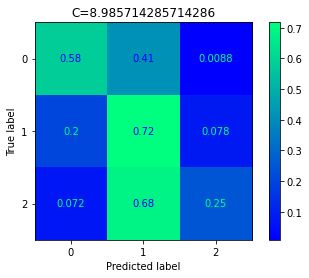

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.56      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0893860528787227

SVM - Linear, Train Accuracy = 0.5742725880551302, C=9.188571428571429
Test Accuracy = 0.5755102040816327


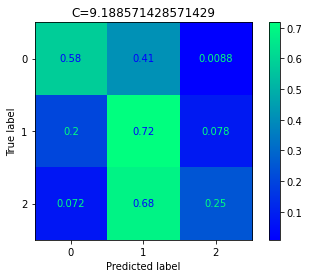

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.56      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0893860528787227

SVM - Linear, Train Accuracy = 0.5747830525778458, C=9.391428571428571
Test Accuracy = 0.5755102040816327


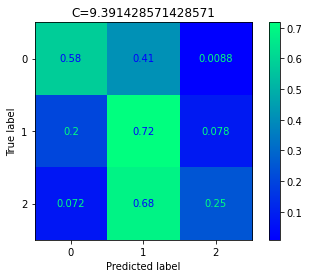

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.56      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0893860528787227

SVM - Linear, Train Accuracy = 0.5747830525778458, C=9.594285714285714
Test Accuracy = 0.5755102040816327


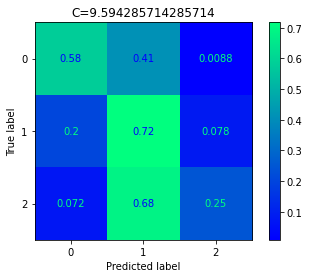

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.56      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0893860528787227

SVM - Linear, Train Accuracy = 0.574527820316488, C=9.797142857142857
Test Accuracy = 0.5755102040816327


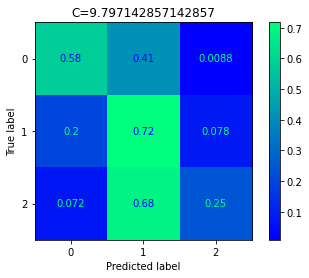

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.56      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0893860528787227

SVM - Linear, Train Accuracy = 0.574527820316488, C=10.0
Test Accuracy = 0.5755102040816327


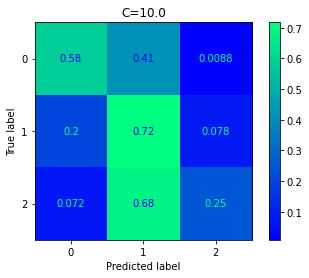

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       446
           1       0.56      0.25      0.34       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0893860528787227



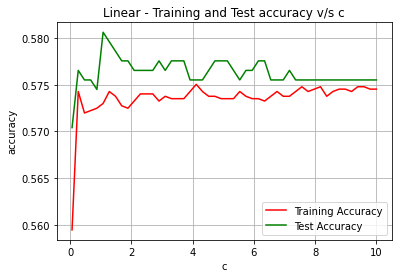

SVM - RBF, Train Accuracy = 0.6620724859622257, C=1.0
Test Accuracy = 0.6204081632653061


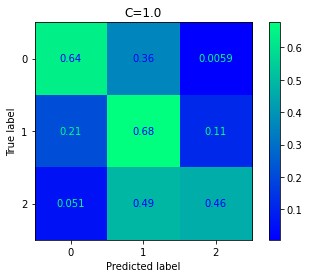

              precision    recall  f1-score   support

           0       0.58      0.68      0.63       446
           1       0.63      0.46      0.53       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.20443149801824168

SVM - RBF, Train Accuracy = 0.7404287901990811, C=7.1020408163265305
Test Accuracy = 0.6428571428571429


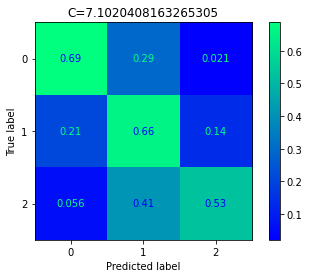

              precision    recall  f1-score   support

           0       0.62      0.66      0.64       446
           1       0.60      0.53      0.57       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2122311892141412

SVM - RBF, Train Accuracy = 0.7751403777437468, C=13.204081632653061
Test Accuracy = 0.6438775510204081


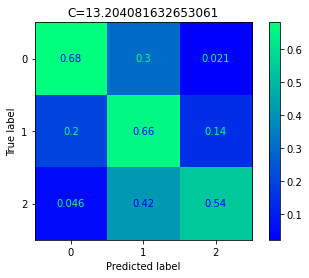

              precision    recall  f1-score   support

           0       0.62      0.66      0.64       446
           1       0.60      0.54      0.57       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.22588064880696557

SVM - RBF, Train Accuracy = 0.7922409392547218, C=19.306122448979593
Test Accuracy = 0.6418367346938776


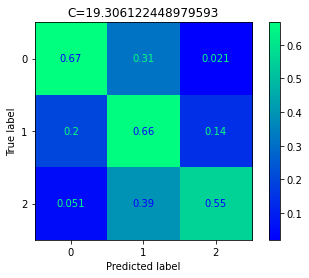

              precision    recall  f1-score   support

           0       0.62      0.66      0.64       446
           1       0.61      0.55      0.58       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.21613103481209106

SVM - RBF, Train Accuracy = 0.8075548749361919, C=25.408163265306122
Test Accuracy = 0.6489795918367347


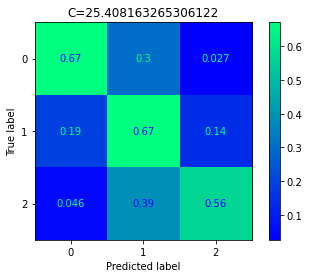

              precision    recall  f1-score   support

           0       0.63      0.67      0.65       446
           1       0.60      0.56      0.58       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.22393072600799058

SVM - RBF, Train Accuracy = 0.8190403266972945, C=31.51020408163265
Test Accuracy = 0.6459183673469387


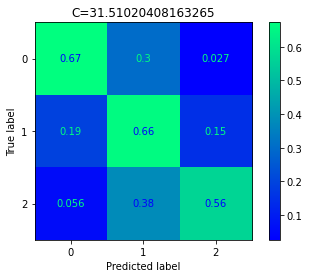

              precision    recall  f1-score   support

           0       0.63      0.66      0.64       446
           1       0.60      0.56      0.58       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.20638142081721655

SVM - RBF, Train Accuracy = 0.8266972945380296, C=37.61224489795919
Test Accuracy = 0.6459183673469387


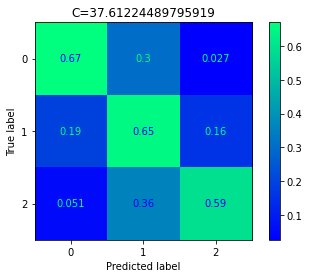

              precision    recall  f1-score   support

           0       0.63      0.65      0.64       446
           1       0.59      0.59      0.59       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2122311892141412

SVM - RBF, Train Accuracy = 0.8389484430832057, C=43.714285714285715
Test Accuracy = 0.6510204081632653


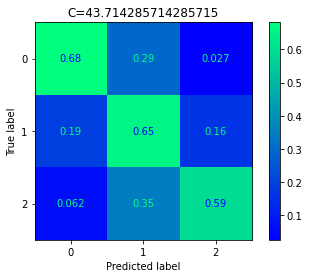

              precision    recall  f1-score   support

           0       0.64      0.65      0.65       446
           1       0.59      0.59      0.59       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2102812664151663

SVM - RBF, Train Accuracy = 0.8489025012761613, C=49.816326530612244
Test Accuracy = 0.65


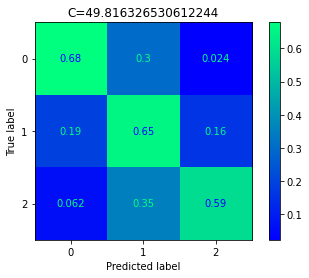

              precision    recall  f1-score   support

           0       0.63      0.65      0.64       446
           1       0.60      0.59      0.59       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.21418111201311618

SVM - RBF, Train Accuracy = 0.8534966819806024, C=55.91836734693877
Test Accuracy = 0.6448979591836734


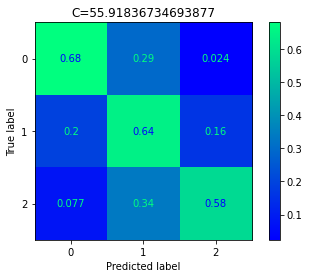

              precision    recall  f1-score   support

           0       0.63      0.64      0.64       446
           1       0.59      0.58      0.59       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18688219282746754

SVM - RBF, Train Accuracy = 0.8606431852986217, C=62.0204081632653
Test Accuracy = 0.6520408163265307


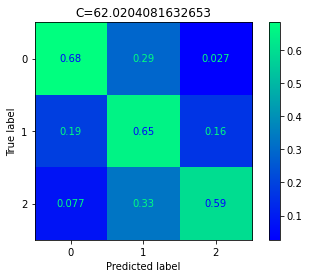

              precision    recall  f1-score   support

           0       0.64      0.65      0.65       446
           1       0.59      0.59      0.59       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19468188402336717

SVM - RBF, Train Accuracy = 0.8657478305257784, C=68.12244897959184
Test Accuracy = 0.6591836734693878


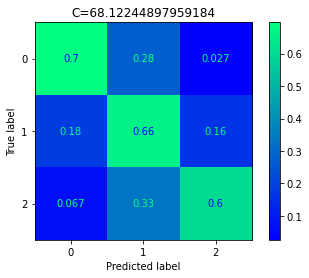

              precision    recall  f1-score   support

           0       0.65      0.66      0.65       446
           1       0.59      0.60      0.60       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.22003088041004082

SVM - RBF, Train Accuracy = 0.869576314446146, C=74.22448979591837
Test Accuracy = 0.6612244897959184


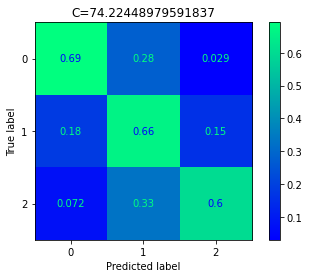

              precision    recall  f1-score   support

           0       0.65      0.66      0.66       446
           1       0.60      0.60      0.60       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2122311892141412

SVM - RBF, Train Accuracy = 0.8731495661051557, C=80.3265306122449
Test Accuracy = 0.6591836734693878


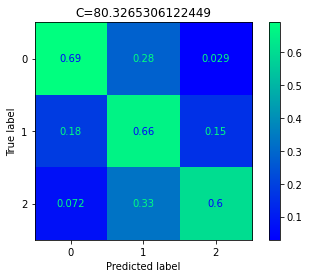

              precision    recall  f1-score   support

           0       0.65      0.66      0.66       446
           1       0.60      0.60      0.60       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.20833134361619143

SVM - RBF, Train Accuracy = 0.8746809596733027, C=86.42857142857143
Test Accuracy = 0.6581632653061225


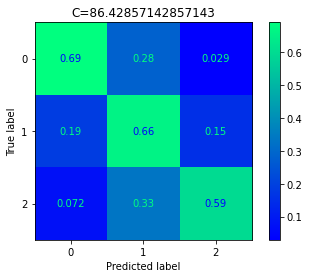

              precision    recall  f1-score   support

           0       0.65      0.66      0.65       446
           1       0.60      0.59      0.60       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.20638142081721655

SVM - RBF, Train Accuracy = 0.8795303726391016, C=92.53061224489795
Test Accuracy = 0.6602040816326531


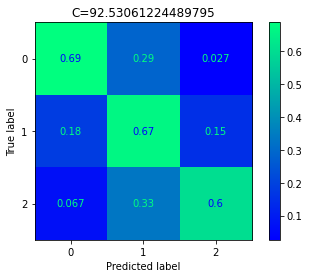

              precision    recall  f1-score   support

           0       0.65      0.67      0.66       446
           1       0.61      0.60      0.60       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2219808032090157

SVM - RBF, Train Accuracy = 0.8841245533435427, C=98.63265306122449
Test Accuracy = 0.6612244897959184


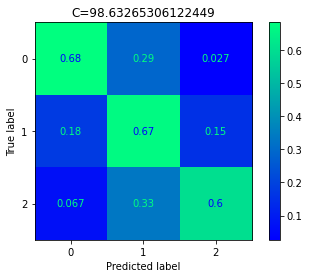

              precision    recall  f1-score   support

           0       0.65      0.67      0.66       446
           1       0.60      0.60      0.60       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.22393072600799058

SVM - RBF, Train Accuracy = 0.8864216436957632, C=104.73469387755102
Test Accuracy = 0.6632653061224489


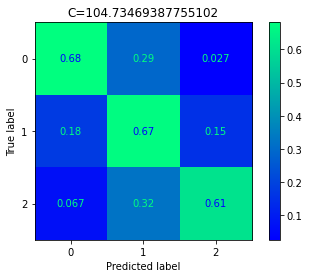

              precision    recall  f1-score   support

           0       0.65      0.67      0.66       446
           1       0.61      0.61      0.61       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.22783057160594045

SVM - RBF, Train Accuracy = 0.888208269525268, C=110.83673469387755
Test Accuracy = 0.6632653061224489


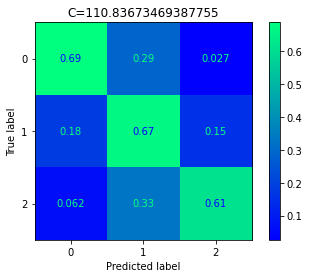

              precision    recall  f1-score   support

           0       0.65      0.67      0.66       446
           1       0.61      0.61      0.61       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.23368034000286508

SVM - RBF, Train Accuracy = 0.8910158244002042, C=116.93877551020408
Test Accuracy = 0.6632653061224489


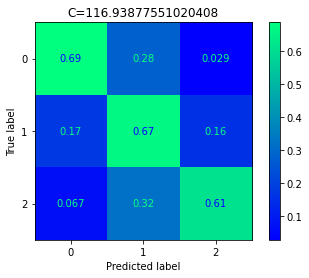

              precision    recall  f1-score   support

           0       0.65      0.67      0.66       446
           1       0.60      0.61      0.60       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2219808032090157

SVM - RBF, Train Accuracy = 0.8945890760592139, C=123.0408163265306
Test Accuracy = 0.6663265306122449


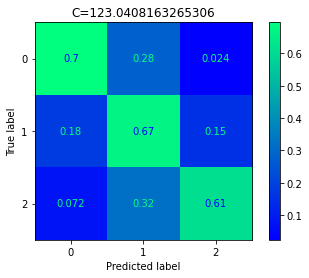

              precision    recall  f1-score   support

           0       0.65      0.67      0.66       446
           1       0.61      0.61      0.61       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.23368034000286508

SVM - RBF, Train Accuracy = 0.8976518631955079, C=129.14285714285714
Test Accuracy = 0.6663265306122449


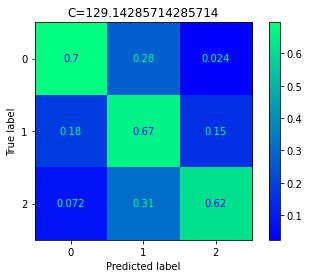

              precision    recall  f1-score   support

           0       0.66      0.67      0.66       446
           1       0.61      0.62      0.61       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.23368034000286508

SVM - RBF, Train Accuracy = 0.899183256763655, C=135.24489795918367
Test Accuracy = 0.6714285714285714


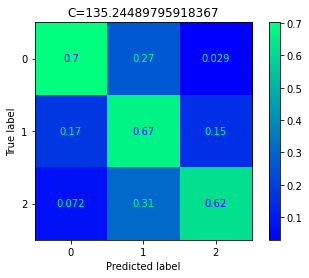

              precision    recall  f1-score   support

           0       0.66      0.67      0.67       446
           1       0.60      0.62      0.61       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2317304172038902

SVM - RBF, Train Accuracy = 0.9012251148545176, C=141.3469387755102
Test Accuracy = 0.6714285714285714


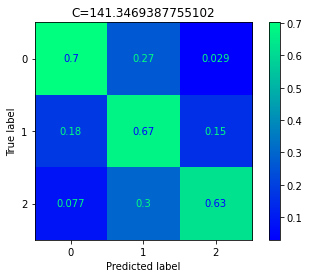

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       446
           1       0.61      0.63      0.62       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.22588064880696557

SVM - RBF, Train Accuracy = 0.902246043899949, C=147.44897959183675
Test Accuracy = 0.6755102040816326


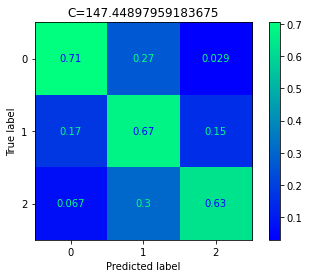

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       446
           1       0.61      0.63      0.62       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.24537987679671447

SVM - RBF, Train Accuracy = 0.9040326697294538, C=153.55102040816325
Test Accuracy = 0.6775510204081633


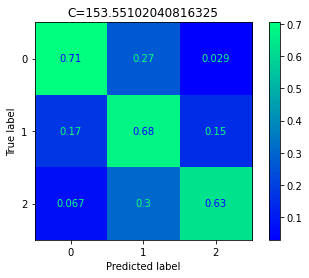

              precision    recall  f1-score   support

           0       0.67      0.68      0.67       446
           1       0.61      0.63      0.62       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.24927972239466434

SVM - RBF, Train Accuracy = 0.9055640632976009, C=159.6530612244898
Test Accuracy = 0.6795918367346939


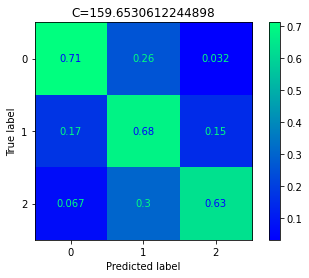

              precision    recall  f1-score   support

           0       0.67      0.68      0.68       446
           1       0.61      0.63      0.62       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.24732979959568935

SVM - RBF, Train Accuracy = 0.9070954568657479, C=165.75510204081633
Test Accuracy = 0.6795918367346939


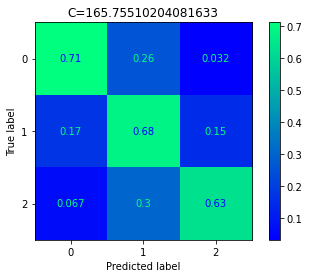

              precision    recall  f1-score   support

           0       0.67      0.68      0.68       446
           1       0.61      0.63      0.62       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.24732979959568935

SVM - RBF, Train Accuracy = 0.9086268504338948, C=171.85714285714286
Test Accuracy = 0.6806122448979591


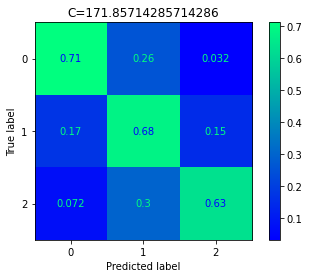

              precision    recall  f1-score   support

           0       0.68      0.68      0.68       446
           1       0.61      0.63      0.62       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2434299539977396

SVM - RBF, Train Accuracy = 0.9096477794793262, C=177.9591836734694
Test Accuracy = 0.6806122448979591


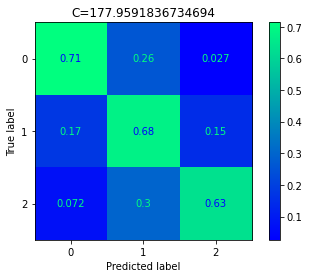

              precision    recall  f1-score   support

           0       0.67      0.68      0.68       446
           1       0.62      0.63      0.63       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.255129490791589

SVM - RBF, Train Accuracy = 0.9119448698315467, C=184.0612244897959
Test Accuracy = 0.6744897959183673


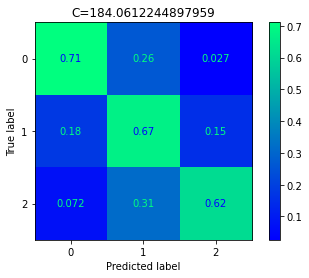

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       446
           1       0.61      0.62      0.61       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2434299539977396

SVM - RBF, Train Accuracy = 0.9137314956610516, C=190.16326530612244
Test Accuracy = 0.6755102040816326


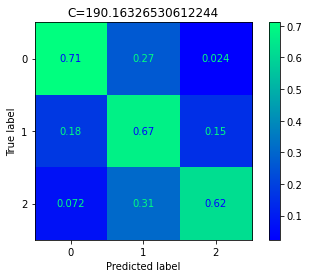

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       446
           1       0.62      0.62      0.62       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2512296451936392

SVM - RBF, Train Accuracy = 0.9139867279224094, C=196.26530612244898
Test Accuracy = 0.6724489795918367


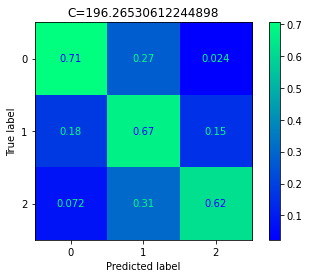

              precision    recall  f1-score   support

           0       0.66      0.67      0.67       446
           1       0.61      0.62      0.62       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.24537987679671447

SVM - RBF, Train Accuracy = 0.9142419601837672, C=202.3673469387755
Test Accuracy = 0.6714285714285714


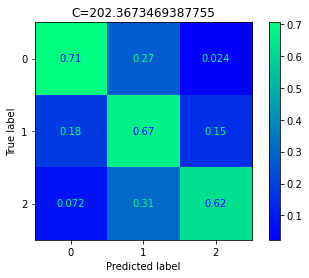

              precision    recall  f1-score   support

           0       0.66      0.67      0.67       446
           1       0.62      0.62      0.62       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2434299539977396

SVM - RBF, Train Accuracy = 0.9160285860132721, C=208.46938775510205
Test Accuracy = 0.6724489795918367


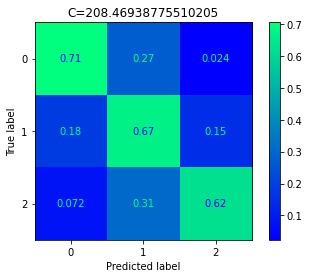

              precision    recall  f1-score   support

           0       0.66      0.67      0.67       446
           1       0.62      0.62      0.62       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.24537987679671447

SVM - RBF, Train Accuracy = 0.9173047473200613, C=214.57142857142856
Test Accuracy = 0.673469387755102


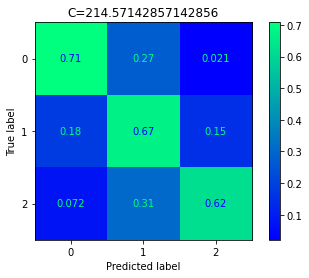

              precision    recall  f1-score   support

           0       0.66      0.67      0.67       446
           1       0.62      0.62      0.62       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2531795679926141

SVM - RBF, Train Accuracy = 0.9178152118427769, C=220.6734693877551
Test Accuracy = 0.6724489795918367


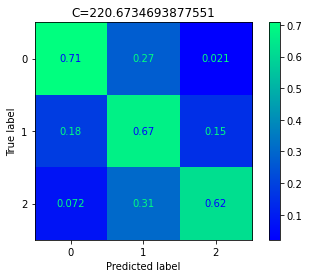

              precision    recall  f1-score   support

           0       0.66      0.67      0.67       446
           1       0.62      0.62      0.62       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2512296451936392

SVM - RBF, Train Accuracy = 0.9196018376722818, C=226.77551020408163
Test Accuracy = 0.6744897959183673


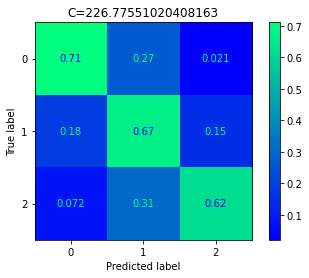

              precision    recall  f1-score   support

           0       0.66      0.67      0.67       446
           1       0.63      0.62      0.62       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.255129490791589

SVM - RBF, Train Accuracy = 0.919346605410924, C=232.87755102040816
Test Accuracy = 0.673469387755102


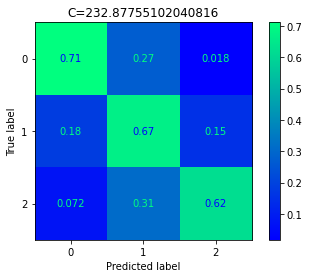

              precision    recall  f1-score   support

           0       0.66      0.67      0.67       446
           1       0.63      0.62      0.62       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25902933638953873

SVM - RBF, Train Accuracy = 0.9203675344563553, C=238.9795918367347
Test Accuracy = 0.673469387755102


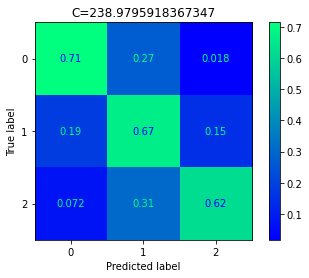

              precision    recall  f1-score   support

           0       0.66      0.67      0.66       446
           1       0.63      0.62      0.62       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25902933638953873

SVM - RBF, Train Accuracy = 0.9213884635017866, C=245.0816326530612
Test Accuracy = 0.6755102040816326


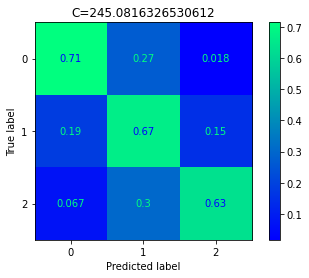

              precision    recall  f1-score   support

           0       0.66      0.67      0.67       446
           1       0.63      0.63      0.63       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.26877895038441324

SVM - RBF, Train Accuracy = 0.9213884635017866, C=251.18367346938774
Test Accuracy = 0.676530612244898


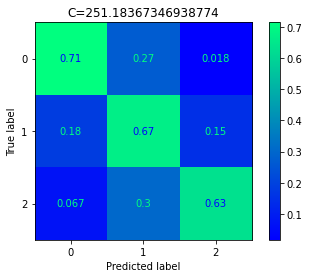

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       446
           1       0.63      0.63      0.63       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2707288731833881

SVM - RBF, Train Accuracy = 0.9218989280245024, C=257.2857142857143
Test Accuracy = 0.6775510204081633


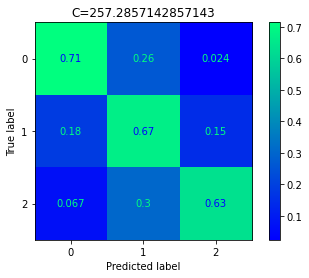

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       446
           1       0.63      0.63      0.63       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2609792591885137

SVM - RBF, Train Accuracy = 0.9241960183767228, C=263.3877551020408
Test Accuracy = 0.6755102040816326


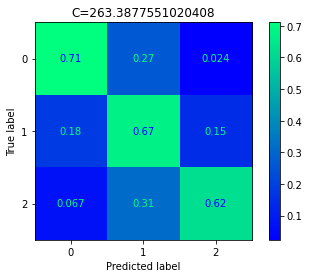

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       446
           1       0.62      0.62      0.62       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25707941359056385

SVM - RBF, Train Accuracy = 0.925472179683512, C=269.48979591836735
Test Accuracy = 0.6755102040816326


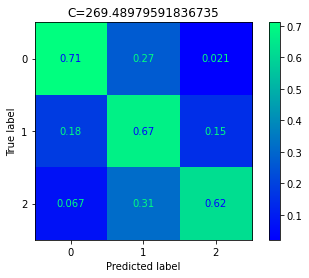

              precision    recall  f1-score   support

           0       0.66      0.67      0.67       446
           1       0.63      0.62      0.62       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2629291819874886

SVM - RBF, Train Accuracy = 0.9257274119448698, C=275.59183673469386
Test Accuracy = 0.6775510204081633


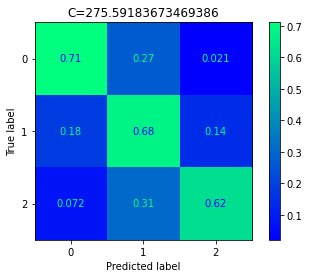

              precision    recall  f1-score   support

           0       0.67      0.68      0.67       446
           1       0.63      0.62      0.63       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2609792591885137

SVM - RBF, Train Accuracy = 0.9259826442062277, C=281.6938775510204
Test Accuracy = 0.6775510204081633


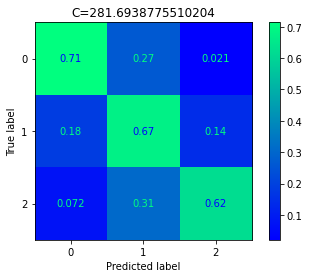

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       446
           1       0.63      0.62      0.63       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2609792591885137

SVM - RBF, Train Accuracy = 0.9262378764675855, C=287.7959183673469
Test Accuracy = 0.6775510204081633


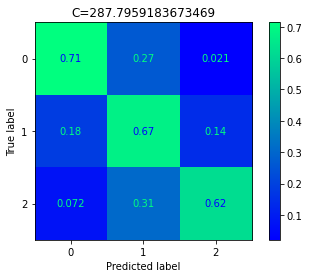

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       446
           1       0.63      0.62      0.63       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2609792591885137

SVM - RBF, Train Accuracy = 0.9282797345584481, C=293.8979591836735
Test Accuracy = 0.6785714285714286


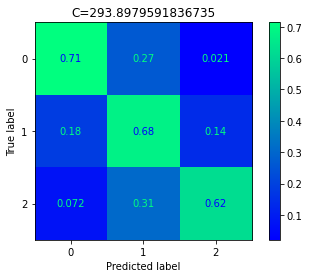

              precision    recall  f1-score   support

           0       0.67      0.68      0.67       446
           1       0.64      0.62      0.63       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2629291819874886

SVM - RBF, Train Accuracy = 0.930066360387953, C=300.0
Test Accuracy = 0.676530612244898


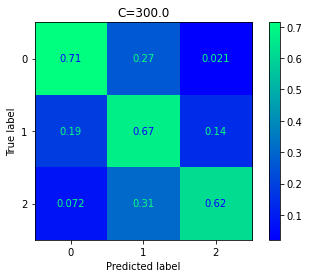

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       446
           1       0.64      0.62      0.63       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25902933638953873



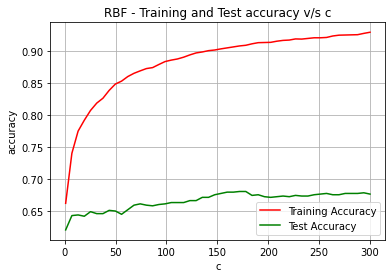

SVM - Poly, Train Accuracy = 0.5497702909647779, C=0.1
Test Accuracy = 0.536734693877551


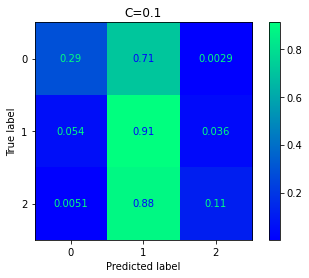

              precision    recall  f1-score   support

           0       0.50      0.91      0.64       446
           1       0.56      0.11      0.19       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.10303551247154696

SVM - Poly, Train Accuracy = 0.6375701888718734, C=6.220408163265305
Test Accuracy = 0.5857142857142857


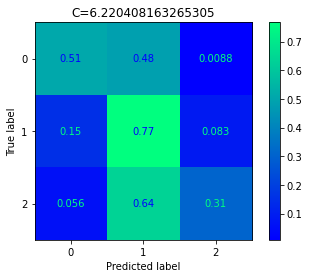

              precision    recall  f1-score   support

           0       0.54      0.77      0.64       446
           1       0.60      0.31      0.41       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12643458605924573

SVM - Poly, Train Accuracy = 0.6503318019397651, C=12.34081632653061
Test Accuracy = 0.5908163265306122


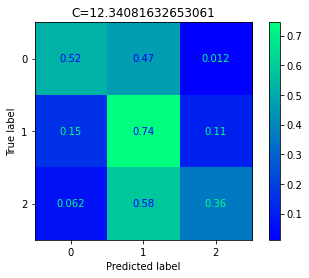

              precision    recall  f1-score   support

           0       0.55      0.74      0.63       446
           1       0.58      0.36      0.44       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12448466326027086

SVM - Poly, Train Accuracy = 0.6559469116896376, C=18.461224489795917
Test Accuracy = 0.5979591836734693


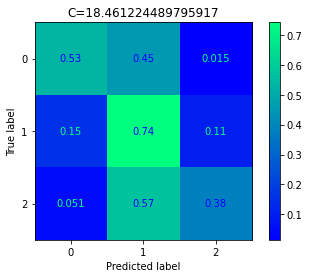

              precision    recall  f1-score   support

           0       0.56      0.74      0.64       446
           1       0.59      0.38      0.46       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14398389125001976

SVM - Poly, Train Accuracy = 0.6587544665645738, C=24.581632653061224
Test Accuracy = 0.5989795918367347


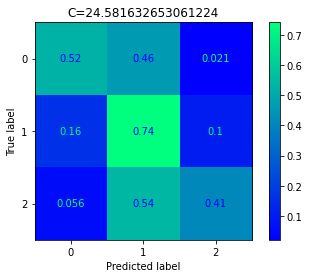

              precision    recall  f1-score   support

           0       0.56      0.74      0.64       446
           1       0.60      0.41      0.48       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12838450885822061

SVM - Poly, Train Accuracy = 0.6648800408371618, C=30.70204081632653
Test Accuracy = 0.6020408163265306


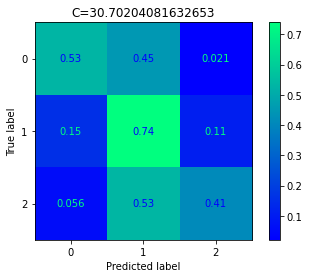

              precision    recall  f1-score   support

           0       0.56      0.74      0.64       446
           1       0.60      0.41      0.49       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13423427725514536

SVM - Poly, Train Accuracy = 0.6669218989280244, C=36.82244897959183
Test Accuracy = 0.5979591836734693


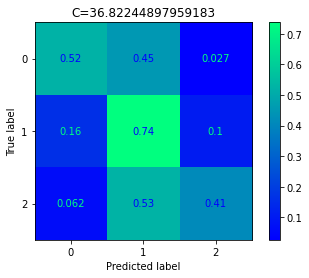

              precision    recall  f1-score   support

           0       0.56      0.74      0.64       446
           1       0.59      0.41      0.48       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1088852808684716

SVM - Poly, Train Accuracy = 0.6697294538029607, C=42.94285714285714
Test Accuracy = 0.6


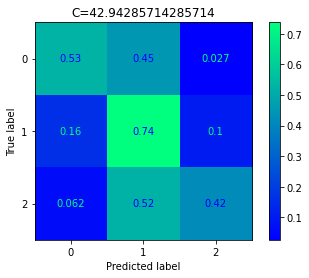

              precision    recall  f1-score   support

           0       0.56      0.74      0.64       446
           1       0.60      0.42      0.49       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.11278512646642147

SVM - Poly, Train Accuracy = 0.6699846860643185, C=49.063265306122446
Test Accuracy = 0.6020408163265306


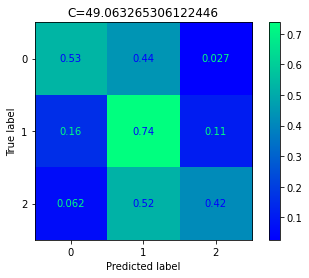

              precision    recall  f1-score   support

           0       0.57      0.74      0.64       446
           1       0.59      0.42      0.49       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.11668497206437123

SVM - Poly, Train Accuracy = 0.6743236345074017, C=55.18367346938775
Test Accuracy = 0.6020408163265306


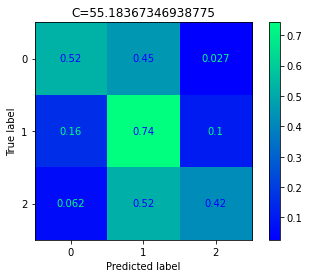

              precision    recall  f1-score   support

           0       0.57      0.74      0.64       446
           1       0.60      0.42      0.50       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.11668497206437123

SVM - Poly, Train Accuracy = 0.6730474732006125, C=61.30408163265306
Test Accuracy = 0.6030612244897959


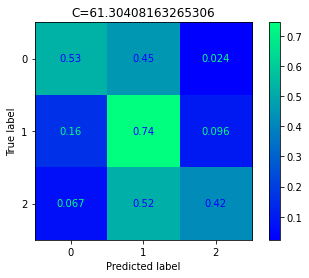

              precision    recall  f1-score   support

           0       0.57      0.74      0.64       446
           1       0.61      0.42      0.50       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.11863489486334611

SVM - Poly, Train Accuracy = 0.6727922409392547, C=67.42448979591836
Test Accuracy = 0.6030612244897959


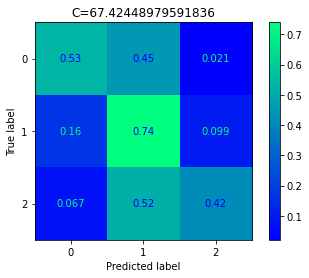

              precision    recall  f1-score   support

           0       0.57      0.74      0.64       446
           1       0.61      0.42      0.50       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12448466326027086

SVM - Poly, Train Accuracy = 0.6704951505870342, C=73.54489795918366
Test Accuracy = 0.6


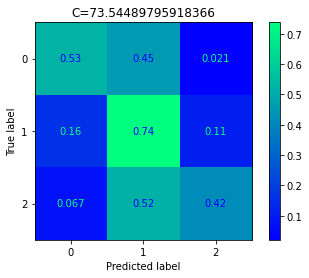

              precision    recall  f1-score   support

           0       0.56      0.74      0.64       446
           1       0.60      0.42      0.49       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.11863489486334611

SVM - Poly, Train Accuracy = 0.6712608473711077, C=79.66530612244897
Test Accuracy = 0.5959183673469388


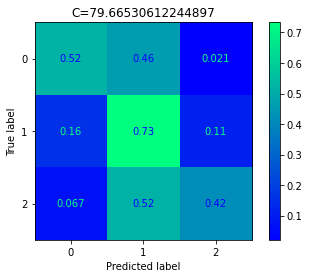

              precision    recall  f1-score   support

           0       0.56      0.73      0.63       446
           1       0.59      0.42      0.49       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.11083520366744659

SVM - Poly, Train Accuracy = 0.6717713118938233, C=85.78571428571428
Test Accuracy = 0.5948979591836735


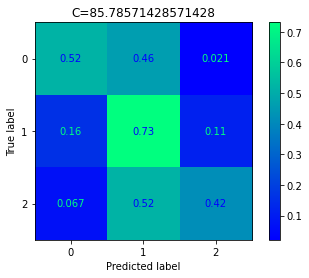

              precision    recall  f1-score   support

           0       0.56      0.73      0.63       446
           1       0.59      0.42      0.49       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1088852808684716

SVM - Poly, Train Accuracy = 0.6725370086778969, C=91.90612244897957
Test Accuracy = 0.5979591836734693


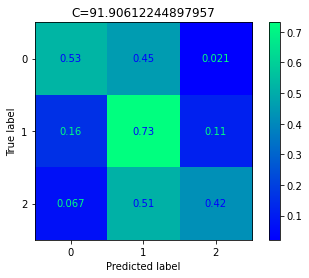

              precision    recall  f1-score   support

           0       0.56      0.73      0.64       446
           1       0.59      0.42      0.49       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.11473504926539635

SVM - Poly, Train Accuracy = 0.6733027054619704, C=98.02653061224488
Test Accuracy = 0.5969387755102041


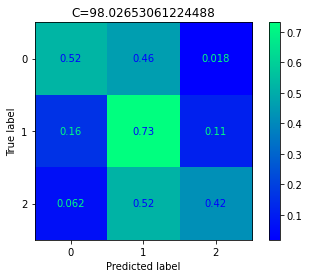

              precision    recall  f1-score   support

           0       0.56      0.73      0.63       446
           1       0.60      0.42      0.49       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12448466326027086

SVM - Poly, Train Accuracy = 0.6733027054619704, C=104.1469387755102
Test Accuracy = 0.5989795918367347


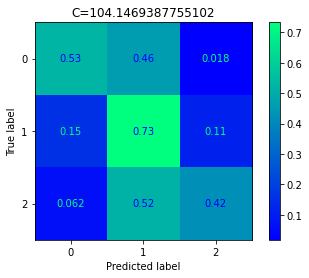

              precision    recall  f1-score   support

           0       0.56      0.73      0.64       446
           1       0.59      0.42      0.49       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12838450885822061

SVM - Poly, Train Accuracy = 0.6761102603369066, C=110.26734693877549
Test Accuracy = 0.6030612244897959


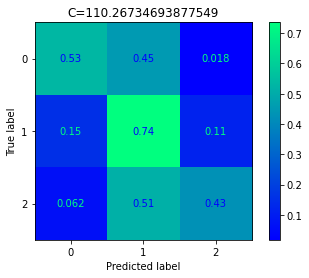

              precision    recall  f1-score   support

           0       0.56      0.74      0.64       446
           1       0.59      0.43      0.50       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13618420005412024

SVM - Poly, Train Accuracy = 0.6758550280755488, C=116.3877551020408
Test Accuracy = 0.6020408163265306


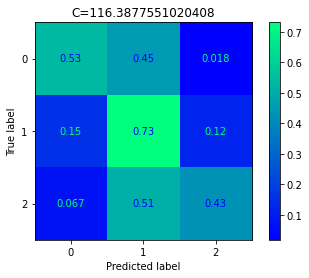

              precision    recall  f1-score   support

           0       0.56      0.73      0.64       446
           1       0.59      0.43      0.49       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12838450885822061

SVM - Poly, Train Accuracy = 0.6766207248596222, C=122.50816326530611
Test Accuracy = 0.5989795918367347


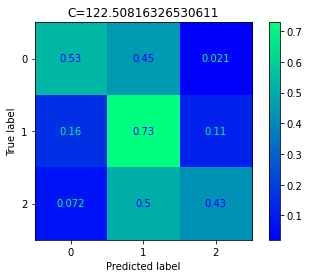

              precision    recall  f1-score   support

           0       0.56      0.73      0.64       446
           1       0.59      0.43      0.49       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.11083520366744659

SVM - Poly, Train Accuracy = 0.6763654925982644, C=128.6285714285714
Test Accuracy = 0.5969387755102041


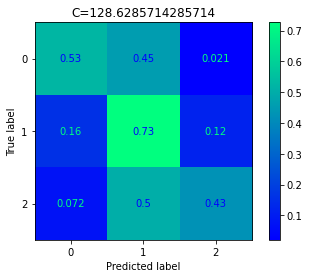

              precision    recall  f1-score   support

           0       0.56      0.73      0.63       446
           1       0.58      0.43      0.49       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.10693535806949672

SVM - Poly, Train Accuracy = 0.6773864216436958, C=134.74897959183673
Test Accuracy = 0.5948979591836735


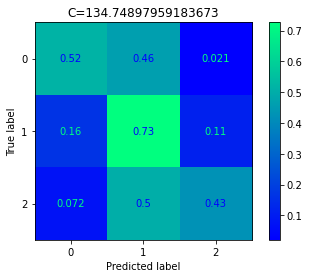

              precision    recall  f1-score   support

           0       0.56      0.73      0.63       446
           1       0.59      0.43      0.50       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.10303551247154696

SVM - Poly, Train Accuracy = 0.6778968861664114, C=140.86938775510203
Test Accuracy = 0.5948979591836735


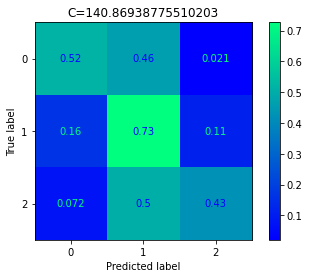

              precision    recall  f1-score   support

           0       0.56      0.73      0.63       446
           1       0.59      0.43      0.50       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.10303551247154696

SVM - Poly, Train Accuracy = 0.6768759571209801, C=146.98979591836732
Test Accuracy = 0.5948979591836735


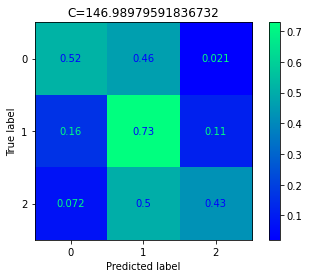

              precision    recall  f1-score   support

           0       0.56      0.73      0.63       446
           1       0.59      0.43      0.50       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.10303551247154696

SVM - Poly, Train Accuracy = 0.6778968861664114, C=153.11020408163265
Test Accuracy = 0.5938775510204082


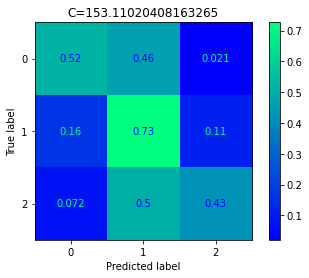

              precision    recall  f1-score   support

           0       0.56      0.73      0.63       446
           1       0.60      0.43      0.50       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.10108558967257208

SVM - Poly, Train Accuracy = 0.678662582950485, C=159.23061224489794
Test Accuracy = 0.5938775510204082


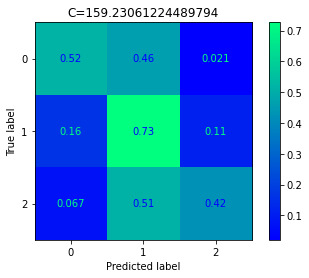

              precision    recall  f1-score   support

           0       0.56      0.73      0.63       446
           1       0.59      0.42      0.49       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.10693535806949672

SVM - Poly, Train Accuracy = 0.6791730474732006, C=165.35102040816324
Test Accuracy = 0.5928571428571429


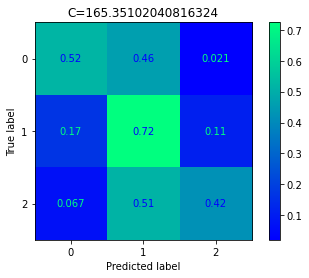

              precision    recall  f1-score   support

           0       0.56      0.72      0.63       446
           1       0.60      0.42      0.49       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.10498543527052184

SVM - Poly, Train Accuracy = 0.6809596733027055, C=171.47142857142856
Test Accuracy = 0.5908163265306122


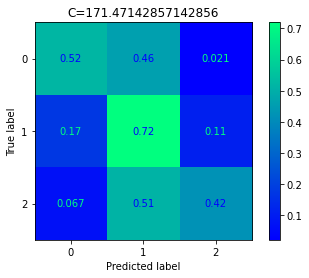

              precision    recall  f1-score   support

           0       0.56      0.72      0.63       446
           1       0.60      0.42      0.49       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.10108558967257208

SVM - Poly, Train Accuracy = 0.6796835119959163, C=177.59183673469386
Test Accuracy = 0.5908163265306122


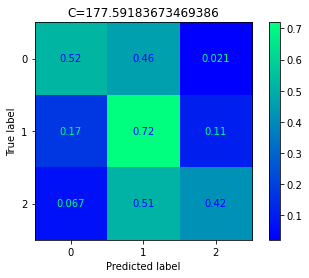

              precision    recall  f1-score   support

           0       0.56      0.72      0.63       446
           1       0.60      0.42      0.49       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.10108558967257208

SVM - Poly, Train Accuracy = 0.6794282797345584, C=183.71224489795915
Test Accuracy = 0.5908163265306122


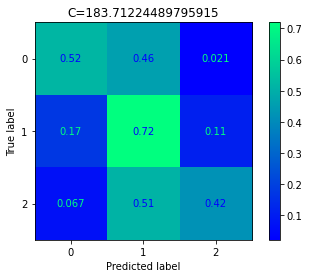

              precision    recall  f1-score   support

           0       0.56      0.72      0.63       446
           1       0.60      0.42      0.49       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.10108558967257208

SVM - Poly, Train Accuracy = 0.6804492087799898, C=189.83265306122448
Test Accuracy = 0.5908163265306122


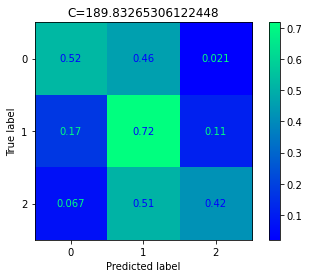

              precision    recall  f1-score   support

           0       0.56      0.72      0.63       446
           1       0.59      0.42      0.49       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.10108558967257208

SVM - Poly, Train Accuracy = 0.6819806023481368, C=195.95306122448977
Test Accuracy = 0.5938775510204082


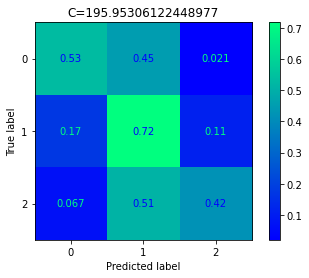

              precision    recall  f1-score   support

           0       0.56      0.72      0.63       446
           1       0.59      0.42      0.49       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.10693535806949672

SVM - Poly, Train Accuracy = 0.6819806023481368, C=202.07346938775507
Test Accuracy = 0.5948979591836735


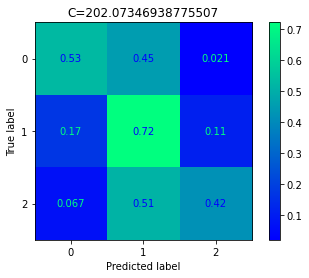

              precision    recall  f1-score   support

           0       0.56      0.72      0.63       446
           1       0.60      0.42      0.49       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1088852808684716

SVM - Poly, Train Accuracy = 0.6814701378254211, C=208.1938775510204
Test Accuracy = 0.5948979591836735


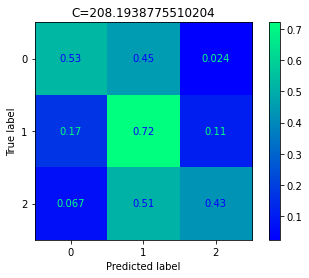

              precision    recall  f1-score   support

           0       0.56      0.72      0.63       446
           1       0.60      0.43      0.50       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.10303551247154696

SVM - Poly, Train Accuracy = 0.6824910668708525, C=214.3142857142857
Test Accuracy = 0.5959183673469388


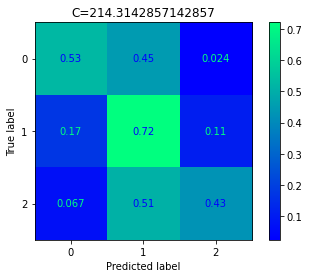

              precision    recall  f1-score   support

           0       0.56      0.72      0.63       446
           1       0.60      0.43      0.50       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.10498543527052184

SVM - Poly, Train Accuracy = 0.6822358346094947, C=220.43469387755098
Test Accuracy = 0.5959183673469388


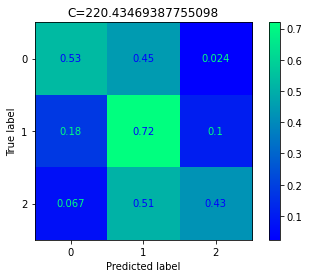

              precision    recall  f1-score   support

           0       0.56      0.72      0.63       446
           1       0.61      0.43      0.50       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.10498543527052184

SVM - Poly, Train Accuracy = 0.6832567636549259, C=226.5551020408163
Test Accuracy = 0.5959183673469388


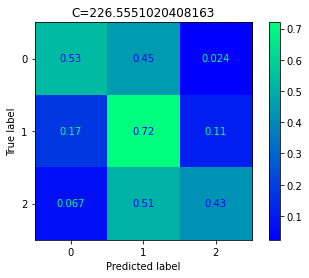

              precision    recall  f1-score   support

           0       0.56      0.72      0.63       446
           1       0.60      0.43      0.50       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.10498543527052184

SVM - Poly, Train Accuracy = 0.6830015313935681, C=232.6755102040816
Test Accuracy = 0.5969387755102041


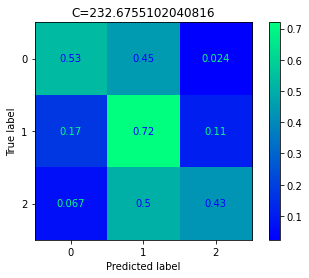

              precision    recall  f1-score   support

           0       0.56      0.72      0.63       446
           1       0.60      0.43      0.50       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.10693535806949672

SVM - Poly, Train Accuracy = 0.6832567636549259, C=238.7959183673469
Test Accuracy = 0.5969387755102041


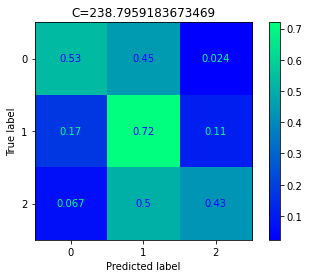

              precision    recall  f1-score   support

           0       0.56      0.72      0.63       446
           1       0.60      0.43      0.50       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.10693535806949672

SVM - Poly, Train Accuracy = 0.6835119959162839, C=244.91632653061222
Test Accuracy = 0.5969387755102041


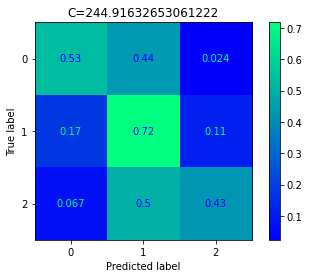

              precision    recall  f1-score   support

           0       0.56      0.72      0.63       446
           1       0.60      0.43      0.50       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.10693535806949672

SVM - Poly, Train Accuracy = 0.6835119959162839, C=251.03673469387752
Test Accuracy = 0.5959183673469388


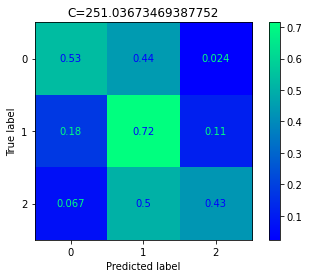

              precision    recall  f1-score   support

           0       0.56      0.72      0.63       446
           1       0.60      0.43      0.50       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.10498543527052184

SVM - Poly, Train Accuracy = 0.6842776927003573, C=257.15714285714284
Test Accuracy = 0.5948979591836735


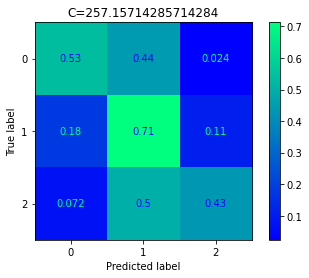

              precision    recall  f1-score   support

           0       0.56      0.71      0.63       446
           1       0.60      0.43      0.50       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09718574407462222

SVM - Poly, Train Accuracy = 0.6835119959162839, C=263.27755102040817
Test Accuracy = 0.5938775510204082


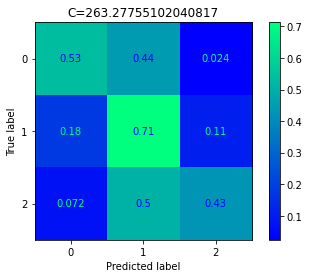

              precision    recall  f1-score   support

           0       0.56      0.71      0.63       446
           1       0.60      0.43      0.50       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09523582127564734

SVM - Poly, Train Accuracy = 0.6830015313935681, C=269.3979591836735
Test Accuracy = 0.5959183673469388


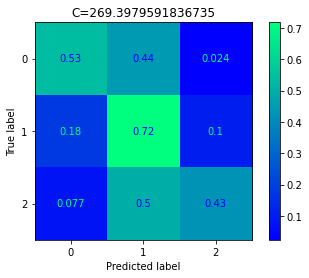

              precision    recall  f1-score   support

           0       0.56      0.72      0.63       446
           1       0.61      0.43      0.50       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09328589847667246

SVM - Poly, Train Accuracy = 0.6832567636549259, C=275.51836734693876
Test Accuracy = 0.5948979591836735


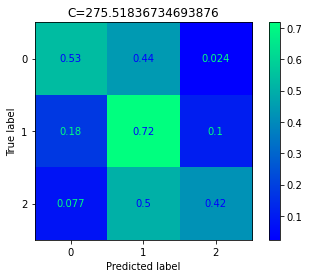

              precision    recall  f1-score   support

           0       0.56      0.72      0.63       446
           1       0.60      0.42      0.50       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09133597567769758

SVM - Poly, Train Accuracy = 0.6840224604389995, C=281.6387755102041
Test Accuracy = 0.5948979591836735


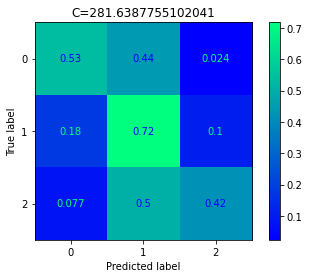

              precision    recall  f1-score   support

           0       0.56      0.72      0.63       446
           1       0.60      0.42      0.50       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09133597567769758

SVM - Poly, Train Accuracy = 0.6842776927003573, C=287.7591836734694
Test Accuracy = 0.5928571428571429


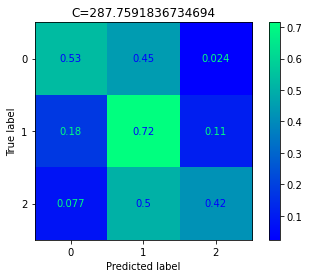

              precision    recall  f1-score   support

           0       0.56      0.72      0.63       446
           1       0.60      0.42      0.49       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.08743613007974782

SVM - Poly, Train Accuracy = 0.6842776927003573, C=293.8795918367347
Test Accuracy = 0.5938775510204082


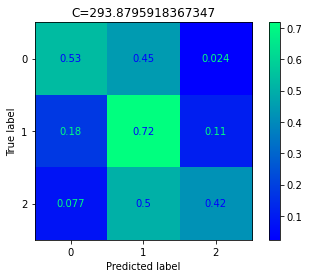

              precision    recall  f1-score   support

           0       0.56      0.72      0.63       446
           1       0.60      0.42      0.49       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0893860528787227

SVM - Poly, Train Accuracy = 0.6832567636549259, C=300.0
Test Accuracy = 0.5938775510204082


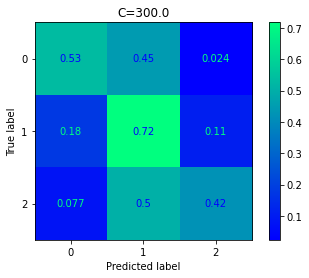

              precision    recall  f1-score   support

           0       0.56      0.72      0.63       446
           1       0.60      0.42      0.49       195
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0893860528787227



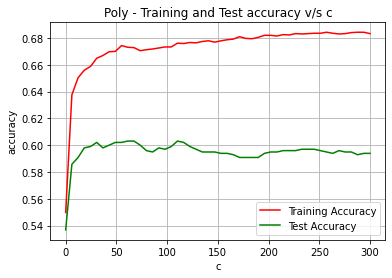

In [34]:
train_and_plot(X_train, y_train, X_test, y_test, c_svm_linear, c_svm_rbf, c_svm_poly)

# Train All Wines Data

In [35]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_all)

Original y hist: (array([   0,    0,    0,   30,  216, 2138, 2836, 1079,  198]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
Current y hist: (array([2384, 2836, 1277]), array([-1.5, -0.5,  0.5,  1.5]))
y min: -1.0, y max: 1.0
The shape of the wines dataset: (6497, 12)
y[:10]:
[-1.  1.  0.  0. -1.  1.  0.  0.  0.  1.]
X[:10, :]:
[[6.7000e+00 3.1000e-01 8.0000e-02 1.3000e+00 3.8000e-02 5.8000e+01
  1.4700e+02 9.9220e-01 3.1800e+00 4.6000e-01 1.0000e+01]
 [5.7000e+00 1.5000e-01 4.7000e-01 1.1400e+01 3.5000e-02 4.9000e+01
  1.2800e+02 9.9456e-01 3.0300e+00 3.4000e-01 1.0500e+01]
 [7.5000e+00 4.2000e-01 2.0000e-01 1.4000e+00 6.0000e-02 1.5000e+01
  1.6800e+02 9.9440e-01 3.0600e+00 4.0000e-01 9.4000e+00]
 [6.4000e+00 2.8000e-01 2.8000e-01 3.0000e+00 4.0000e-02 1.9000e+01
  9.8000e+01 9.9216e-01 3.2500e+00 4.7000e-01 1.1100e+01]
 [8.4000e+00 6.5000e-01 6.0000e-01 2.1000e+00 1.1200e-01 1.2000e+01
  9.0000e+01 9.9730e-01 3.2000e+00 5.2000e-01 9.2000e+00]
 [1.0500e+01 2.6000e-01 4.7000e-01 1.9000e+00

SVM - Linear, Train Accuracy = 0.5657109871079469, C=0.06
Test Accuracy = 0.5423076923076923


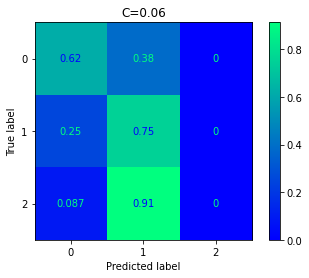

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5660958245141428, C=0.26285714285714284
Test Accuracy = 0.5423076923076923


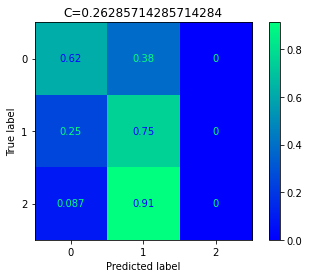

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5659034058110448, C=0.4657142857142857
Test Accuracy = 0.5423076923076923


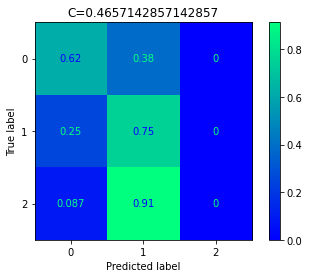

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5659034058110448, C=0.6685714285714286
Test Accuracy = 0.5415384615384615


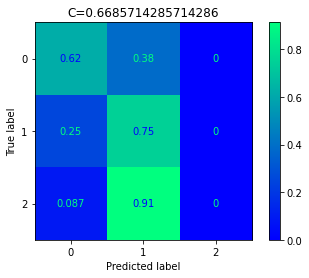

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07099545981659527

SVM - Linear, Train Accuracy = 0.5659034058110448, C=0.8714285714285714
Test Accuracy = 0.5415384615384615


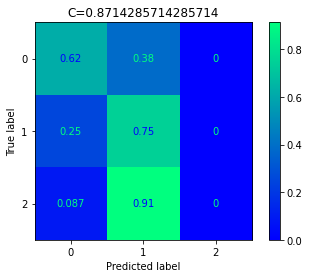

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07099545981659527

SVM - Linear, Train Accuracy = 0.5659034058110448, C=1.0742857142857143
Test Accuracy = 0.5415384615384615


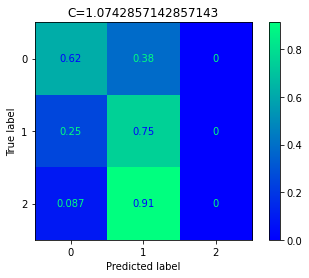

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07099545981659527

SVM - Linear, Train Accuracy = 0.5657109871079469, C=1.2771428571428571
Test Accuracy = 0.5423076923076923


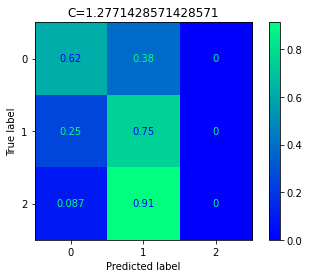

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.565326149701751, C=1.48
Test Accuracy = 0.5423076923076923


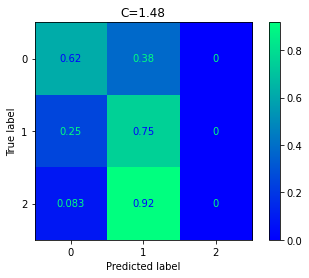

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0765583612548193

SVM - Linear, Train Accuracy = 0.565326149701751, C=1.6828571428571428
Test Accuracy = 0.5423076923076923


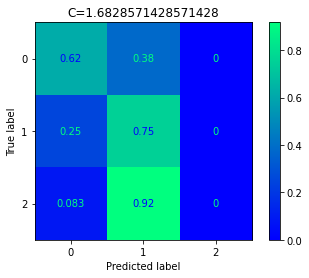

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0765583612548193

SVM - Linear, Train Accuracy = 0.565326149701751, C=1.8857142857142857
Test Accuracy = 0.5423076923076923


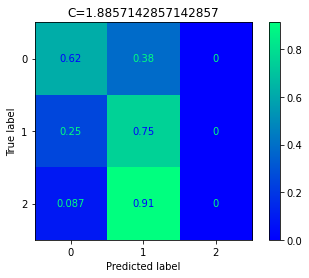

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5657109871079469, C=2.0885714285714285
Test Accuracy = 0.5423076923076923


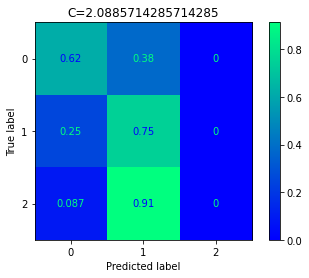

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5657109871079469, C=2.2914285714285714
Test Accuracy = 0.5423076923076923


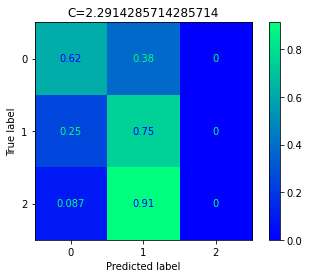

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.565133730998653, C=2.494285714285714
Test Accuracy = 0.5423076923076923


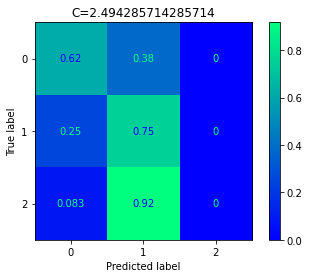

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0765583612548193

SVM - Linear, Train Accuracy = 0.565133730998653, C=2.697142857142857
Test Accuracy = 0.5423076923076923


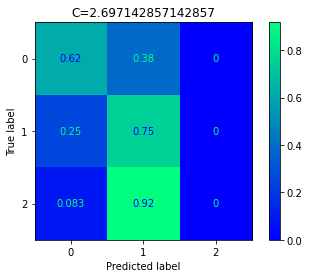

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0765583612548193

SVM - Linear, Train Accuracy = 0.5657109871079469, C=2.9
Test Accuracy = 0.5423076923076923


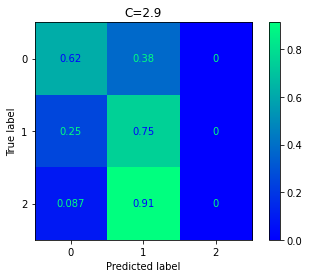

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5657109871079469, C=3.1028571428571428
Test Accuracy = 0.5423076923076923


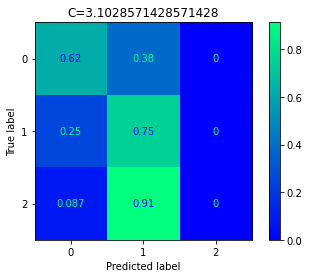

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5655185684048489, C=3.3057142857142856
Test Accuracy = 0.5423076923076923


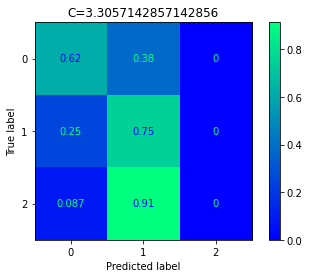

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5657109871079469, C=3.5085714285714285
Test Accuracy = 0.5423076923076923


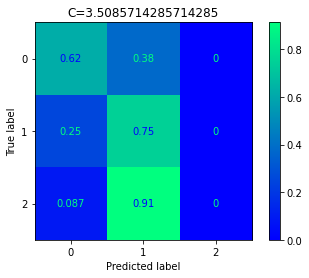

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.565326149701751, C=3.7114285714285713
Test Accuracy = 0.5423076923076923


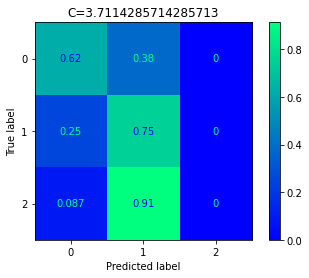

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5657109871079469, C=3.914285714285714
Test Accuracy = 0.5423076923076923


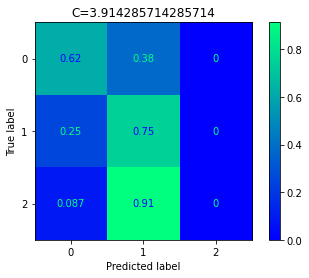

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5657109871079469, C=4.1171428571428565
Test Accuracy = 0.5423076923076923


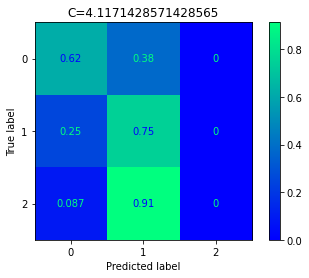

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5657109871079469, C=4.319999999999999
Test Accuracy = 0.5423076923076923


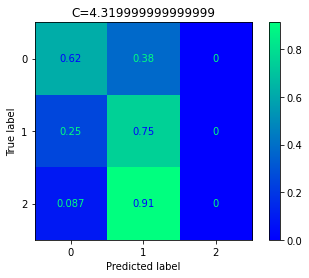

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5657109871079469, C=4.522857142857142
Test Accuracy = 0.5423076923076923


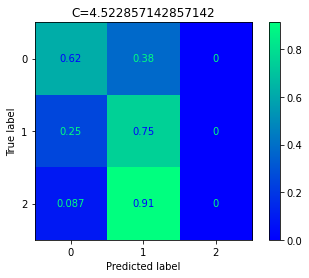

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5659034058110448, C=4.725714285714285
Test Accuracy = 0.5423076923076923


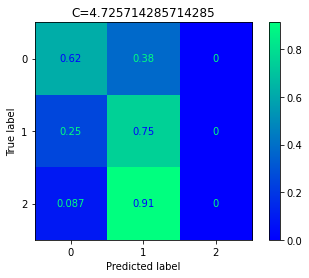

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5657109871079469, C=4.928571428571428
Test Accuracy = 0.5423076923076923


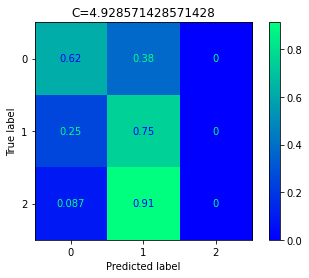

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5659034058110448, C=5.131428571428571
Test Accuracy = 0.5423076923076923


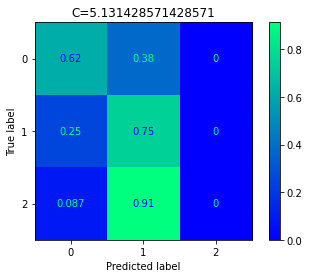

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5655185684048489, C=5.334285714285714
Test Accuracy = 0.5423076923076923


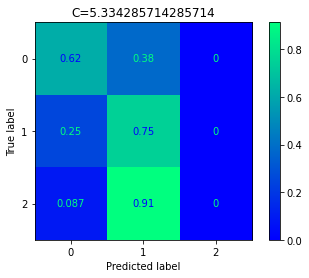

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5657109871079469, C=5.5371428571428565
Test Accuracy = 0.5423076923076923


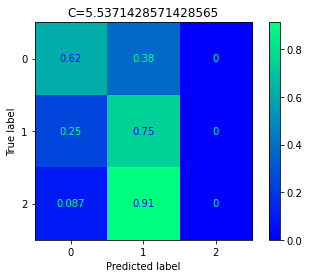

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5657109871079469, C=5.739999999999999
Test Accuracy = 0.5423076923076923


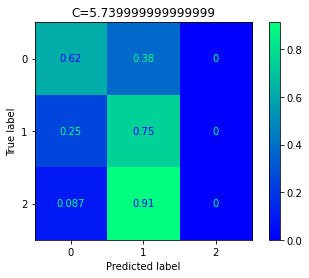

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5657109871079469, C=5.942857142857142
Test Accuracy = 0.5423076923076923


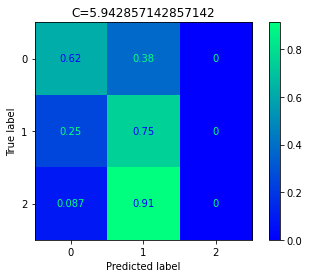

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5657109871079469, C=6.145714285714285
Test Accuracy = 0.5423076923076923


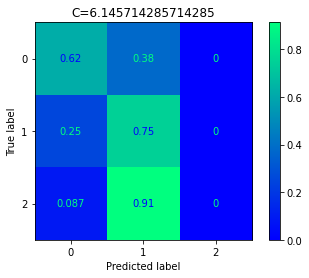

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5657109871079469, C=6.348571428571428
Test Accuracy = 0.5423076923076923


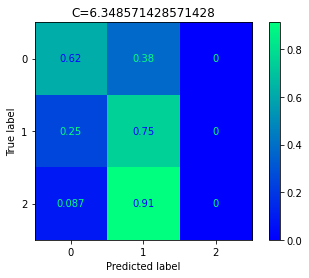

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5657109871079469, C=6.551428571428571
Test Accuracy = 0.5423076923076923


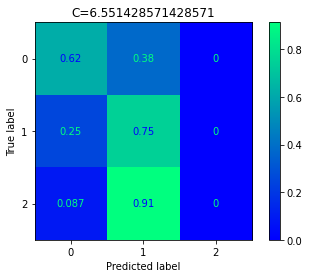

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5655185684048489, C=6.754285714285714
Test Accuracy = 0.5423076923076923


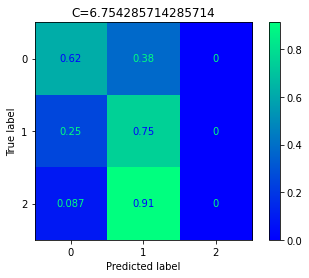

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5657109871079469, C=6.957142857142856
Test Accuracy = 0.5423076923076923


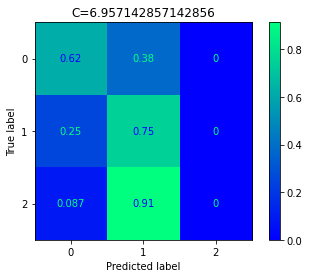

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5657109871079469, C=7.159999999999999
Test Accuracy = 0.5423076923076923


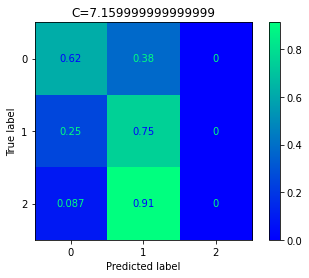

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5655185684048489, C=7.362857142857142
Test Accuracy = 0.5423076923076923


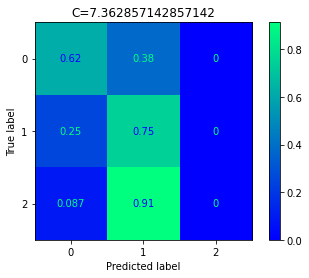

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5657109871079469, C=7.565714285714285
Test Accuracy = 0.5423076923076923


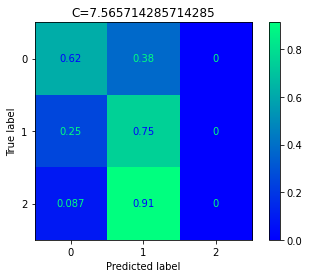

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5657109871079469, C=7.768571428571428
Test Accuracy = 0.5423076923076923


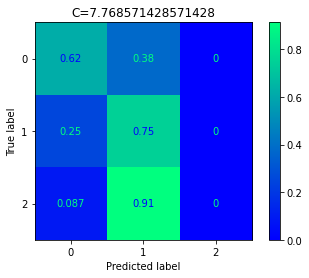

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5657109871079469, C=7.971428571428571
Test Accuracy = 0.5423076923076923


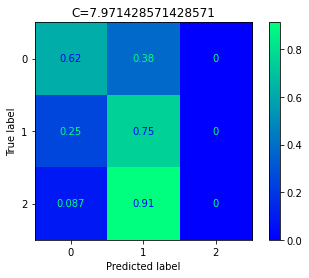

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5655185684048489, C=8.174285714285714
Test Accuracy = 0.5423076923076923


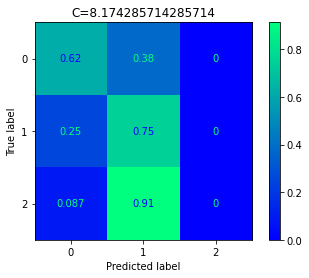

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5657109871079469, C=8.377142857142857
Test Accuracy = 0.5423076923076923


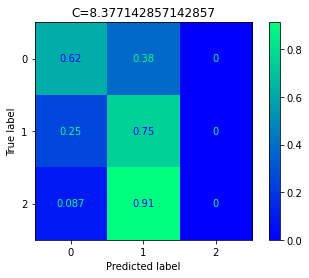

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5655185684048489, C=8.58
Test Accuracy = 0.5423076923076923


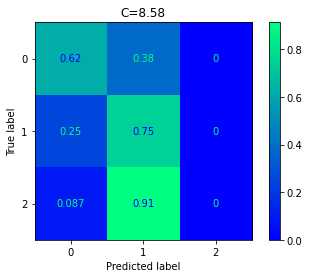

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5657109871079469, C=8.782857142857143
Test Accuracy = 0.5423076923076923


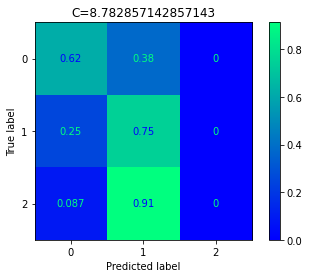

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5655185684048489, C=8.985714285714286
Test Accuracy = 0.5423076923076923


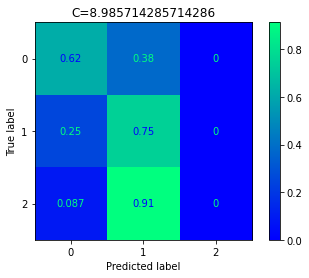

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.565326149701751, C=9.188571428571429
Test Accuracy = 0.5423076923076923


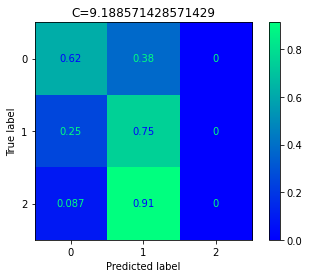

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5657109871079469, C=9.391428571428571
Test Accuracy = 0.5423076923076923


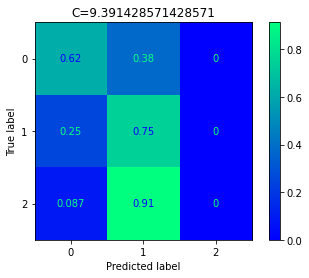

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5659034058110448, C=9.594285714285714
Test Accuracy = 0.5423076923076923


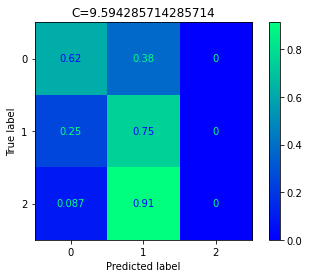

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5659034058110448, C=9.797142857142857
Test Accuracy = 0.5423076923076923


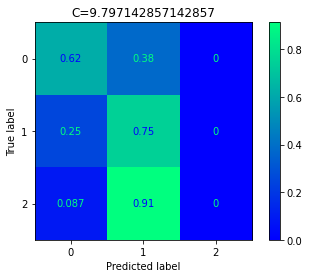

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136

SVM - Linear, Train Accuracy = 0.5657109871079469, C=10.0
Test Accuracy = 0.5423076923076923


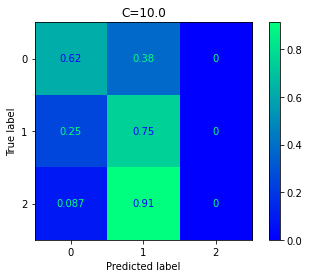

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       552
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07238618517615136



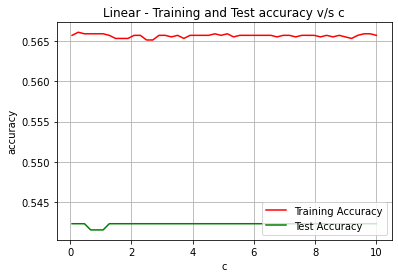

SVM - RBF, Train Accuracy = 0.6636521069847989, C=1.0
Test Accuracy = 0.5923076923076923


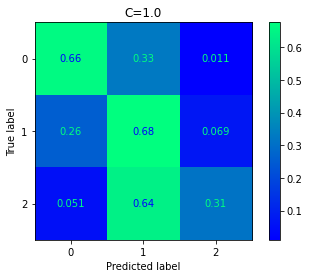

              precision    recall  f1-score   support

           0       0.53      0.68      0.59       552
           1       0.67      0.31      0.42       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1836442139406309

SVM - RBF, Train Accuracy = 0.719068693477006, C=7.1020408163265305
Test Accuracy = 0.6092307692307692


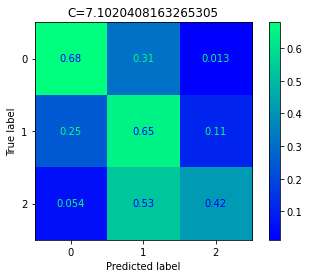

              precision    recall  f1-score   support

           0       0.55      0.65      0.59       552
           1       0.64      0.42      0.50       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.20589581969352688

SVM - RBF, Train Accuracy = 0.7392726573022897, C=13.204081632653061
Test Accuracy = 0.6138461538461538


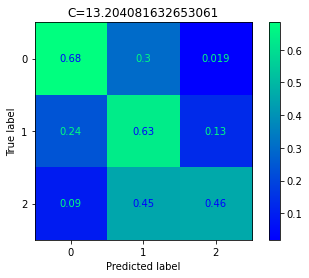

              precision    recall  f1-score   support

           0       0.57      0.63      0.60       552
           1       0.61      0.46      0.52       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.16000188282817895

SVM - RBF, Train Accuracy = 0.7548585722532231, C=19.306122448979593
Test Accuracy = 0.62


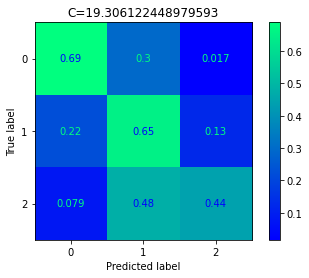

              precision    recall  f1-score   support

           0       0.57      0.65      0.61       552
           1       0.61      0.44      0.51       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18781639001929895

SVM - RBF, Train Accuracy = 0.7692899749855686, C=25.408163265306122
Test Accuracy = 0.6223076923076923


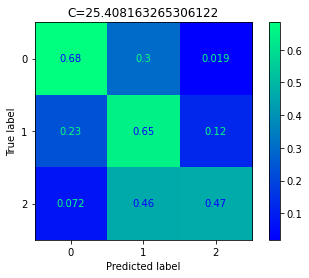

              precision    recall  f1-score   support

           0       0.57      0.65      0.61       552
           1       0.63      0.47      0.54       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19616074217663482

SVM - RBF, Train Accuracy = 0.7748701173754089, C=31.51020408163265
Test Accuracy = 0.6192307692307693


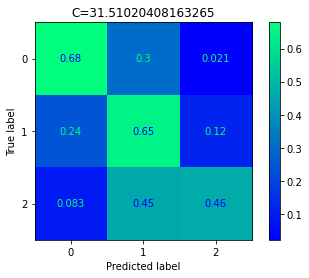

              precision    recall  f1-score   support

           0       0.57      0.65      0.61       552
           1       0.63      0.46      0.53       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.17390913642373895

SVM - RBF, Train Accuracy = 0.7833365403117183, C=37.61224489795919
Test Accuracy = 0.6207692307692307


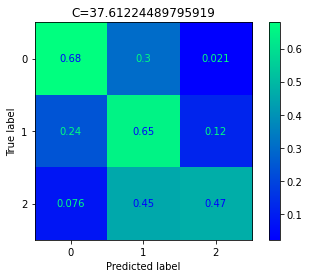

              precision    recall  f1-score   support

           0       0.57      0.65      0.61       552
           1       0.64      0.47      0.54       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18503493930018688

SVM - RBF, Train Accuracy = 0.790840869732538, C=43.714285714285715
Test Accuracy = 0.6192307692307693


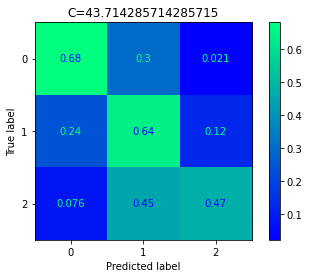

              precision    recall  f1-score   support

           0       0.57      0.64      0.60       552
           1       0.63      0.47      0.54       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18225348858107493

SVM - RBF, Train Accuracy = 0.7994997113719453, C=49.816326530612244
Test Accuracy = 0.6215384615384615


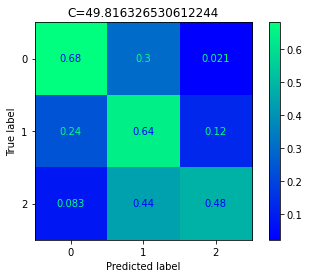

              precision    recall  f1-score   support

           0       0.58      0.64      0.61       552
           1       0.63      0.48      0.55       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.17808131250240689

SVM - RBF, Train Accuracy = 0.8048874350586877, C=55.91836734693877
Test Accuracy = 0.6223076923076923


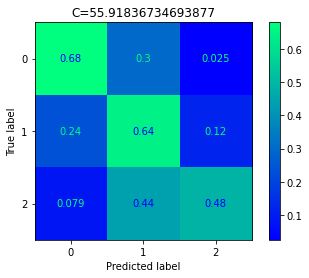

              precision    recall  f1-score   support

           0       0.58      0.64      0.61       552
           1       0.63      0.48      0.55       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.17529986178329493

SVM - RBF, Train Accuracy = 0.8096979026361363, C=62.0204081632653
Test Accuracy = 0.62


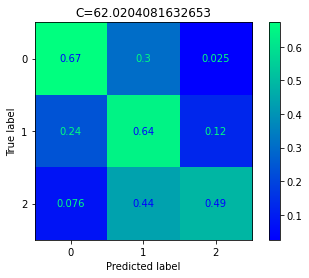

              precision    recall  f1-score   support

           0       0.57      0.64      0.61       552
           1       0.63      0.49      0.55       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.17529986178329493

SVM - RBF, Train Accuracy = 0.8135462766980951, C=68.12244897959184
Test Accuracy = 0.6215384615384615


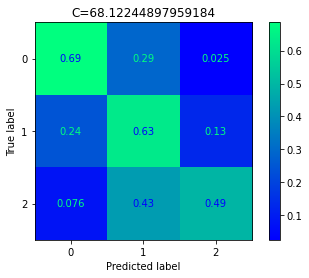

              precision    recall  f1-score   support

           0       0.58      0.63      0.60       552
           1       0.63      0.49      0.55       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.17808131250240689

SVM - RBF, Train Accuracy = 0.817009813353858, C=74.22448979591837
Test Accuracy = 0.6238461538461538


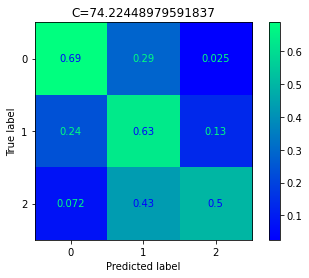

              precision    recall  f1-score   support

           0       0.58      0.63      0.60       552
           1       0.62      0.50      0.55       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18642566465974286

SVM - RBF, Train Accuracy = 0.820473350009621, C=80.3265306122449
Test Accuracy = 0.6284615384615385


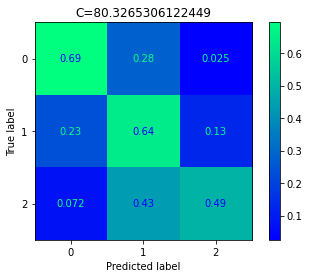

              precision    recall  f1-score   support

           0       0.58      0.64      0.61       552
           1       0.63      0.49      0.55       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19477001681707884

SVM - RBF, Train Accuracy = 0.8254762362901674, C=86.42857142857143
Test Accuracy = 0.6269230769230769


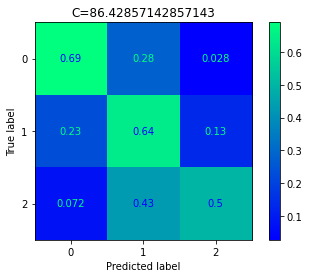

              precision    recall  f1-score   support

           0       0.58      0.64      0.61       552
           1       0.61      0.50      0.55       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18781639001929895

SVM - RBF, Train Accuracy = 0.8281700981335386, C=92.53061224489795
Test Accuracy = 0.6284615384615385


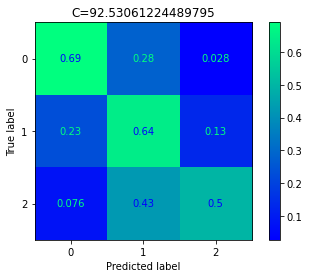

              precision    recall  f1-score   support

           0       0.59      0.64      0.61       552
           1       0.62      0.50      0.55       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18642566465974286

SVM - RBF, Train Accuracy = 0.8306715412738118, C=98.63265306122449
Test Accuracy = 0.6276923076923077


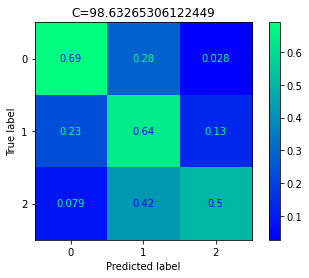

              precision    recall  f1-score   support

           0       0.59      0.64      0.61       552
           1       0.62      0.50      0.55       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18086276322151895

SVM - RBF, Train Accuracy = 0.8337502405233789, C=104.73469387755102
Test Accuracy = 0.6276923076923077


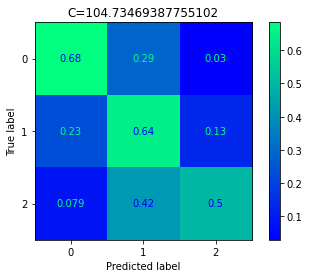

              precision    recall  f1-score   support

           0       0.59      0.64      0.61       552
           1       0.62      0.50      0.55       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1766905871428509

SVM - RBF, Train Accuracy = 0.83644410236675, C=110.83673469387755
Test Accuracy = 0.6284615384615385


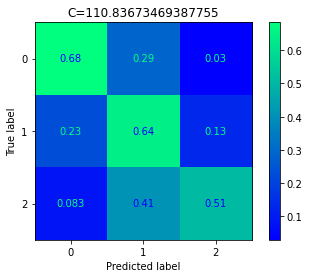

              precision    recall  f1-score   support

           0       0.59      0.64      0.61       552
           1       0.62      0.51      0.56       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.17390913642373895

SVM - RBF, Train Accuracy = 0.8372137771791418, C=116.93877551020408
Test Accuracy = 0.6307692307692307


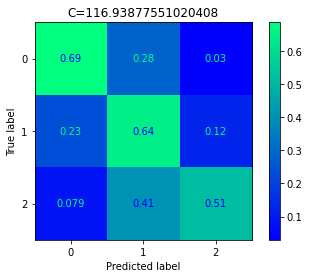

              precision    recall  f1-score   support

           0       0.59      0.64      0.62       552
           1       0.63      0.51      0.57       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18225348858107493

SVM - RBF, Train Accuracy = 0.8402924764287089, C=123.0408163265306
Test Accuracy = 0.63


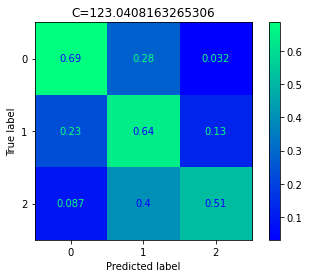

              precision    recall  f1-score   support

           0       0.59      0.64      0.62       552
           1       0.63      0.51      0.56       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.16834623498551493

SVM - RBF, Train Accuracy = 0.8424090821627862, C=129.14285714285714
Test Accuracy = 0.6276923076923077


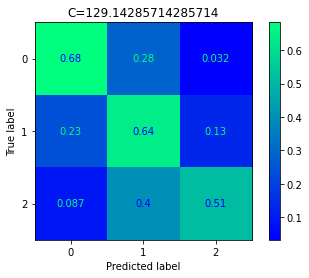

              precision    recall  f1-score   support

           0       0.59      0.64      0.61       552
           1       0.62      0.51      0.56       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.164174058906847

SVM - RBF, Train Accuracy = 0.8437560130844718, C=135.24489795918367
Test Accuracy = 0.6292307692307693


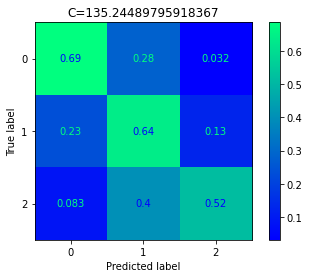

              precision    recall  f1-score   support

           0       0.59      0.64      0.61       552
           1       0.62      0.52      0.57       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.171127685704627

SVM - RBF, Train Accuracy = 0.8470271310371368, C=141.3469387755102
Test Accuracy = 0.63


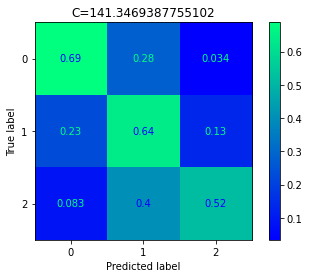

              precision    recall  f1-score   support

           0       0.59      0.64      0.61       552
           1       0.62      0.52      0.56       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.16834623498551493

SVM - RBF, Train Accuracy = 0.8491437367712141, C=147.44897959183675
Test Accuracy = 0.6323076923076923


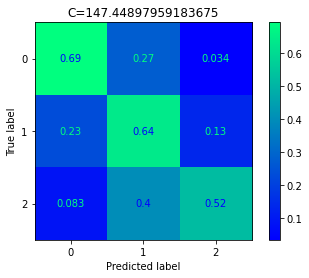

              precision    recall  f1-score   support

           0       0.60      0.64      0.62       552
           1       0.62      0.52      0.56       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.17251841106418297

SVM - RBF, Train Accuracy = 0.8506830863959977, C=153.55102040816325
Test Accuracy = 0.6323076923076923


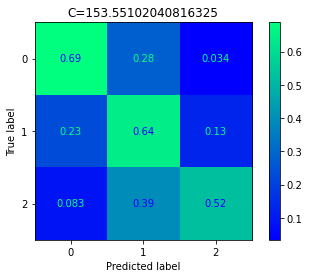

              precision    recall  f1-score   support

           0       0.60      0.64      0.62       552
           1       0.62      0.52      0.57       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.17251841106418297

SVM - RBF, Train Accuracy = 0.852799692130075, C=159.6530612244898
Test Accuracy = 0.6292307692307693


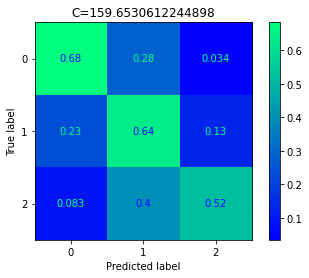

              precision    recall  f1-score   support

           0       0.59      0.64      0.61       552
           1       0.62      0.52      0.57       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.16695550962595895

SVM - RBF, Train Accuracy = 0.8543390417548585, C=165.75510204081633
Test Accuracy = 0.6323076923076923


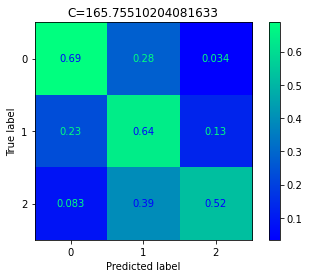

              precision    recall  f1-score   support

           0       0.60      0.64      0.62       552
           1       0.62      0.52      0.57       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.17251841106418297

SVM - RBF, Train Accuracy = 0.8574177410044256, C=171.85714285714286
Test Accuracy = 0.6323076923076923


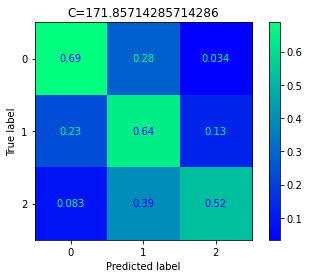

              precision    recall  f1-score   support

           0       0.60      0.64      0.62       552
           1       0.62      0.52      0.57       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.17251841106418297

SVM - RBF, Train Accuracy = 0.859149509332307, C=177.9591836734694
Test Accuracy = 0.6307692307692307


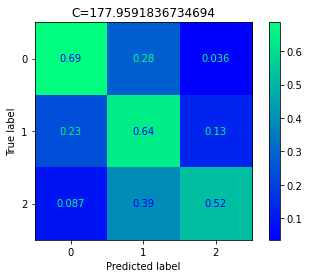

              precision    recall  f1-score   support

           0       0.60      0.64      0.62       552
           1       0.62      0.52      0.57       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.16139260818773504

SVM - RBF, Train Accuracy = 0.8608812776601885, C=184.0612244897959
Test Accuracy = 0.6284615384615385


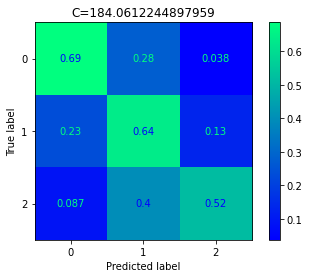

              precision    recall  f1-score   support

           0       0.59      0.64      0.61       552
           1       0.61      0.52      0.56       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15304825603039907

SVM - RBF, Train Accuracy = 0.862805464691168, C=190.16326530612244
Test Accuracy = 0.6284615384615385


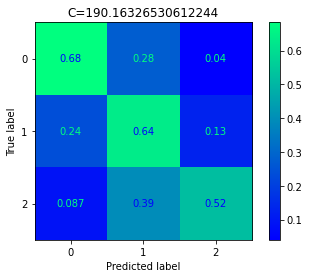

              precision    recall  f1-score   support

           0       0.59      0.64      0.61       552
           1       0.62      0.52      0.56       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14887607995173102

SVM - RBF, Train Accuracy = 0.8637675582066577, C=196.26530612244898
Test Accuracy = 0.6292307692307693


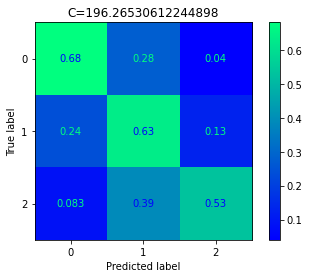

              precision    recall  f1-score   support

           0       0.60      0.63      0.61       552
           1       0.62      0.53      0.57       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15443898138995504

SVM - RBF, Train Accuracy = 0.8647296517221474, C=202.3673469387755
Test Accuracy = 0.6276923076923077


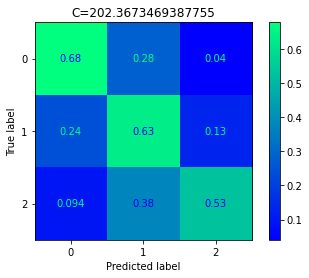

              precision    recall  f1-score   support

           0       0.60      0.63      0.61       552
           1       0.62      0.53      0.57       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13914100243483907

SVM - RBF, Train Accuracy = 0.8658841639407351, C=208.46938775510205
Test Accuracy = 0.6276923076923077


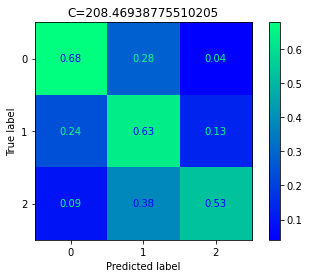

              precision    recall  f1-score   support

           0       0.60      0.63      0.61       552
           1       0.62      0.53      0.57       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1433131785135071

SVM - RBF, Train Accuracy = 0.8672310948624207, C=214.57142857142856
Test Accuracy = 0.6269230769230769


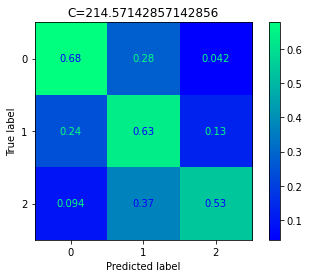

              precision    recall  f1-score   support

           0       0.60      0.63      0.61       552
           1       0.62      0.53      0.57       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13357810099661505

SVM - RBF, Train Accuracy = 0.8687704444872042, C=220.6734693877551
Test Accuracy = 0.6276923076923077


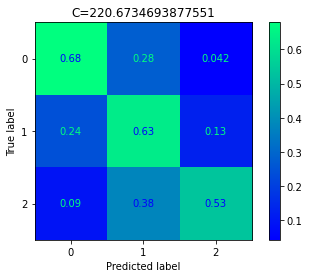

              precision    recall  f1-score   support

           0       0.60      0.63      0.61       552
           1       0.62      0.53      0.57       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13914100243483907

SVM - RBF, Train Accuracy = 0.8691552818934001, C=226.77551020408163
Test Accuracy = 0.6284615384615385


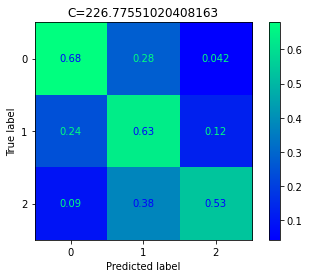

              precision    recall  f1-score   support

           0       0.60      0.63      0.61       552
           1       0.62      0.53      0.58       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14053172779439504

SVM - RBF, Train Accuracy = 0.8703097941119877, C=232.87755102040816
Test Accuracy = 0.6292307692307693


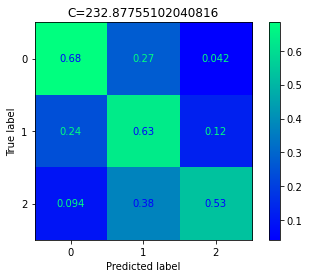

              precision    recall  f1-score   support

           0       0.60      0.63      0.62       552
           1       0.62      0.53      0.57       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1377502770752831

SVM - RBF, Train Accuracy = 0.8720415624398692, C=238.9795918367347
Test Accuracy = 0.6307692307692307


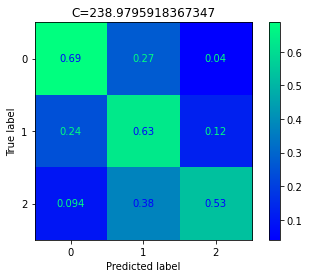

              precision    recall  f1-score   support

           0       0.60      0.63      0.62       552
           1       0.63      0.53      0.58       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1447039038730631

SVM - RBF, Train Accuracy = 0.8730036559553589, C=245.0816326530612
Test Accuracy = 0.6315384615384615


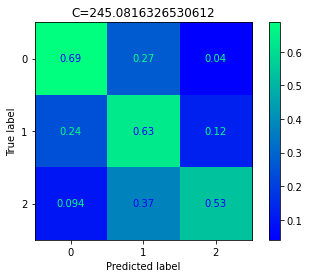

              precision    recall  f1-score   support

           0       0.60      0.63      0.62       552
           1       0.63      0.53      0.58       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14609462923261907

SVM - RBF, Train Accuracy = 0.8745430055801424, C=251.18367346938774
Test Accuracy = 0.63


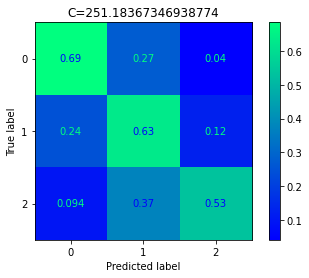

              precision    recall  f1-score   support

           0       0.60      0.63      0.61       552
           1       0.63      0.53      0.58       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1433131785135071

SVM - RBF, Train Accuracy = 0.8756975177987301, C=257.2857142857143
Test Accuracy = 0.6292307692307693


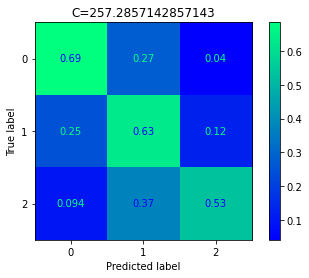

              precision    recall  f1-score   support

           0       0.60      0.63      0.61       552
           1       0.63      0.53      0.58       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14192245315395102

SVM - RBF, Train Accuracy = 0.8772368674235136, C=263.3877551020408
Test Accuracy = 0.6284615384615385


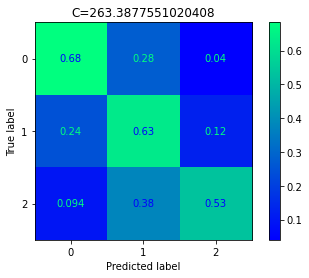

              precision    recall  f1-score   support

           0       0.60      0.63      0.61       552
           1       0.63      0.53      0.57       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14053172779439504

SVM - RBF, Train Accuracy = 0.8781989609390033, C=269.48979591836735
Test Accuracy = 0.6284615384615385


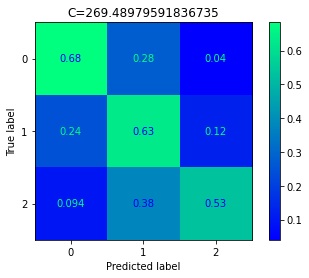

              precision    recall  f1-score   support

           0       0.60      0.63      0.61       552
           1       0.63      0.53      0.57       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14053172779439504

SVM - RBF, Train Accuracy = 0.8799307292668848, C=275.59183673469386
Test Accuracy = 0.63


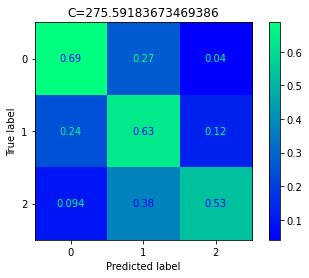

              precision    recall  f1-score   support

           0       0.60      0.63      0.61       552
           1       0.63      0.53      0.57       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1433131785135071

SVM - RBF, Train Accuracy = 0.8816624975947662, C=281.6938775510204
Test Accuracy = 0.6315384615384615


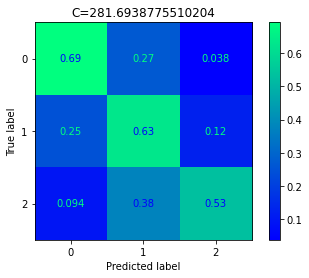

              precision    recall  f1-score   support

           0       0.60      0.63      0.62       552
           1       0.63      0.53      0.58       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.150266805311287

SVM - RBF, Train Accuracy = 0.882432172407158, C=287.7959183673469
Test Accuracy = 0.6315384615384615


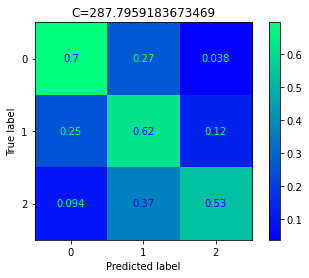

              precision    recall  f1-score   support

           0       0.60      0.62      0.61       552
           1       0.63      0.53      0.58       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.150266805311287

SVM - RBF, Train Accuracy = 0.8826245911102559, C=293.8979591836735
Test Accuracy = 0.6307692307692307


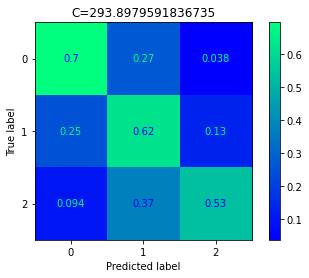

              precision    recall  f1-score   support

           0       0.60      0.62      0.61       552
           1       0.63      0.53      0.58       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14887607995173102

SVM - RBF, Train Accuracy = 0.8830094285164518, C=300.0
Test Accuracy = 0.6315384615384615


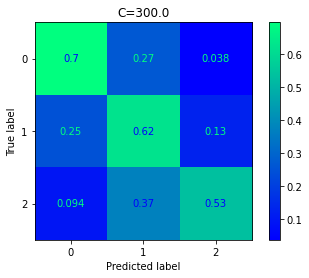

              precision    recall  f1-score   support

           0       0.60      0.62      0.61       552
           1       0.63      0.53      0.58       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.150266805311287



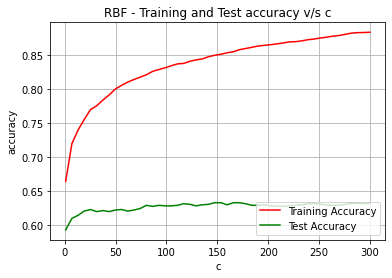

SVM - Poly, Train Accuracy = 0.5535886088127766, C=0.1
Test Accuracy = 0.5146153846153846


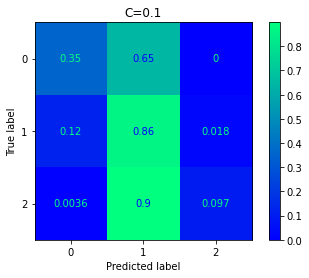

              precision    recall  f1-score   support

           0       0.46      0.86      0.60       552
           1       0.73      0.10      0.17       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.11828012204149918

SVM - Poly, Train Accuracy = 0.6442178179719069, C=6.220408163265305
Test Accuracy = 0.5676923076923077


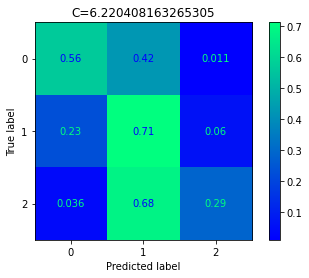

              precision    recall  f1-score   support

           0       0.50      0.71      0.59       552
           1       0.68      0.29      0.40       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15582970674951102

SVM - Poly, Train Accuracy = 0.653646334423706, C=12.34081632653061
Test Accuracy = 0.5746153846153846


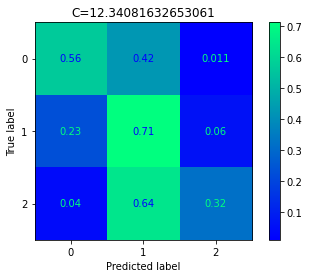

              precision    recall  f1-score   support

           0       0.51      0.71      0.59       552
           1       0.70      0.32      0.44       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.164174058906847

SVM - Poly, Train Accuracy = 0.6555705214546854, C=18.461224489795917
Test Accuracy = 0.5746153846153846


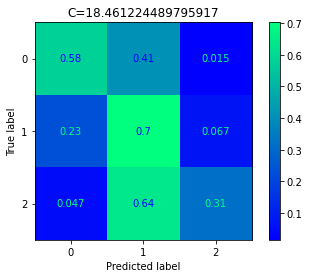

              precision    recall  f1-score   support

           0       0.51      0.70      0.59       552
           1       0.66      0.31      0.43       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14748535459217504

SVM - Poly, Train Accuracy = 0.6594188955166442, C=24.581632653061224
Test Accuracy = 0.573076923076923


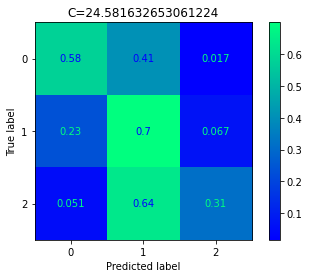

              precision    recall  f1-score   support

           0       0.51      0.70      0.59       552
           1       0.66      0.31      0.43       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1363595517157271

SVM - Poly, Train Accuracy = 0.6615355012507216, C=30.70204081632653
Test Accuracy = 0.5723076923076923


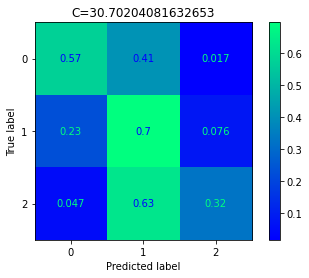

              precision    recall  f1-score   support

           0       0.51      0.70      0.59       552
           1       0.64      0.32      0.43       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13914100243483907

SVM - Poly, Train Accuracy = 0.663267269578603, C=36.82244897959183
Test Accuracy = 0.5676923076923077


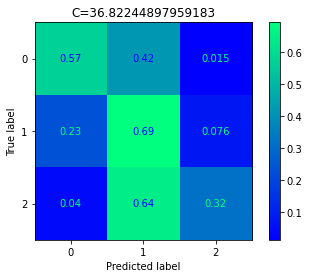

              precision    recall  f1-score   support

           0       0.51      0.69      0.58       552
           1       0.64      0.32      0.43       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1433131785135071

SVM - Poly, Train Accuracy = 0.6644217817971907, C=42.94285714285714
Test Accuracy = 0.5653846153846154


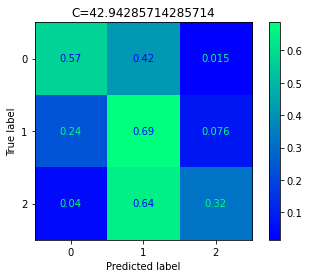

              precision    recall  f1-score   support

           0       0.50      0.69      0.58       552
           1       0.64      0.32      0.43       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13914100243483907

SVM - Poly, Train Accuracy = 0.663267269578603, C=49.063265306122446
Test Accuracy = 0.5692307692307692


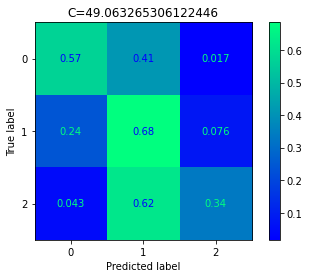

              precision    recall  f1-score   support

           0       0.51      0.68      0.58       552
           1       0.65      0.34      0.44       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1377502770752831

SVM - Poly, Train Accuracy = 0.6653838753126804, C=55.18367346938775
Test Accuracy = 0.5692307692307692


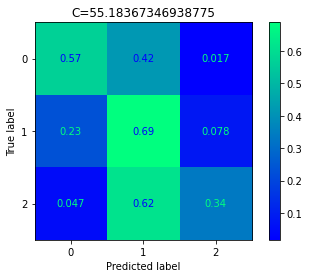

              precision    recall  f1-score   support

           0       0.51      0.69      0.59       552
           1       0.65      0.34      0.44       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13357810099661505

SVM - Poly, Train Accuracy = 0.6661535501250722, C=61.30408163265306
Test Accuracy = 0.57


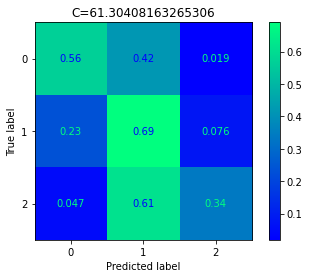

              precision    recall  f1-score   support

           0       0.51      0.69      0.59       552
           1       0.65      0.34      0.45       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1307966502775031

SVM - Poly, Train Accuracy = 0.6678853184529536, C=67.42448979591836
Test Accuracy = 0.5692307692307692


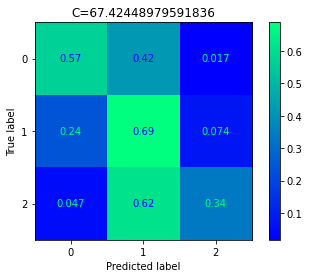

              precision    recall  f1-score   support

           0       0.51      0.69      0.59       552
           1       0.65      0.34      0.44       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13357810099661505

SVM - Poly, Train Accuracy = 0.6676928997498557, C=73.54489795918366
Test Accuracy = 0.5661538461538461


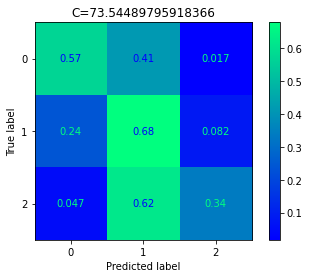

              precision    recall  f1-score   support

           0       0.51      0.68      0.58       552
           1       0.64      0.34      0.44       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12801519955839114

SVM - Poly, Train Accuracy = 0.6694246680777372, C=79.66530612244897
Test Accuracy = 0.5676923076923077


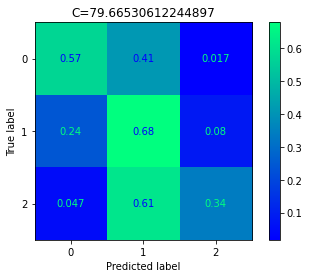

              precision    recall  f1-score   support

           0       0.51      0.68      0.58       552
           1       0.64      0.34      0.44       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1307966502775031

SVM - Poly, Train Accuracy = 0.6707715989994227, C=85.78571428571428
Test Accuracy = 0.5692307692307692


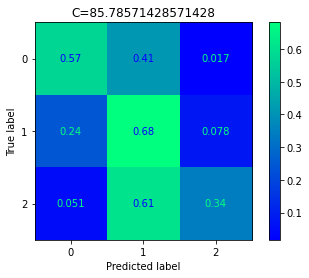

              precision    recall  f1-score   support

           0       0.51      0.68      0.58       552
           1       0.65      0.34      0.45       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1294059249179471

SVM - Poly, Train Accuracy = 0.6705791802963248, C=91.90612244897957
Test Accuracy = 0.5707692307692308


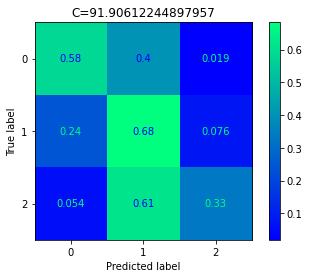

              precision    recall  f1-score   support

           0       0.51      0.68      0.59       552
           1       0.64      0.33      0.44       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12384302347972309

SVM - Poly, Train Accuracy = 0.6707715989994227, C=98.02653061224488
Test Accuracy = 0.57


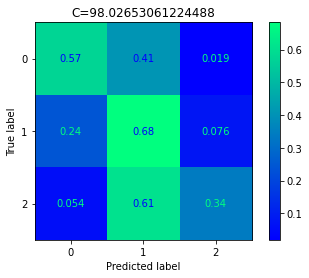

              precision    recall  f1-score   support

           0       0.51      0.68      0.58       552
           1       0.65      0.34      0.45       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12245229812016711

SVM - Poly, Train Accuracy = 0.6701943428901289, C=104.1469387755102
Test Accuracy = 0.5738461538461539


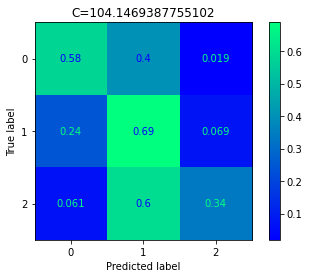

              precision    recall  f1-score   support

           0       0.52      0.69      0.59       552
           1       0.67      0.34      0.45       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12106157276061114

SVM - Poly, Train Accuracy = 0.6713488551087166, C=110.26734693877549
Test Accuracy = 0.573076923076923


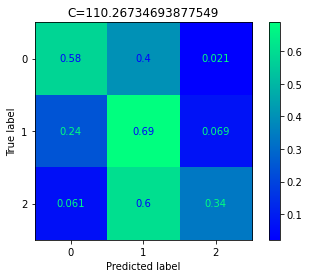

              precision    recall  f1-score   support

           0       0.52      0.69      0.59       552
           1       0.66      0.34      0.44       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.11549867132238711

SVM - Poly, Train Accuracy = 0.6717336925149124, C=116.3877551020408
Test Accuracy = 0.5738461538461539


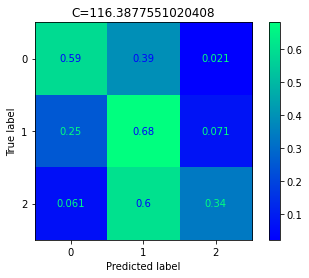

              precision    recall  f1-score   support

           0       0.52      0.68      0.59       552
           1       0.65      0.34      0.44       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1168893966819432

SVM - Poly, Train Accuracy = 0.6705791802963248, C=122.50816326530611
Test Accuracy = 0.5738461538461539


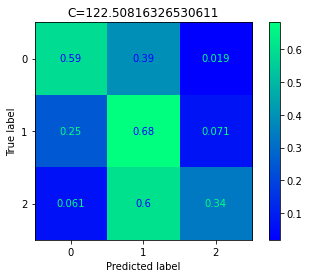

              precision    recall  f1-score   support

           0       0.52      0.68      0.59       552
           1       0.66      0.34      0.44       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12106157276061114

SVM - Poly, Train Accuracy = 0.6719261112180104, C=128.6285714285714
Test Accuracy = 0.5738461538461539


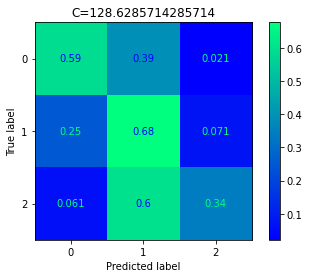

              precision    recall  f1-score   support

           0       0.52      0.68      0.59       552
           1       0.66      0.34      0.45       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1168893966819432

SVM - Poly, Train Accuracy = 0.6715412738118145, C=134.74897959183673
Test Accuracy = 0.5738461538461539


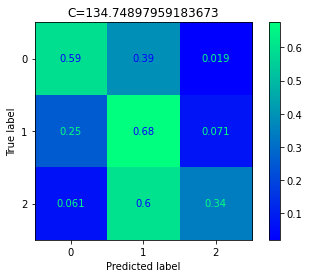

              precision    recall  f1-score   support

           0       0.52      0.68      0.59       552
           1       0.66      0.34      0.45       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12106157276061114

SVM - Poly, Train Accuracy = 0.6734654608427939, C=140.86938775510203
Test Accuracy = 0.5746153846153846


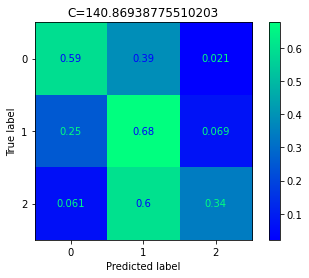

              precision    recall  f1-score   support

           0       0.52      0.68      0.59       552
           1       0.66      0.34      0.45       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.11828012204149918

SVM - Poly, Train Accuracy = 0.6734654608427939, C=146.98979591836732
Test Accuracy = 0.5746153846153846


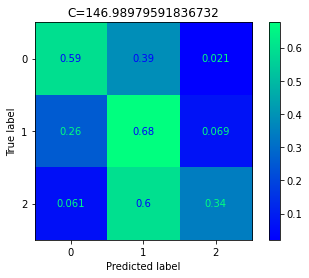

              precision    recall  f1-score   support

           0       0.52      0.68      0.59       552
           1       0.66      0.34      0.45       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.11828012204149918

SVM - Poly, Train Accuracy = 0.6746199730613816, C=153.11020408163265
Test Accuracy = 0.5738461538461539


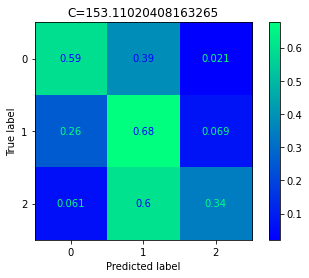

              precision    recall  f1-score   support

           0       0.52      0.68      0.59       552
           1       0.66      0.34      0.45       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1168893966819432

SVM - Poly, Train Accuracy = 0.6751972291706754, C=159.23061224489794
Test Accuracy = 0.5753846153846154


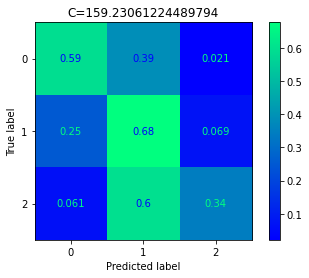

              precision    recall  f1-score   support

           0       0.52      0.68      0.59       552
           1       0.66      0.34      0.45       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.11967084740105516

SVM - Poly, Train Accuracy = 0.6753896478737733, C=165.35102040816324
Test Accuracy = 0.5753846153846154


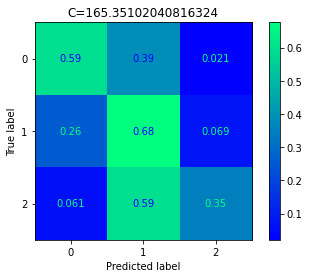

              precision    recall  f1-score   support

           0       0.52      0.68      0.59       552
           1       0.67      0.35      0.46       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.11967084740105516

SVM - Poly, Train Accuracy = 0.6757744852799692, C=171.47142857142856
Test Accuracy = 0.5761538461538461


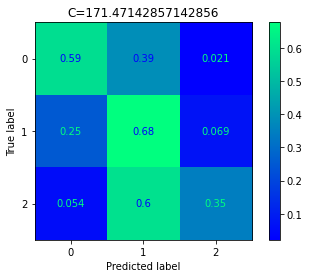

              precision    recall  f1-score   support

           0       0.52      0.68      0.59       552
           1       0.67      0.35      0.46       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1294059249179471

SVM - Poly, Train Accuracy = 0.6757744852799692, C=177.59183673469386
Test Accuracy = 0.5753846153846154


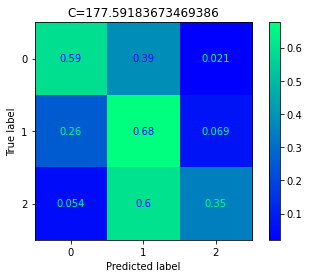

              precision    recall  f1-score   support

           0       0.52      0.68      0.59       552
           1       0.67      0.35      0.46       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12801519955839114

SVM - Poly, Train Accuracy = 0.6759669039830671, C=183.71224489795915
Test Accuracy = 0.5769230769230769


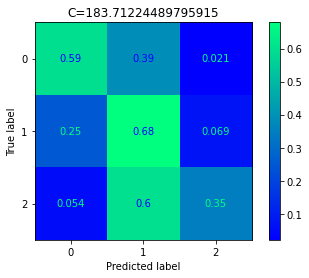

              precision    recall  f1-score   support

           0       0.52      0.68      0.59       552
           1       0.67      0.35      0.46       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1307966502775031

SVM - Poly, Train Accuracy = 0.6771214162016548, C=189.83265306122448
Test Accuracy = 0.5776923076923077


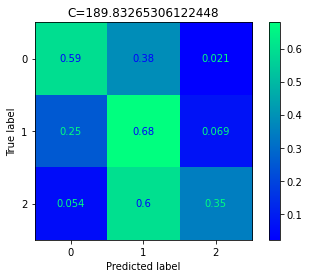

              precision    recall  f1-score   support

           0       0.52      0.68      0.59       552
           1       0.67      0.35      0.46       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13218737563705907

SVM - Poly, Train Accuracy = 0.6773138349047527, C=195.95306122448977
Test Accuracy = 0.5776923076923077


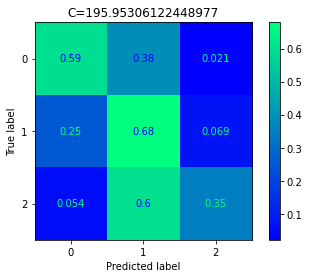

              precision    recall  f1-score   support

           0       0.52      0.68      0.59       552
           1       0.67      0.35      0.46       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13218737563705907

SVM - Poly, Train Accuracy = 0.6782759284202424, C=202.07346938775507
Test Accuracy = 0.5784615384615385


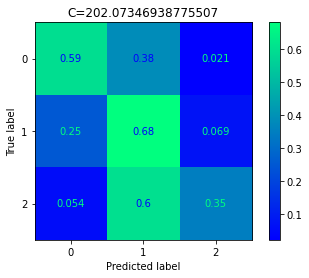

              precision    recall  f1-score   support

           0       0.52      0.68      0.59       552
           1       0.67      0.35      0.46       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13357810099661505

SVM - Poly, Train Accuracy = 0.6792380219357321, C=208.1938775510204
Test Accuracy = 0.5784615384615385


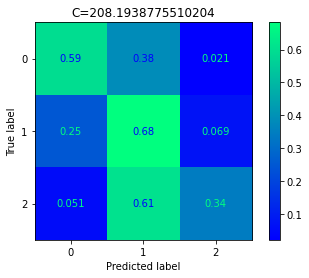

              precision    recall  f1-score   support

           0       0.52      0.68      0.59       552
           1       0.66      0.34      0.45       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1377502770752831

SVM - Poly, Train Accuracy = 0.6786607658264383, C=214.3142857142857
Test Accuracy = 0.5784615384615385


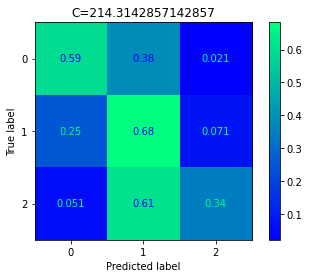

              precision    recall  f1-score   support

           0       0.52      0.68      0.59       552
           1       0.66      0.34      0.45       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1377502770752831

SVM - Poly, Train Accuracy = 0.6782759284202424, C=220.43469387755098
Test Accuracy = 0.5784615384615385


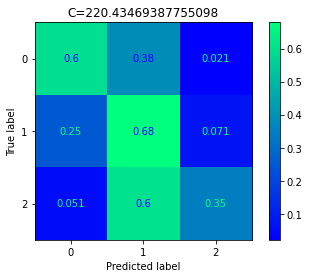

              precision    recall  f1-score   support

           0       0.52      0.68      0.59       552
           1       0.66      0.35      0.45       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1377502770752831

SVM - Poly, Train Accuracy = 0.6784683471233404, C=226.5551020408163
Test Accuracy = 0.5776923076923077


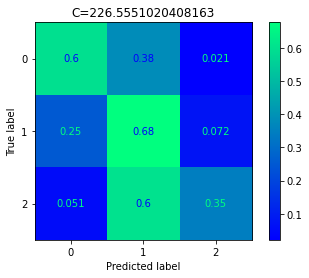

              precision    recall  f1-score   support

           0       0.52      0.68      0.59       552
           1       0.66      0.35      0.45       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1363595517157271

SVM - Poly, Train Accuracy = 0.6780835097171445, C=232.6755102040816
Test Accuracy = 0.5769230769230769


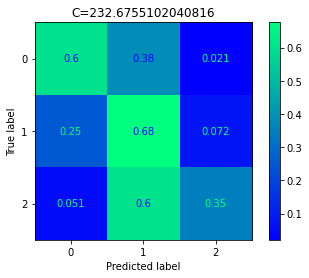

              precision    recall  f1-score   support

           0       0.52      0.68      0.59       552
           1       0.66      0.35      0.45       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13496882635617113

SVM - Poly, Train Accuracy = 0.6790456032326342, C=238.7959183673469
Test Accuracy = 0.5769230769230769


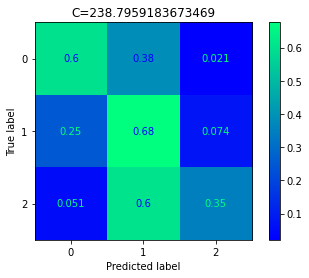

              precision    recall  f1-score   support

           0       0.52      0.68      0.59       552
           1       0.65      0.35      0.45       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13496882635617113

SVM - Poly, Train Accuracy = 0.6792380219357321, C=244.91632653061222
Test Accuracy = 0.5769230769230769


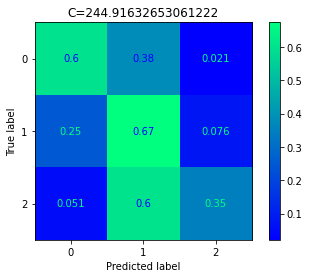

              precision    recall  f1-score   support

           0       0.52      0.67      0.59       552
           1       0.65      0.35      0.45       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13496882635617113

SVM - Poly, Train Accuracy = 0.6790456032326342, C=251.03673469387752
Test Accuracy = 0.5761538461538461


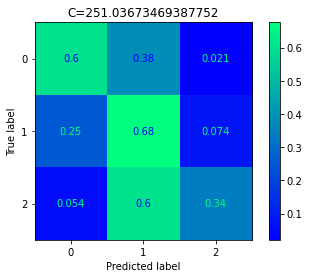

              precision    recall  f1-score   support

           0       0.52      0.68      0.59       552
           1       0.65      0.34      0.45       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1294059249179471

SVM - Poly, Train Accuracy = 0.6788531845295362, C=257.15714285714284
Test Accuracy = 0.5753846153846154


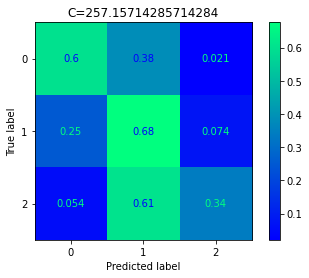

              precision    recall  f1-score   support

           0       0.52      0.68      0.59       552
           1       0.65      0.34      0.45       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12801519955839114

SVM - Poly, Train Accuracy = 0.6780835097171445, C=263.27755102040817
Test Accuracy = 0.5761538461538461


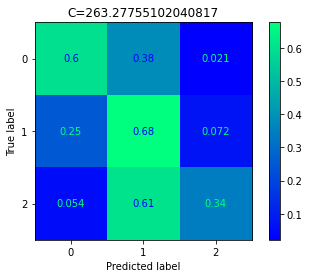

              precision    recall  f1-score   support

           0       0.52      0.68      0.59       552
           1       0.65      0.34      0.45       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1294059249179471

SVM - Poly, Train Accuracy = 0.6786607658264383, C=269.3979591836735
Test Accuracy = 0.5753846153846154


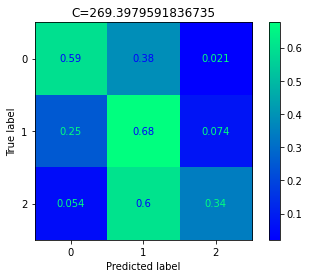

              precision    recall  f1-score   support

           0       0.52      0.68      0.59       552
           1       0.65      0.34      0.45       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12801519955839114

SVM - Poly, Train Accuracy = 0.6792380219357321, C=275.51836734693876
Test Accuracy = 0.5769230769230769


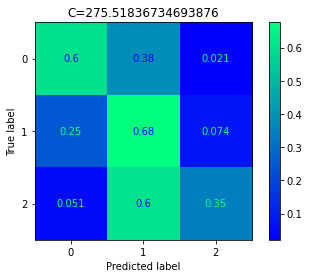

              precision    recall  f1-score   support

           0       0.52      0.68      0.59       552
           1       0.65      0.35      0.45       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13496882635617113

SVM - Poly, Train Accuracy = 0.679622859341928, C=281.6387755102041
Test Accuracy = 0.5769230769230769


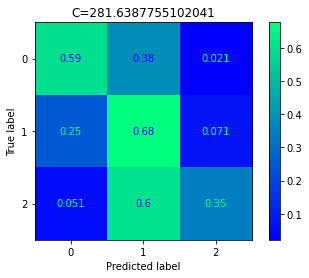

              precision    recall  f1-score   support

           0       0.52      0.68      0.59       552
           1       0.66      0.35      0.45       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13496882635617113

SVM - Poly, Train Accuracy = 0.6794304406388301, C=287.7591836734694
Test Accuracy = 0.5769230769230769


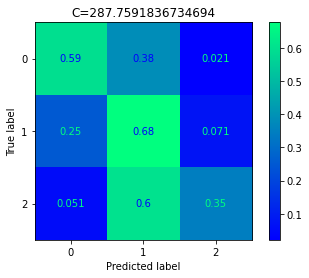

              precision    recall  f1-score   support

           0       0.52      0.68      0.59       552
           1       0.66      0.35      0.45       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13496882635617113

SVM - Poly, Train Accuracy = 0.6794304406388301, C=293.8795918367347
Test Accuracy = 0.5761538461538461


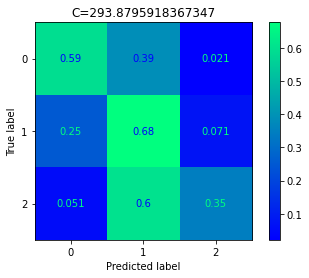

              precision    recall  f1-score   support

           0       0.52      0.68      0.59       552
           1       0.66      0.35      0.45       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13357810099661505

SVM - Poly, Train Accuracy = 0.6792380219357321, C=300.0
Test Accuracy = 0.5761538461538461


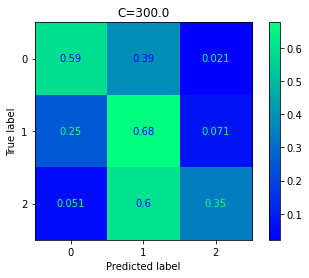

              precision    recall  f1-score   support

           0       0.52      0.68      0.59       552
           1       0.66      0.35      0.45       277
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13357810099661505



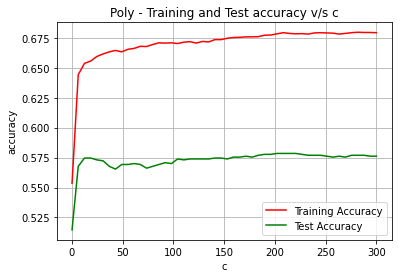

In [36]:
train_and_plot(X_train, y_train, X_test, y_test, c_svm_linear, c_svm_rbf, c_svm_poly)